# SIT742: Modern Data Science - Task 2

- Students
  - Prince Park Yohannan Prince (S223623579)
  - Suraj Mathew Thomas (S223509398)
  - Shailesh Pande (S223630975)

- Group Number - 23

- Attempted High Distinction Question - Yes

## PART I

In [1]:
# import the basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile

# This is to supress any warnings that are generated while importing the libraries and modules
import warnings
warnings.filterwarnings('ignore')

# Setting the Master Format
sns.set_style("whitegrid")
sns.set_theme('poster',font_scale=0.7,palette='Set2')
seed = 999  # set a number for random state

In [2]:
# Download the zip file from the google shared drive to collab
# gdown helps in download a large file from Google Drive.
!gdown --fuzzy "https://drive.google.com/file/d/1rGE1Su9DyjqL6CmFfYOb6A-NwLhveanh/view?usp=sharing" -O 'item_listing_category.zip'

Downloading...
From: https://drive.google.com/uc?id=1rGE1Su9DyjqL6CmFfYOb6A-NwLhveanh
To: /content/item_listing_category.zip
100% 26.1M/26.1M [00:00<00:00, 157MB/s]


In [3]:
## Reading the extracted source file
zf = zipfile.ZipFile("item_listing_category.zip") #Reading the Zip File
df = pd.read_csv(zf.open('item_listing_category.csv')) # Extracting the csv file from the zip file

In [4]:
#To check if the dataframe has been loaded correctly
df.head()

train_id                            name  item_condition_id  \
0    128037        Bundle for Sassy Sisters                  3   
1    491755                    PINK VS TANK                  2   
2    470924      Funko Pop Unmasked Cyclops                  1   
3    491263                 Baby Roshe Runs                  3   
4    836489  Baby Girl Ralph Lauren dresses                  3   

                        category_name    brand_name  price  shipping  \
0         Women/Tops & Blouses/Blouse           NaN   16.0         0   
1     Women/Tops & Blouses/Tank, Cami           NaN   17.0         0   
2  Kids/Toys/Action Figures & Statues         Funko   30.0         1   
3               Kids/Boys 2T-5T/Shoes          Nike   19.0         0   
4         Kids/Girls 0-24 Mos/Dresses  Ralph Lauren   24.0         0   

                                   clean_description  
0  max cleo black dress paper crane black tank to...  
1       sequin pink sign sequins missing gently worn  
2  box great condition comes soft pop protector p...  
3                 baby black nike roshe runs size 5c  
4  2 polo dresses 3 months wore washed dreft pink...

### EDA - Basic analysis of the loaded dataframe to assess the structure , columns etc.

In [5]:
#Shape of the loaded DataFrame - The number of rows and columns
print('The number of rows (observations) is :',df.shape[0],'\n''The number of columns (variables) is',df.shape[1])

The number of rows (observations) is : 355808 
The number of columns (variables) is 8


In [6]:
# checking for duplicate rows
print('The number of rows duplicated are :',df.duplicated().sum())

The number of rows duplicated are : 48572


- There are duplicate rows in the original data set. Duplicate rows need to be dropped

In [7]:
df = df.drop_duplicates() # drop duplicates

In [8]:
# Check for number of observations after dropping of duplicates
print('The number of rows (observations) is',df.shape[0])

The number of rows (observations) is 307236


In [9]:
# check for info on features of the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307236 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           307236 non-null  int64  
 1   name               307236 non-null  object 
 2   item_condition_id  307236 non-null  int64  
 3   category_name      305911 non-null  object 
 4   brand_name         175941 non-null  object 
 5   price              307236 non-null  float64
 6   shipping           307236 non-null  int64  
 7   clean_description  307070 non-null  object 
dtypes: float64(1), int64(3), object(4)
memory usage: 21.1+ MB


- There are missing values in columns 'category_name' , 'brand_name' , 'clean_description '
- 'train_id' , item_condition_id' and 'shipping' features are 'numeric' data type. These are id's only and should be read as 'object type'

In [10]:
'''
Convert train_id,item_condition_id,shipping to object type
'''
# make a list of columns names where the datatype of the columns need to be changed
object = ['train_id','item_condition_id','shipping']

# Using for loop to iterate over the list and change the datatype
for i in object:
    df[i] = df[i].astype('object')

In [11]:
# checking if the data type change for the columns have refelcted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307236 entries, 0 to 355807
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   train_id           307236 non-null  object 
 1   name               307236 non-null  object 
 2   item_condition_id  307236 non-null  object 
 3   category_name      305911 non-null  object 
 4   brand_name         175941 non-null  object 
 5   price              307236 non-null  float64
 6   shipping           307236 non-null  object 
 7   clean_description  307070 non-null  object 
dtypes: float64(1), object(7)
memory usage: 21.1+ MB


In [12]:
# Getting the 5 Point Statistical Summary of the only numeric datatype in the dataframe (Price)

# get the details in a data frame ,numbers are rounded to two places of decimals
df['price'].describe().to_frame().round(2)

price
count  307236.00
mean       26.64
std        37.93
min         0.00
25%        10.00
50%        17.00
75%        29.00
max      2000.00

**Observations**

- We note from above statistical description that minimum price is zero for some transactions.

- We study the transactions where price =0

- Some of the transactions we can see that minimum price is zero for some transactions. If this is a catalog or transaction table in both the cases there cannot be any item with zero price as it does not make sense. Either we can group the price by categories and ingest a measure of central tendency. For this project we have decided to remove the items that have price zero. There are 169 items in total that need to be removed.

In [13]:
# Number of observations where price is zero
print('The number of transactions where price is zero:', len(df[df['price']==0]))

The number of transactions where price is zero: 169


- We analyse these transactions with zero price

In [14]:
# slice the data for price == 0 ,and construct a pivot to count the number of transactions
# for each 'item_condition_id' which has price = 0.

a = pd.pivot_table(data    =  df[df['price']==0],
                   index   = ['item_condition_id','price'],
                   values  = 'train_id',
                   aggfunc = 'count',
                   margins = 'Total',
                   margins_name= 'Total')
display(a)

train_id
item_condition_id price          
1                 0.0          57
2                 0.0          62
3                 0.0          48
4                 0.0           2
Total                         169

**Observations**

- There are 57 transactions with item_condition_id : 1 , ( best quality items ) where price is zero.

- These zero pricing data points seem to be erroneous.

- We drop these data points

In [15]:
# create data frame by considering only those data points where price in not equal to zero
df = df[df['price'] != 0]

In [16]:
# check for total number of observations after dropping those where price was equal to 0
print('The number of rows (observations) is',df.shape[0])

The number of rows (observations) is 307067


In [17]:
# statistical description of object type data
df.describe(include='object').T

count  unique  \
train_id           307067  307067   
name               307067  276922   
item_condition_id  307067       5   
category_name      305744    1135   
brand_name         175840    3045   
shipping           307067       2   
clean_description  306901  267672   

                                                              top    freq  
train_id                                                   128037       1  
name                                                       Bundle     446  
item_condition_id                                               1  132435  
category_name      Women/Athletic Apparel/Pants, Tights, Leggings   12360  
brand_name                                                   PINK   11433  
shipping                                                        0  169954  
clean_description                                 description yet   17095

**Observations**

- There are 276k unique values in 'name'
- There are 5 unique values in 'item_condition_id'
- There are 1135 unique values in 'category_name'
- There are 3045 unique values in 'brand_name'
- There are 2 unique values in 'shipping' paying status
- There are 267k unique descriptions under 'clean_description'
- We will need to study further the various 'object' type features

In [18]:
'''
Define a function which will give the value counts of a categorical feature in numbers and percentage and a count plot
for visualization with a vertical / horizontal orientation , depending on the count of uniwue values of the feature
'''
def value_count_info(df, feature):
    a = df[feature].value_counts()  # find value counts in numbers
    b = round(df[feature].value_counts(normalize=True) * 100, 2)  # find value counts in %

    # create a datframe to display the value counts both in numbers and in percentage
    value_count_df = pd.DataFrame({'count': a,'Percentage': b})

    # rename the index column as the 'feature'
    value_count_df = value_count_df.rename_axis(feature)

    # Format the 'Percentage' column to show as '%'
    value_count_df['Percentage'] = value_count_df['Percentage'].apply(lambda x: f"{x:.2f}%")

    # Determine the pivot display options and the plot orientation based on the number of unique values

    if len(a) > 5:
        # if unique values in feature > 5

        print('\n')   # create a space line
        print('Value Count Analysis of :',feature)

        display(value_count_df.head()) # display only top 5 rows of the pivot

        plt.figure(figsize=(20, 5))  # Adjust the figure size for horizontal plot
        g = sns.barplot(data=value_count_df.head(),  # make a bar plot for only top 5 rows of the pivot
                        x=value_count_df.head()['count'],
                        y=value_count_df.head().index,
                        orient='h')  # Horizontal orientation of bar plot if unique values are more than 5
        for i in g.containers:
            g.bar_label(i, fmt='%d')  # annotate the plot and display counts as integers
        plt.xlabel('Count',fontweight='bold')           # display the x-label
        plt.ylabel(feature,fontweight='bold')  # Set the ylabel as the feature name
        plt.title('Bar plot showing Value Counts of top 5 : ' + feature,fontweight='bold')

    else:   # if unique values of the feature are less than 5

        print('\n')
        print('Value Count Analysis of :',feature)

        display(value_count_df) #  display the complete pivot
        plt.figure(figsize=(20, 5))  # Adjust the figure size for vertical plot
        g = sns.barplot(data=value_count_df,  # plot the vertical bar plot
                        x=value_count_df.index,
                        y=value_count_df['count'])
        for i in g.containers:
            g.bar_label(i, fmt='%d')  # Display counts as integers
        plt.xlabel(feature,fontweight='bold')
        plt.ylabel('Count',fontweight='bold')  # Set the ylabel as 'Count'
        plt.title('Bar plot showing Value Counts of : ' + feature,fontweight='bold')

    plt.show()

    return




Value Count Analysis of : item_condition_id


count Percentage
item_condition_id                   
1                  132435     43.13%
3                   89856     29.26%
2                   77604     25.27%
4                    6703      2.18%
5                     469      0.15%

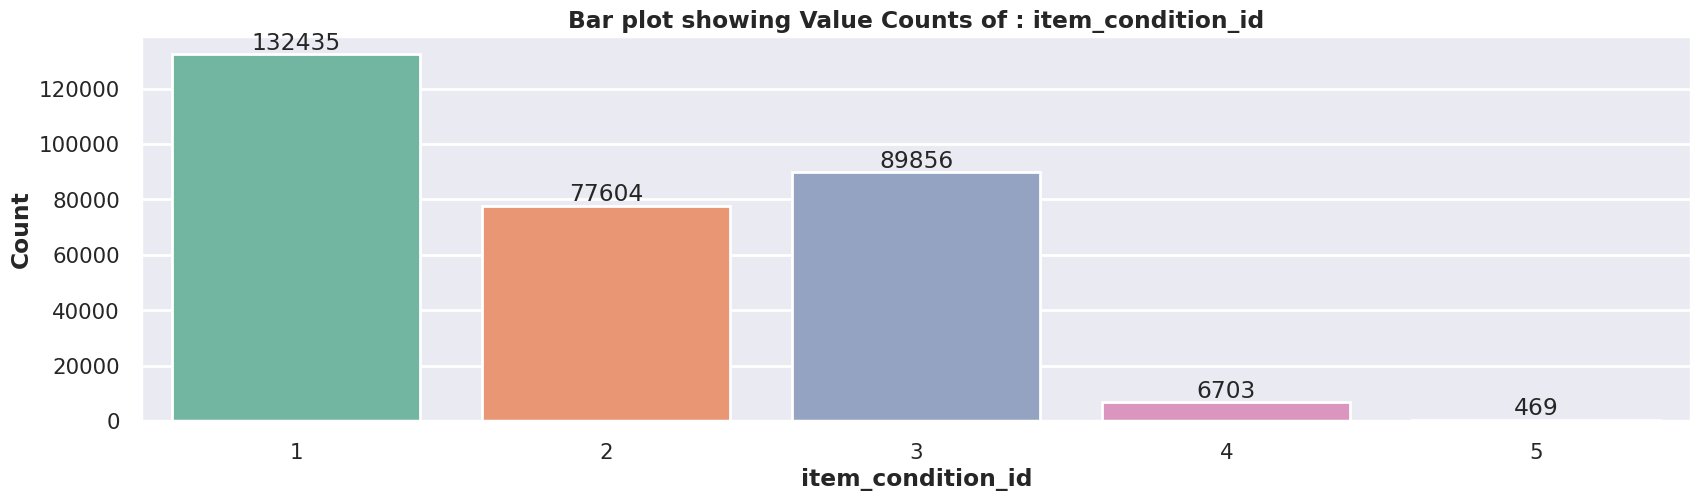



Value Count Analysis of : shipping


count Percentage
shipping                   
0         169954     55.35%
1         137113     44.65%

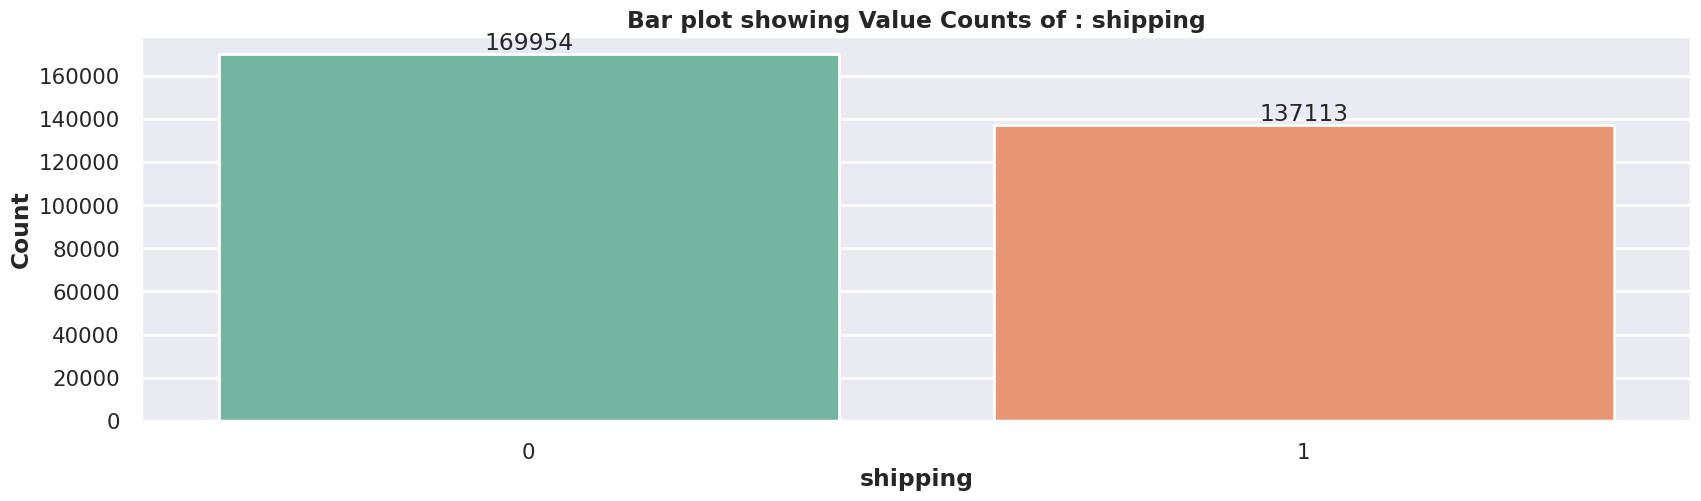



Value Count Analysis of : category_name


count Percentage
category_name                                                   
Women/Athletic Apparel/Pants, Tights, Leggings  12360      4.04%
Women/Tops & Blouses/T-Shirts                    9651      3.16%
Beauty/Makeup/Face                               7137      2.33%
Beauty/Makeup/Lips                               6200      2.03%
Electronics/Video Games & Consoles/Games         5531      1.81%

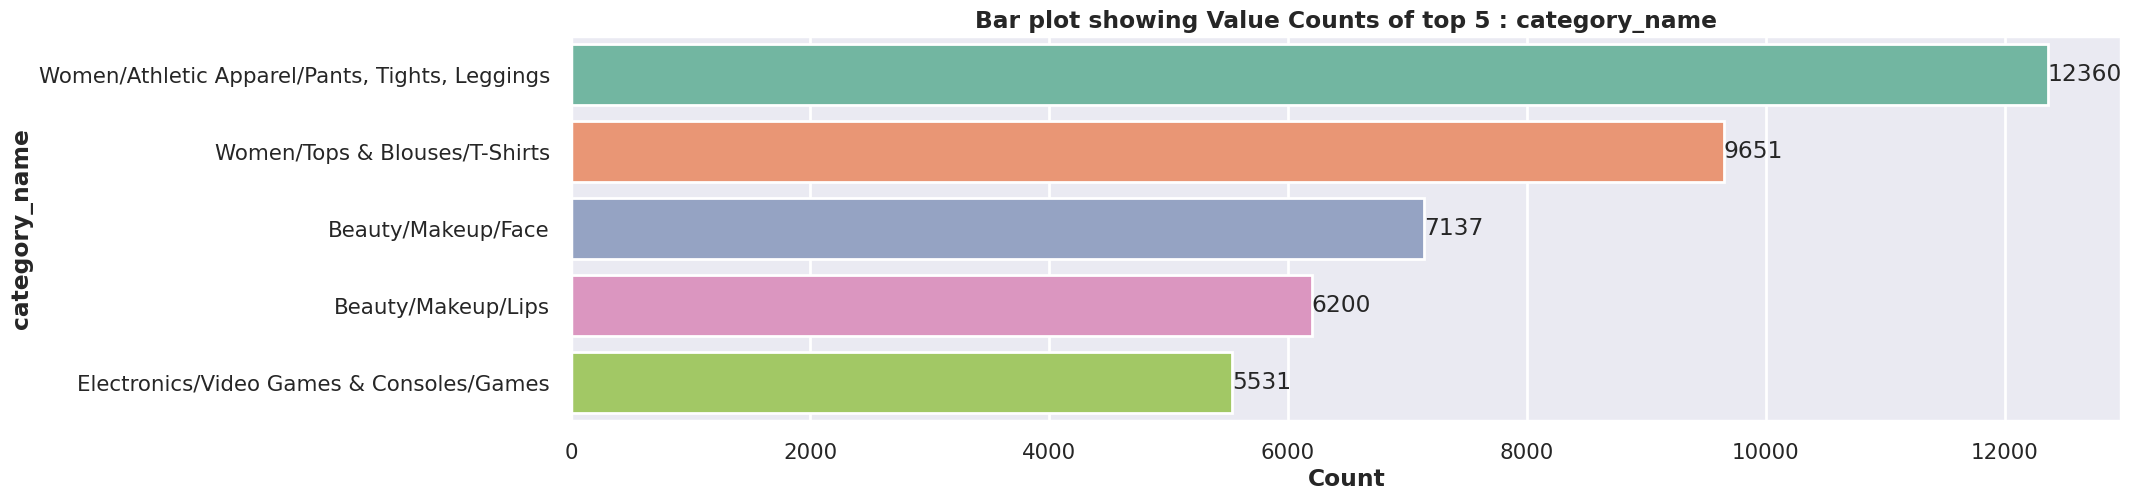



Value Count Analysis of : brand_name


count Percentage
brand_name                         
PINK               11433      6.50%
Nike               11322      6.44%
Victoria's Secret   9955      5.66%
LuLaRoe             6322      3.60%
Apple               3430      1.95%

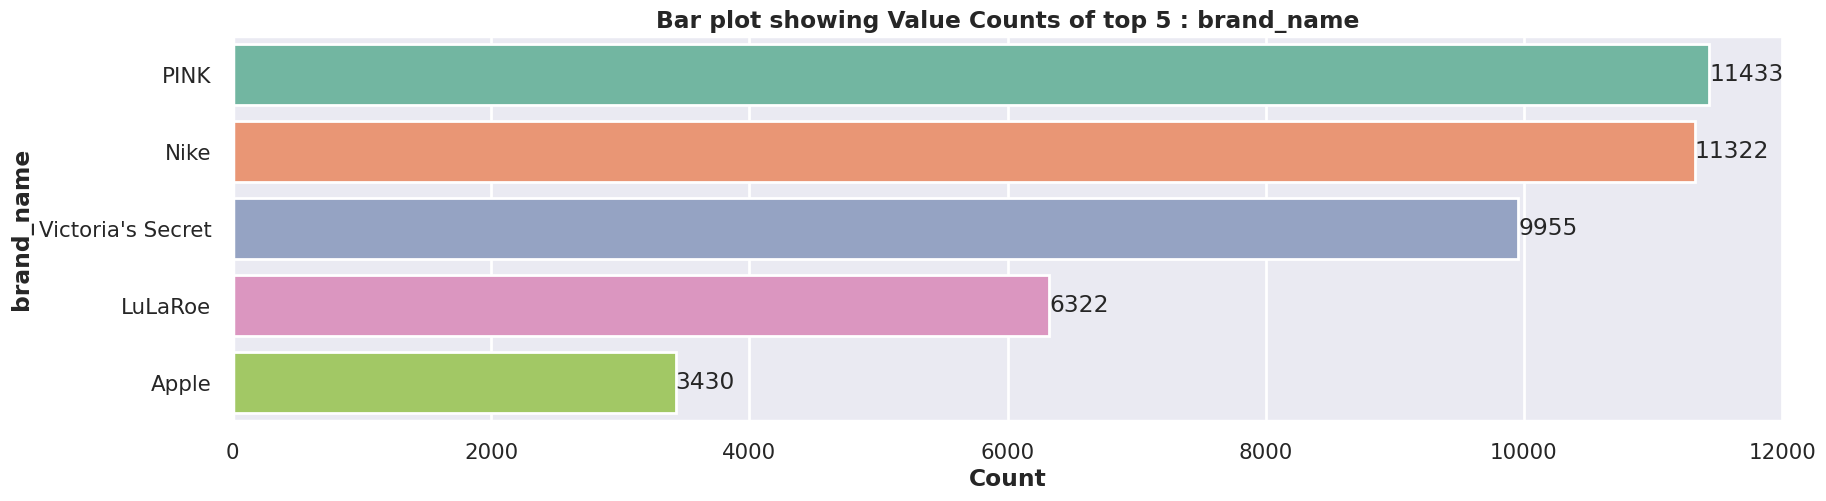



Value Count Analysis of : name


count Percentage
name                      
Bundle      446      0.15%
BUNDLE       94      0.03%
Reserved     94      0.03%
Converse     93      0.03%
Romper       91      0.03%

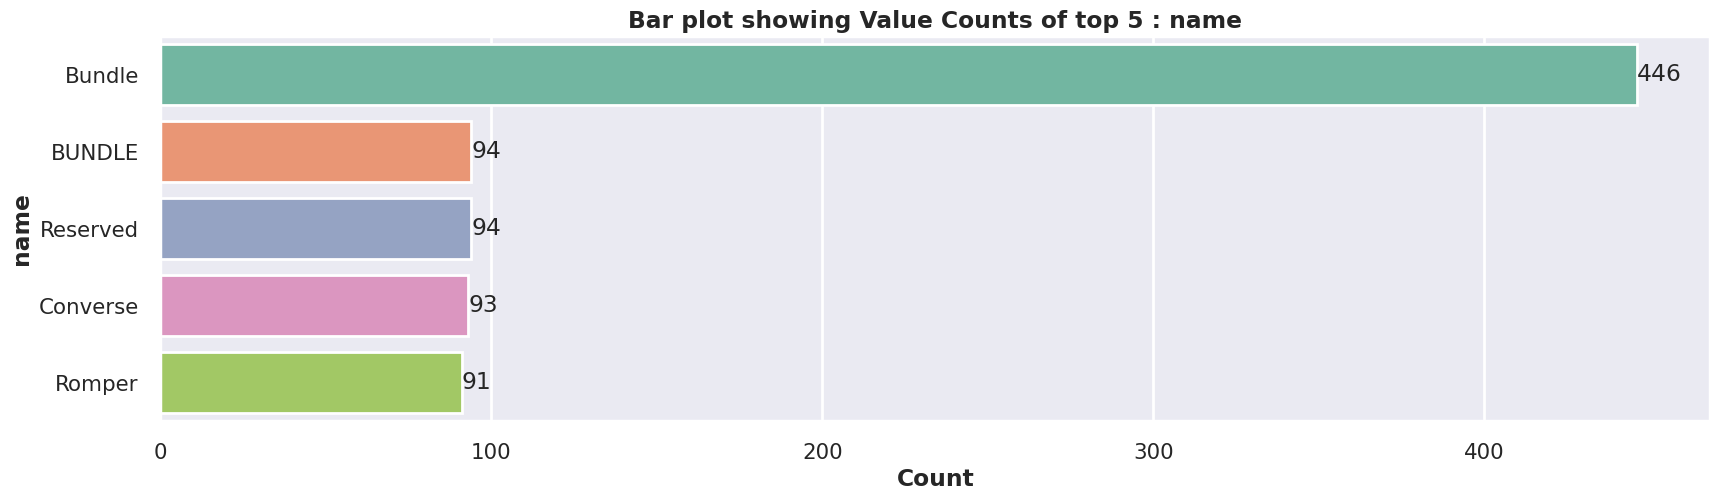



Value Count Analysis of : clean_description


count Percentage
clean_description                  
description yet    17095      5.57%
brand new           1107      0.36%
new                 1095      0.36%
good condition       606      0.20%
great condition      478      0.16%

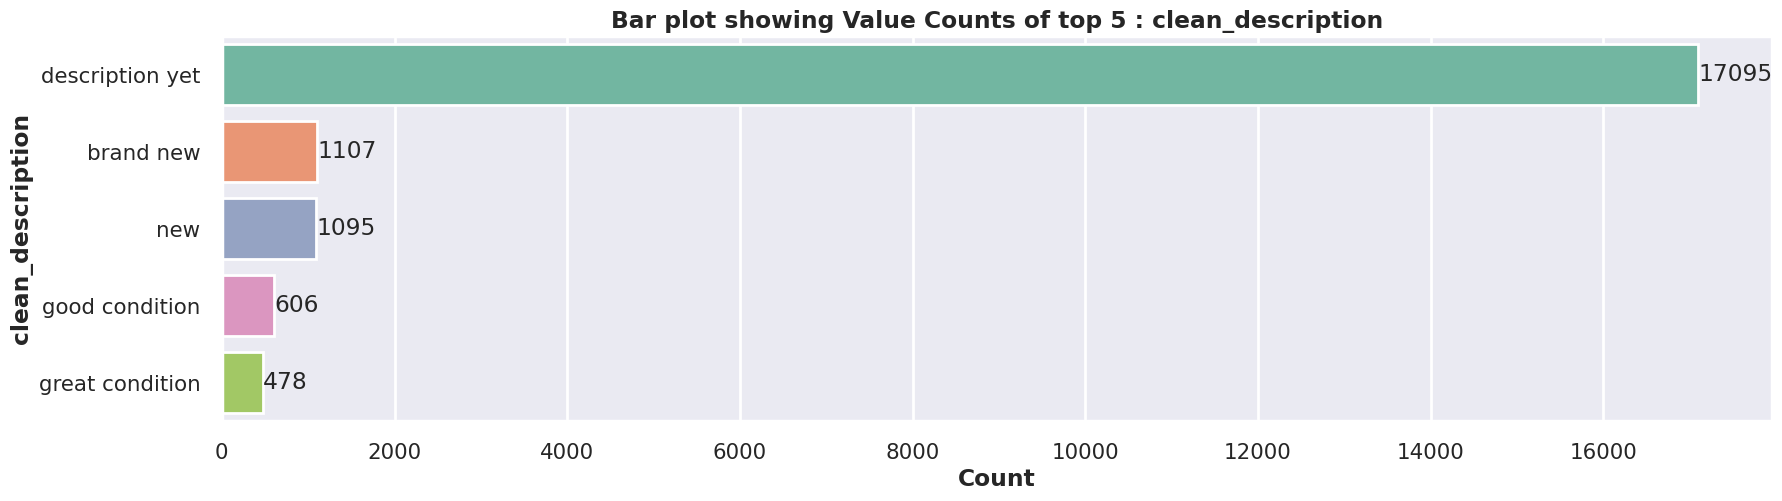

In [19]:
obj_col = ['item_condition_id','shipping','category_name','brand_name','name','clean_description']

for i in obj_col:
    value_count_info(df,i)


**Observations**

- Bundle and BUNDLE in the feature 'name' is a repetition
- Description under 'clean_description' have string values 'brand new' and  'new', 'good condition' , 'great condition', which are ambigous
- Since the count of such descripencies is insignificant , we do not make any changes
- Information on other features as displayed above is self explanatory

## Question 1.1

---

**Find the missing values:**

- Write the function missing_values_table and use the dataframe as the input. The function should return the information of missing values by column (only for columns which have missing values and the returned value should be the count of rows has missing values);

- For columns which have missing values, could you impute the missing values with the mean value of the particular columns? (if you think it could not be done with mean value, write down the reason in comments and report rather than code)

---

### Answer 1.1

In [20]:
'''
• Write the function missing_values_table and use the dataframe as the input. The function
should return the information of missing values by column (only for columns which have
missing values and the returned value should be the count of rows has missing values);
'''
def missing_values_table(df):
    a = df.isnull().sum()  # find missing values if any in all features

    # filter the information to see only those features where missing values is more than 0
    a = a[a>0]
    a = a.to_frame()       # construct a data frame
    a = a.rename(columns={0:'Missing_Value_Count'})  # rename the column
    a = a.rename_axis('Features with Missing Values') # rename the index column
    a = a.sort_values(by='Missing_Value_Count',ascending=False) # sort from high to low

    # add a col which shows % of missing data
    a['% Missing Values'] = round(a['Missing_Value_Count'] / df.shape[0]*100,2)
    a
    return(a)

In [21]:
# use the function defined above to ascertain the missing values in the given data set
missing_values_table(df)

Missing_Value_Count  % Missing Values
Features with Missing Values                                       
brand_name                                 131227             42.74
category_name                                1323              0.43
clean_description                             166              0.05

In [22]:
'''
• For columns which have missing values, could you impute the missing values with the
mean value of the particular columns? (if you think it could not be done with mean value,
write down the reason in comments and report rather than code)
'''
# get the names of the features which have missing values in a list
index_list = missing_values_table(df).index.tolist()
index_list

['brand_name', 'category_name', 'clean_description']

In [23]:
# ascertain the data type of the features which have missing values

df[index_list].dtypes

brand_name           object
category_name        object
clean_description    object
dtype: object

- There are 3 columns that have missing values [brand_name, category_name, clean_description]. All the 3 columns are of object/string data type. The mean value cannot be imputed as the categories here are vast and not limited. Therefore these columns cannot be converted into its numerical eqivalent through label encoding. Therefore the measure of central tendancy (mean) cannot be used over here. Using the mode is a possibility, but then it could change the meaning of the dataset if 42% of the brand name column needs to be imputed. For the items that have an item category, we can impute the brand name as "Others"

1). Why you decide to choose your solution;

- Criteria for narrowing down on the method to arrive at the solition were 1) Reusability, 2)Efficiency, and 3)Simplification & Maintenability

2). Are there any other solutions that could solve the question;

- You can directly execute the python scripts for a line by line result without packing it under a function. This can be done without a function call.

- We can also assess all of the questions from 1 to 10 and then define related classes and methods that will help answer all the questions by calling the class/function/method. Therefore instead of explaining question by question we can combine the related EDAs and package it under classes and then execute the call.

3). Whether your solution is the optimal or not? why?

- We proceeded with the function definition and call as a means of executing this solution. In this way, this function can be resued for any data frame. We need not rewrite the code every time. This makes it more optimal, efficient and reusable and avoid redundancy.

## Question 1.2

---

Find the price information from the data:

- Write code to print the median price of the items in the data;

- What is the 90th percentile value on the price;

- Draw the histogram chart for the price of the items in the data with 50 bins.

---


### Answer 1.2



The median value of the Price Column is: 17.0




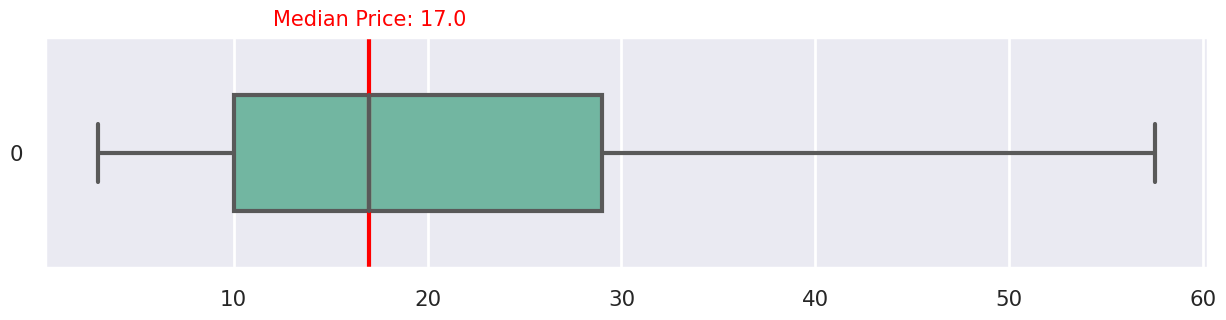

In [24]:
'''
• Write code to print the median price of the items in the data;
'''

print('\n')
median_price = df['price'].median() # find the median price of the column 'price'

# Printing the median value of the the price column for the entire dataset
print ("The median value of the Price Column is:", median_price)
print('\n');


# visualize the median price
plt.figure(figsize = (15,3));
g2= sns.boxplot(df.price,
            showfliers=False, # will not display the outliers
            width=0.5,
            orient ='h');
plt.axvline(x=median_price, c='red'); #draw a red colured vertical line at the median

plt.text(median_price, -0.55, f'Median Price: {median_price}', color='red',
         fontsize=15, ha='center') # add text to a plot

plt.show(g2)





The 90th percentile of the Price Column is: 51.0




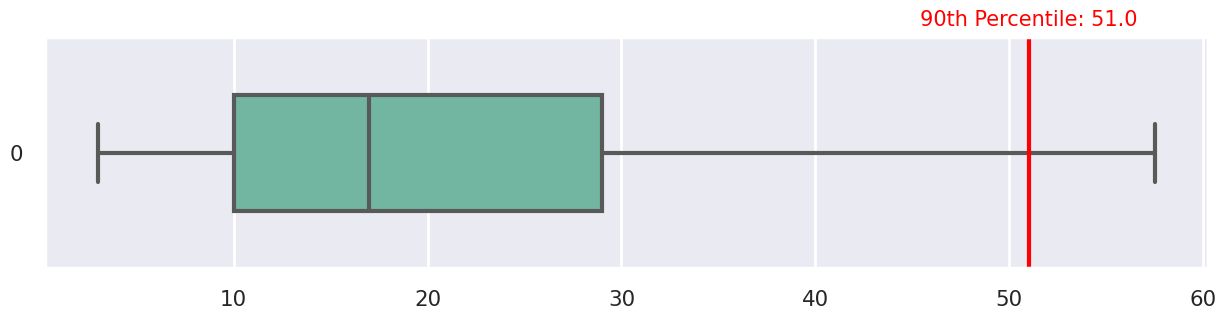

In [25]:
'''
• What is the 90th percentile value on the price;
'''

# find the 90th percentile
price_90percentile = df['price'].quantile(q=90/100)
print('\n');
print("The 90th percentile of the Price Column is:", price_90percentile)
print('\n');


# visualize the 90th percentile price
plt.figure(figsize = (15,3));
g3 = sns.boxplot(df.price,
            showfliers=False, # will not display the outliers
            width=0.5,
            orient ='h')

# draw a red colured vertical line at the 90th Percentile
plt.axvline(x=price_90percentile, c='red')
plt.text(price_90percentile, -0.55, f'90th Percentile: {price_90percentile}',
         color='red', fontsize=15, ha='center')

plt.show(g3)

In [26]:
'''
• Draw the histogram chart for the price of the items in the data with 50 bins.
'''
# create the  50 bins on price feature
bins = pd.cut(df['price'], bins=50)

# create a dataframe to see number of transactions in each bin. Create a new index column running from 0 to 49
bins_df = bins.value_counts().sort_index().to_frame().reset_index()

bins_df.index += 1  # add 1 to the index column so that the bins are numbered 1 to 50

bins_df = bins_df.rename_axis('Bin No.')  # rename the index column
bins_df = bins_df.rename(columns={'index':'Bin Range',   # rename the columns correctly
                                 'price':'Count of Transactions'})
display(bins_df)

Bin Range  Count of Transactions
Bin No.                                           
1            (1.003, 42.94]                 264854
2            (42.94, 82.88]                  29518
3           (82.88, 122.82]                   6516
4          (122.82, 162.76]                   2799
5           (162.76, 202.7]                   1310
6           (202.7, 242.64]                    733
7          (242.64, 282.58]                    419
8          (282.58, 322.52]                    269
9          (322.52, 362.46]                    195
10          (362.46, 402.4]                     80
11          (402.4, 442.34]                     67
12         (442.34, 482.28]                     61
13         (482.28, 522.22]                     48
14         (522.22, 562.16]                     37
15          (562.16, 602.1]                     19
16          (602.1, 642.04]                     23
17         (642.04, 681.98]                     21
18         (681.98, 721.92]                     21
19         (721.92, 761.86]                     12
20          (761.86, 801.8]                     12
21          (801.8, 841.74]                      6
22         (841.74, 881.68]                      4
23         (881.68, 921.62]                      7
24         (921.62, 961.56]                      3
25         (961.56, 1001.5]                      2
26        (1001.5, 1041.44]                      2
27       (1041.44, 1081.38]                      5
28       (1081.38, 1121.32]                      3
29       (1121.32, 1161.26]                      0
30        (1161.26, 1201.2]                      2
31        (1201.2, 1241.14]                      3
32       (1241.14, 1281.08]                      2
33       (1281.08, 1321.02]                      0
34       (1321.02, 1360.96]                      1
35        (1360.96, 1400.9]                      2
36        (1400.9, 1440.84]                      0
37       (1440.84, 1480.78]                      0
38       (1480.78, 1520.72]                      3
39       (1520.72, 1560.66]                      0
40        (1560.66, 1600.6]                      0
41        (1600.6, 1640.54]                      2
42       (1640.54, 1680.48]                      0
43       (1680.48, 1720.42]                      0
44       (1720.42, 1760.36]                      0
45        (1760.36, 1800.3]                      1
46        (1800.3, 1840.24]                      2
47       (1840.24, 1880.18]                      1
48       (1880.18, 1920.12]                      1
49       (1920.12, 1960.06]                      0
50        (1960.06, 2000.0]                      1

- We note that the number of transactions drop sharply beyond bin no 5 to less than 1000

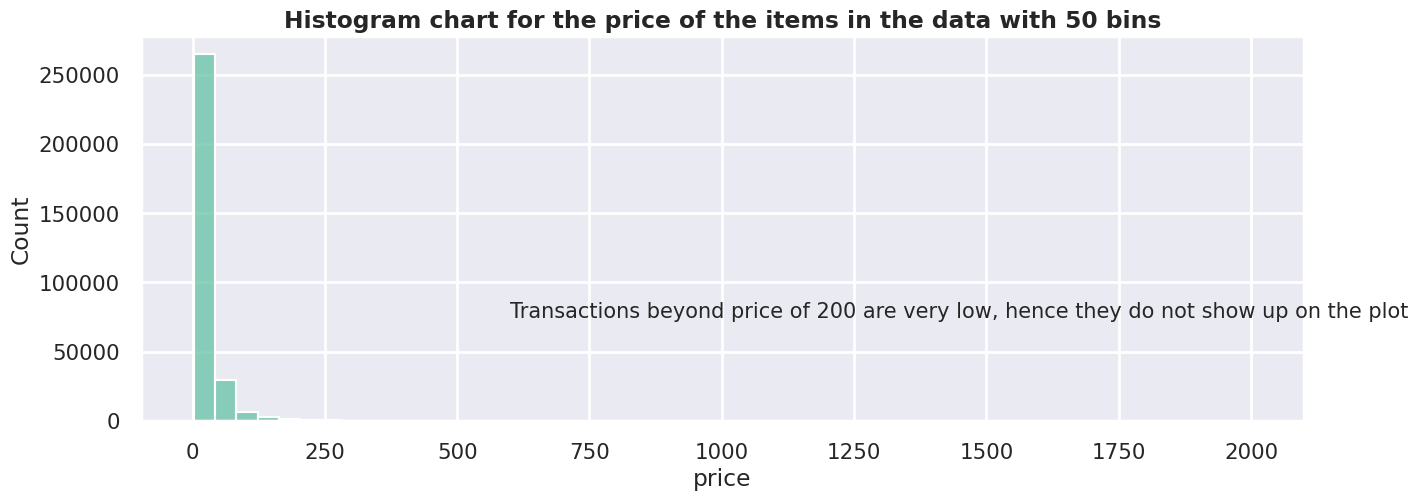

In [27]:
'''
• Draw the histogram chart for the price of the items in the data with 50 bins.
'''
plt.figure(figsize = (15,5));

# plot histogram
g4 = sns.histplot(data = df,
                  x='price',
                  bins = 50)  # define the number of bins
#for i in g4.containers: g4.bar_label(i,)
plt.title('Histogram chart for the price of the items in the data with 50 bins',
          fontweight = 'bold')

# insert commnets in the plot
plt.text(600,75000,
         'Transactions beyond price of 200 are very low, hence they do not show up on the plot',
        fontsize=15)
plt.show(g4)

- Zoomed in view of the 50 price bins

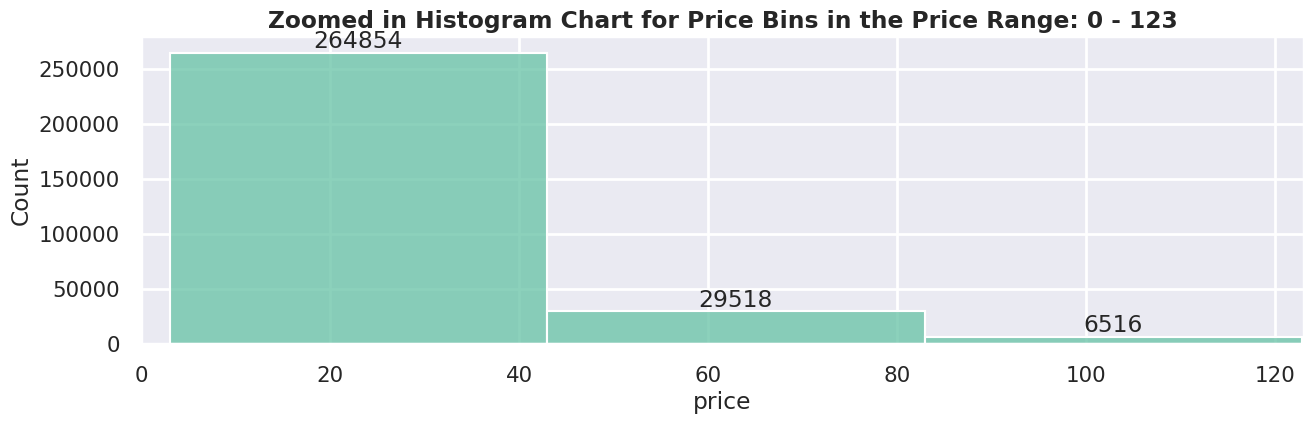

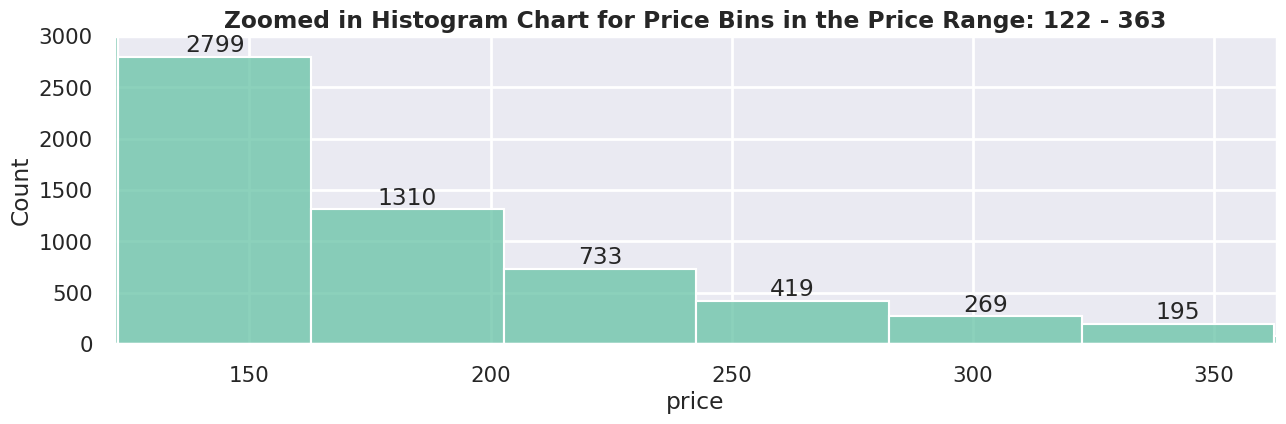

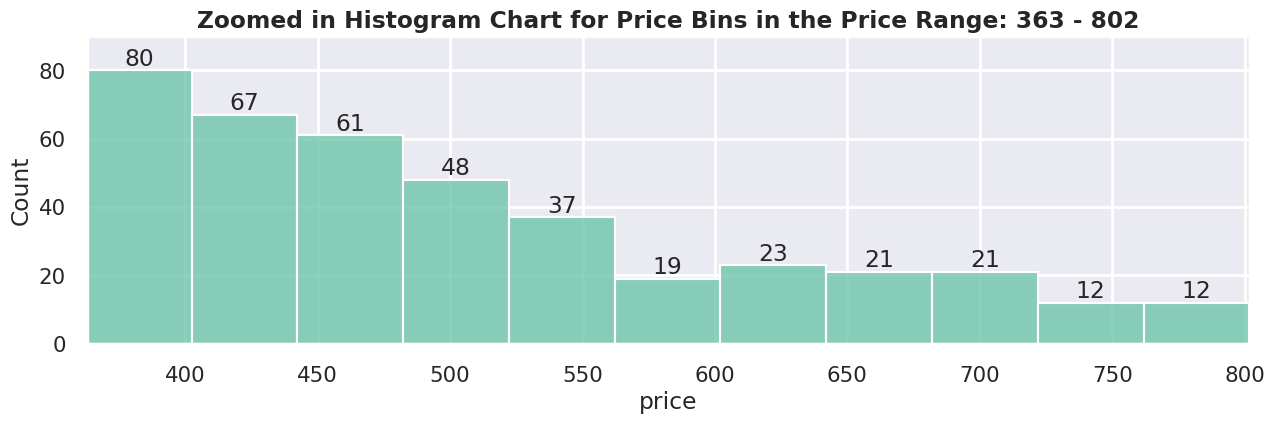

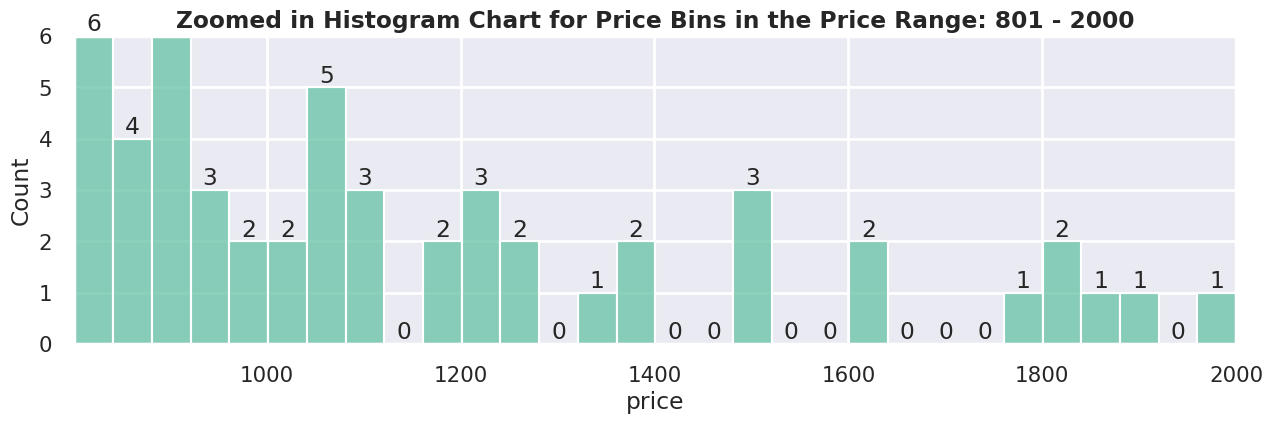

In [28]:
xlim_list = [(0, 123), (122, 363), (363, 802), (801, 2000)]  # create a list of range for the x_axis
ylim_list = [(0, 280000), (0,3000) , (0,90) , (0,6) ]          # create a list of range for the y_axis

for xlim, ylim in zip(xlim_list, ylim_list):  # iterate through both the lists for x_axis and y_axis
        plt.figure(figsize=(15, 4))
        g = sns.histplot(data=df,
                         x='price',
                         bins=50)
        for i in g.containers:g.bar_label(i)  # annotate the graph
        plt.xlim(xlim) # set the limits on the range for the x_axis
        plt.ylim(ylim) # set the limits on the range for the y_axis

        # title will select the price range from 0 and 1 index of the elemnets in xlim_list
        plt.title(f'Zoomed in Histogram Chart for Price Bins in the Price Range: {xlim[0]} - {xlim[1]}', fontweight='bold')

plt.show()


1). Why you decide to choose your solution;

- It gives both a tabular and visual representation of the solution to the question. We humans perceive visuals/graphs better than sifting through tabular format to make sense of what the data is trying to tell us.

2). Are there any other solutions that could solve the question;

- You can execute this with only a simple df['price].median()command. For the visual aspect you could also define price bands
-- less than 100
-- 100 to 400
-- 400 to 1000
-- greater than or equal to 1000

- But we decided to go with the bins defition to have a better understand of the price distribution when sliced by bins and zoomed in.

3). Whether your solution is the optimal or not? why?

- We felt the best way to describe this solution is to give both the tabular representation and the visual graphic to compliment it. Moreover, it is optimal to visualize based on the bin ranges rather than arbitarily splitting up the price ranges as mentioned above.

## Question 1.3

---

Exploring the shipping information from the data:

- Write code to find out the percentage of the items that are paid by the buyers.

- Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer pays shipping (50 bins).

- When buying the items online, do you need to pay higher price if seller pays for the shipping? Write the code to find out (Compare the median price of items paid by buyers and items paid by sellers, and explain the result in the comment and report).

(Optional: You could use the subplot from EDA)

---

### Answer 1.3

Count Percentage
Shipping                      
Seller Paid  169954     55.35%
Buyer Paid   137113     44.65%

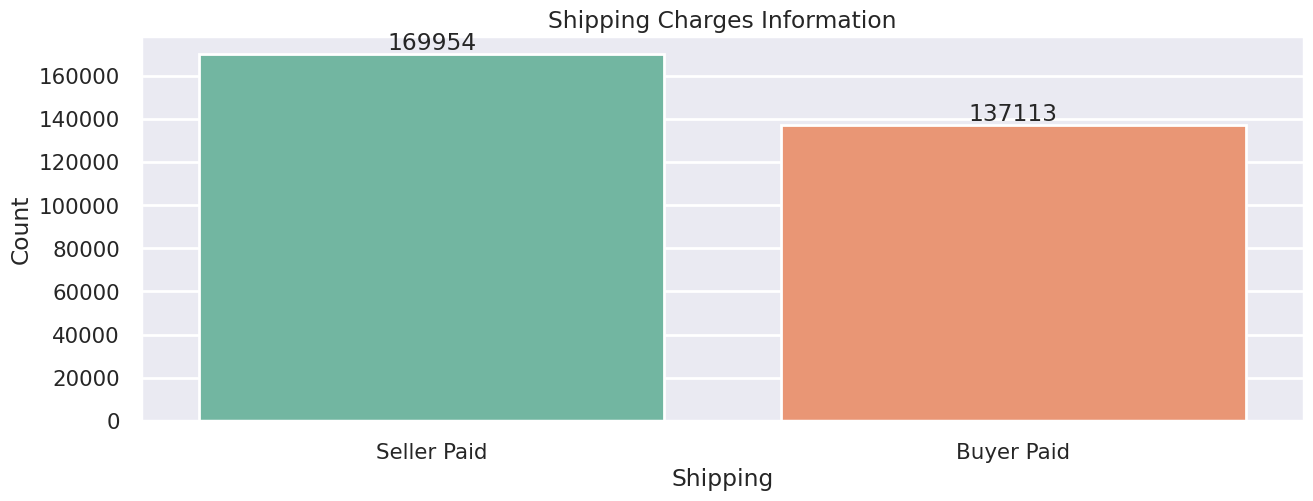

In [29]:
'''
• Write code to find out the percentage of the items that are paid by the buyers.
'''
# shipping : 0 implies that seller has paid
# shipping : 1 implies that buyer has paid

# we have defined a function to do this, however in this code we map the 0 and 1 under 'shipping' to their actual meaning

# find the value counts in mumbers
shipping_count=df.shipping.value_counts()

# find the value counts in percentage
shipping_percent=df.shipping.value_counts(normalize=True)*100

# make a dataframe on shipping info
shipping_info_df = pd.DataFrame({'Count':shipping_count,
                             'Percentage':shipping_percent})

shipping_info_df.rename_axis('Shipping',inplace = True)

shipping_mapping = {0: 'Seller Paid', 1: 'Buyer Paid'}  # map the shipping charges according to the numeric codes

shipping_info_df.index = shipping_info_df.index.map(shipping_mapping)  # replace 0 and 1

# display the "Percentage" with '%' sign
shipping_info_df['Percentage'] = shipping_info_df['Percentage'].apply(lambda x: f"{x:.2f}%")

display(shipping_info_df)

plt.figure(figsize = (15,5));
sns.set_theme('poster',font_scale=0.7,palette='Set2')
g9 = sns.barplot(data = shipping_info_df,
                    x = shipping_info_df.index,
                    y = shipping_info_df['Count'])
for i in g9.containers: g9.bar_label(i,)
plt.title('Shipping Charges Information')
plt.show(g9)



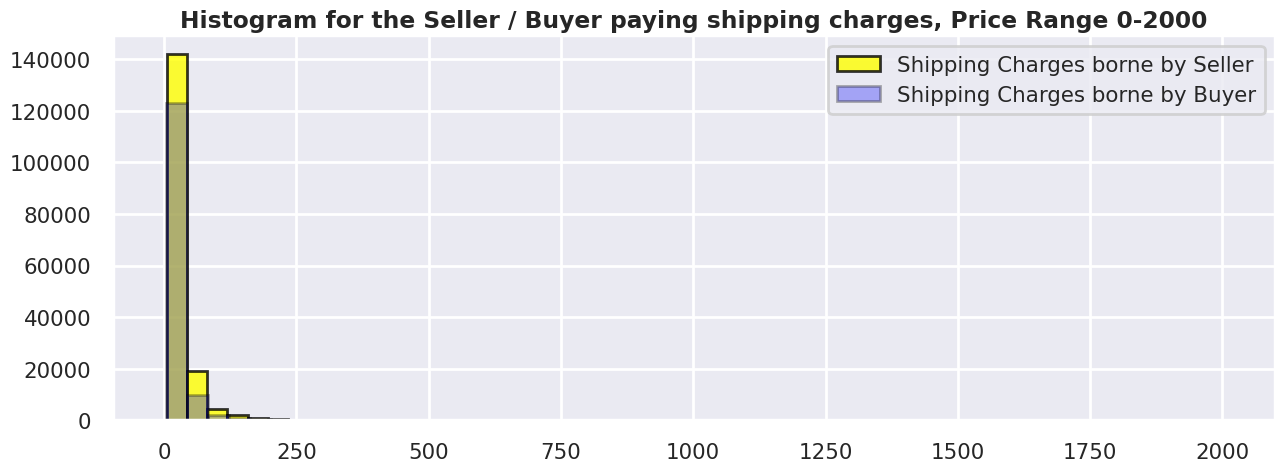

In [30]:
'''
• Draw (two) histogram graphs in one plot on the price for seller pays shipping and buyer pays shipping (50 bins).
'''


# Splitting the Groups of the Shipping Category into two groups
df_ship_0 = df[df['shipping'] == 0]
ship_0 = df_ship_0['price']

df_ship_1 = df[df['shipping'] == 1]
ship_1 = df_ship_1['price']

# create subplots to plot 2 histgrams on the same axis
fig,ax = plt.subplots(figsize=(15,5))


# plotting first histogram shipping == 0
g10 = plt.hist(ship_0, label='Shipping Charges borne by Seller', bins = 50, alpha=.8,  color='yellow', edgecolor='black');

# plotting second histogram where shipping == 1
g11 = plt.hist(ship_1, label="Shipping Charges borne by Buyer", bins = 50, alpha=.3, edgecolor='black', color='blue');
plt.title('Histogram for the Seller / Buyer paying shipping charges, Price Range 0-2000',fontweight = 'bold')
plt.legend();

# Showing the plot using plt.show()
plt.show(g10)
plt.show(g11)


- Zoomed in view of the 50 price bins

In [31]:
shipping_0 = df[df['shipping'] == 0]
shipping_1 = df[df['shipping'] == 1]

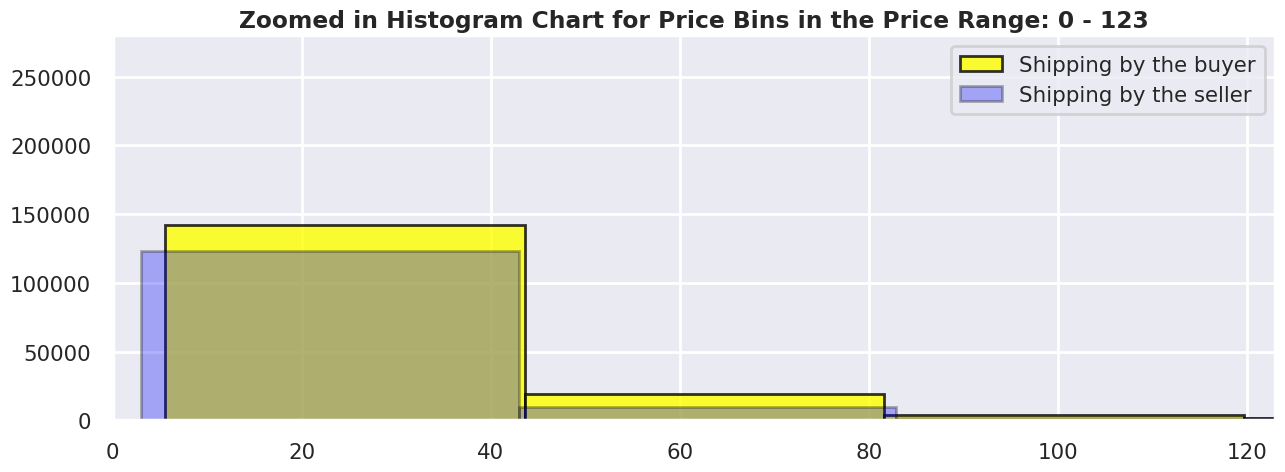

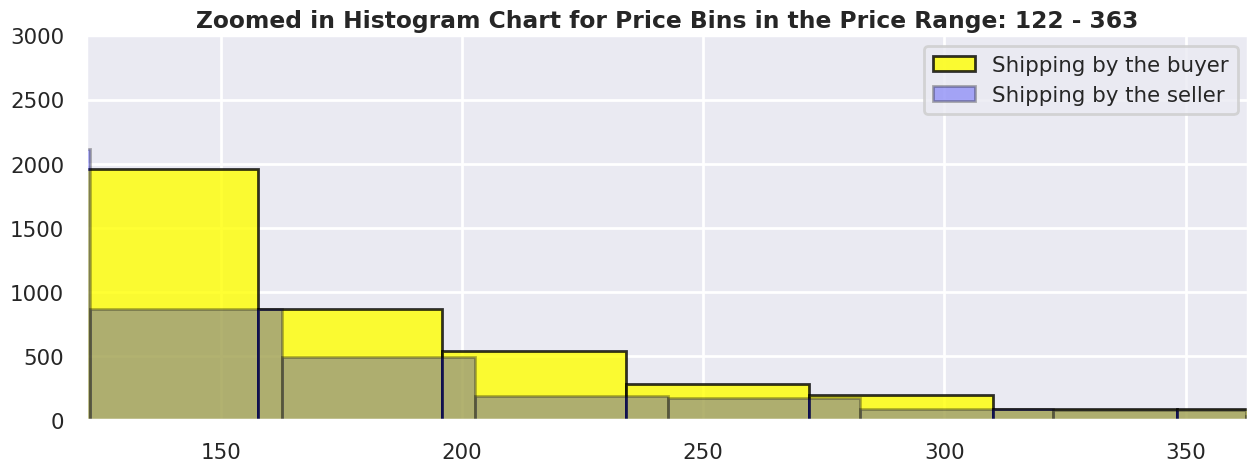

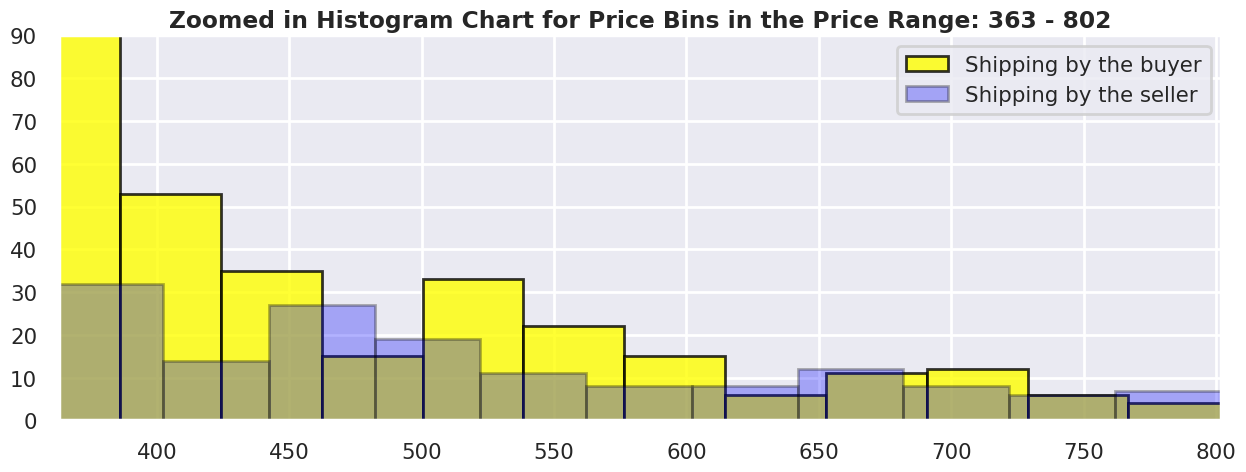

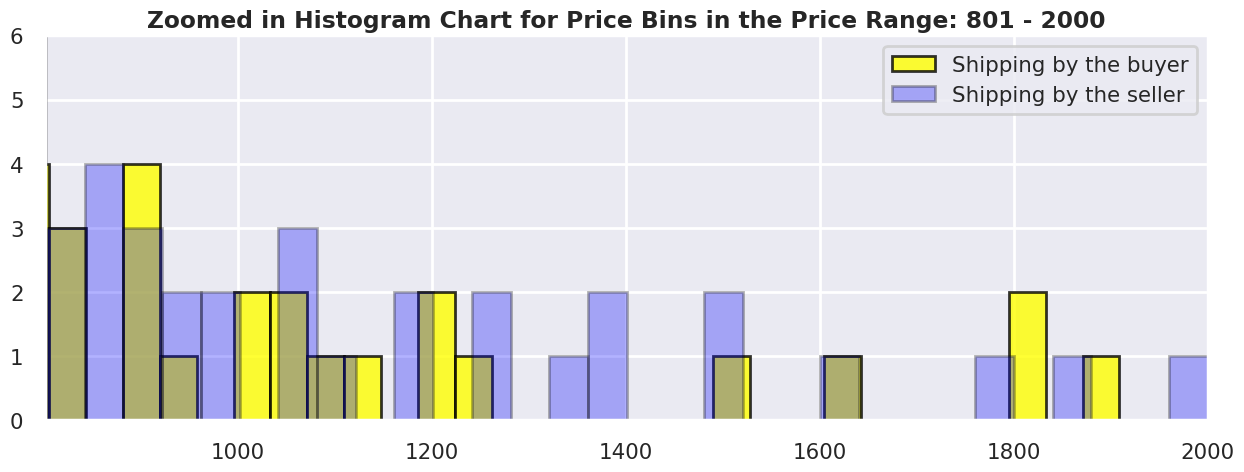

In [32]:
# iterate through lists xlim_list and ylim_list for x_axis and y_axis defined earlier in code # 27

for xlim, ylim in zip(xlim_list, ylim_list):
        fig,ax = plt.subplots(figsize=(15,5))  # define the plot
        g1=plt.hist(ship_0, label='Shipping by the buyer', bins = 50, alpha=.8,  color='yellow', edgecolor='black')
        g1=plt.hist(ship_1, label="Shipping by the seller", bins = 50, alpha=.3, color='blue', edgecolor='black')
        plt.legend()

        plt.xlim(xlim) # set the limits on the range for the x_axis, same as defined earlier for zooming in on Price Bins
        plt.ylim(ylim) # set the limits on the range for the y_axis, same as defined earlier for zooming in on Price Bins

        # title will select the price range from 0 and 1 index of the elemnets in xlim_list
        plt.title(f'Zoomed in Histogram Chart for Price Bins in the Price Range: {xlim[0]} - {xlim[1]}', fontweight='bold')

plt.show()


Shipping Charges  Seller Paid  Buyer Paid
Median Price             19.0        14.0

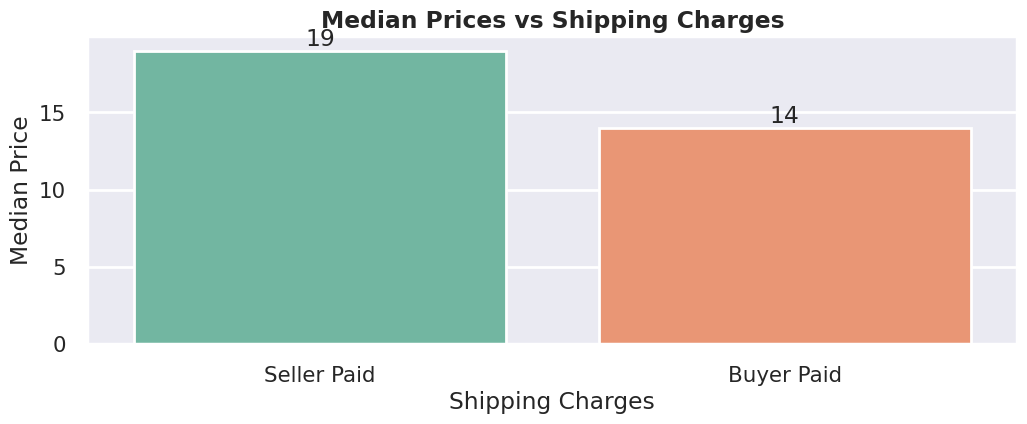

In [33]:
'''
• When buying the items online, do you need to pay higher price if seller pays for the shipping?
  Write the code to find out (Compare the median price of items paid by buyers and items paid by sellers,
  and explain the result in the comment and report).
'''
# create a pivot table with 'shipping' as the index . Aggregating Function is median for 'price'
a = pd.pivot_table(data = df,
                   index = 'shipping',
                   values= 'price',
                   aggfunc= 'median')

a = a.rename_axis('Shipping Charges') # rename the index column

a = a.rename(columns = {'price':'Median Price'}) # rename the column

shipping_mapping = {0: 'Seller Paid', 1: 'Buyer Paid'}  # map the shipping charges

a.index = a.index.map(shipping_mapping)  # replace 0 and 1

display(a.T)

plt.figure(figsize=(12,4))
g19 = sns.barplot(data = a,
                  x = a.index,
                  y = 'Median Price')
for i in g19.containers: g19.bar_label(i,)
plt.title('Median Prices vs Shipping Charges',fontweight = 'bold')

plt.show(g19)

1). Why you decide to choose your solution;

- The question asked was only to display the histogram of prices using a 50 bin split. But in this case we can see the prices are skewed towards the lower end of the price band when the split is 50 bins. In the 5 point summary for the price column we have seen that the max price in the dataframe is 2000. Therefore is makes sense to visualize the seller and buyer paid with different price bins as defined in the bin table in question 2.

2). Are there any other solutions that could solve the question;

- Instead of superimposed histogram with the shipping hue distinguising the two categories, we can use sepertate histograms to visualize the shipping borne by buyer and the shipping borne by seller.


3). Whether your solution is the optimal or not? why?

- Since the question is simple and straight forward this is the most optimal way of representing the solution to get clarity and understanding. These are bins or price range bins that can vary from dataset to dataset. Therefore defining a function may not be ideal except for cases where the bins can be given as a parameter and there needs to be a manual modification of the code based on the bin splits.

## Question 1.4

---

You are required to find out the item condition information from the data. Lower the number (value), the better condition of the item.

- Write the code to find out (print) the count of the rows on each number (value) in column item_condition_id.

- Draw the boxplot graphs (one plot) on the price for each item condition value, and find outout whether the better condition of the item could have higher median price (draw the plot and answer this question in the comment and report).

---

### Answer 1.4



Value Count Analysis of : item_condition_id


count Percentage
item_condition_id                   
1                  132435     43.13%
3                   89856     29.26%
2                   77604     25.27%
4                    6703      2.18%
5                     469      0.15%

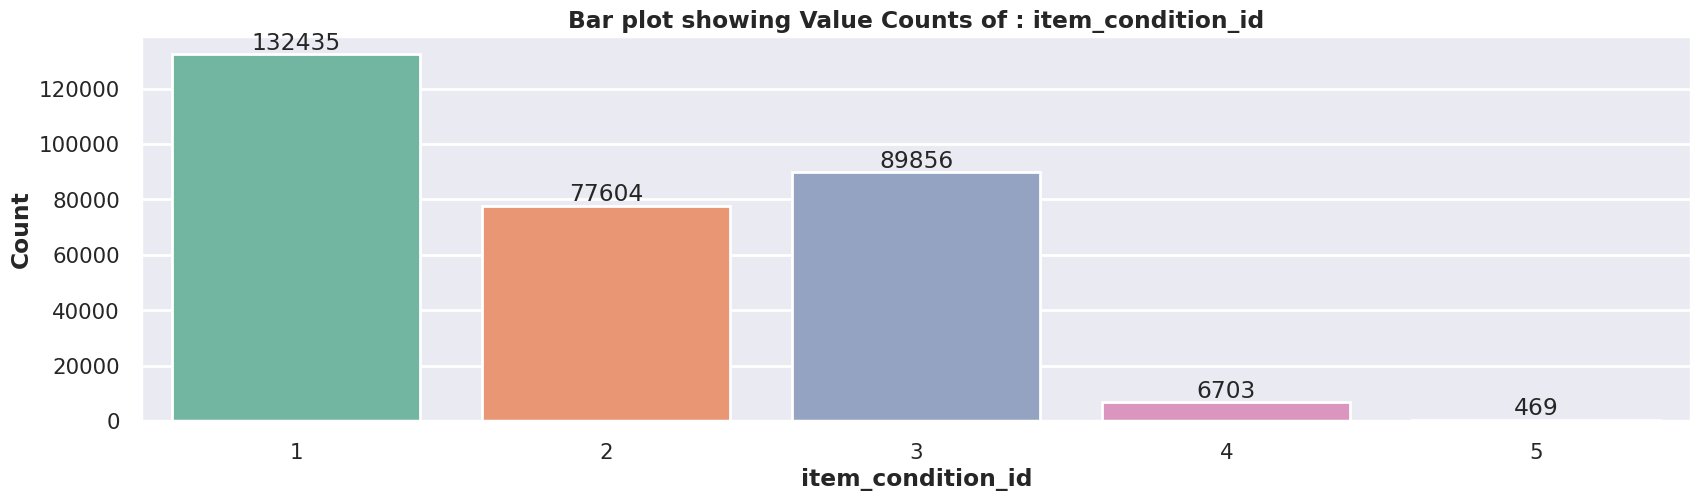

In [34]:
'''
• Write the code to find out (print) the count of the rows on each number (value) in column item_condition_id.
'''

# we call the function that we have defined in our EDA - code # 17 above

value_count_info(df,'item_condition_id')

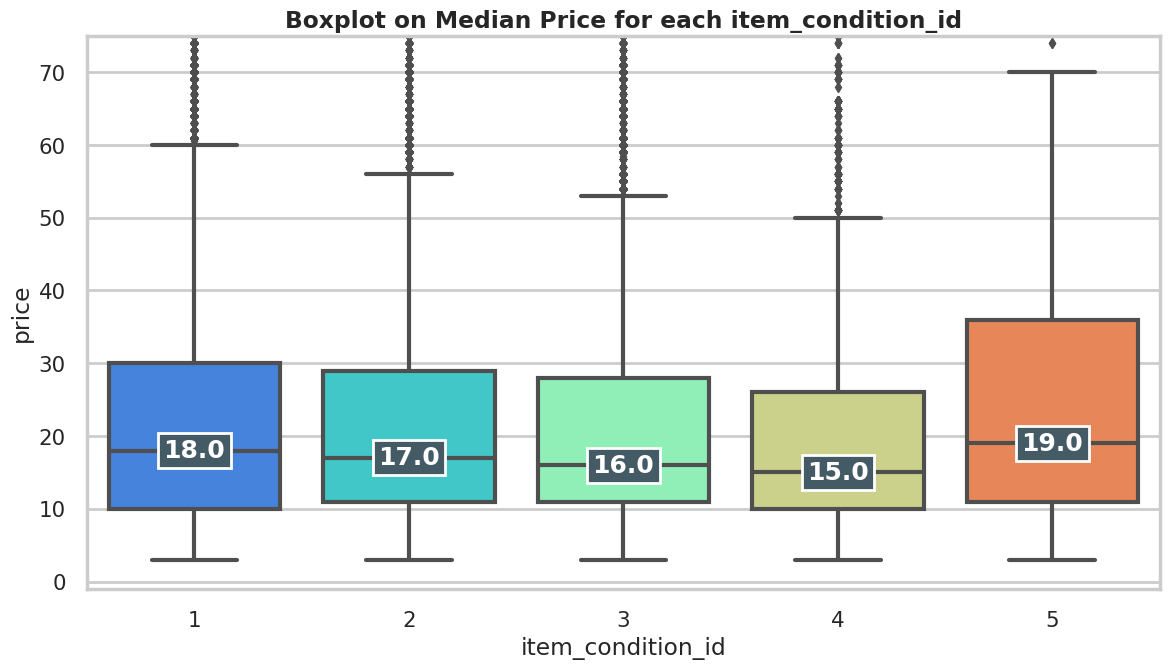

In [35]:
'''
• Draw the boxplot graphs (one plot) on the price for each item condition value,
and find out out whether the better condition of the item could have higher median price
(draw the plot and answer this question in the comment and report).
'''
sns.set_style("whitegrid") # set a new background
plt.figure(figsize = (12,7)) # fix the plot size

# Calling the boxplot function
box_plot = sns.boxplot(x="item_condition_id", y="price", data=df,palette='rainbow')
plt.title('Boxplot on Median Price for each item_condition_id',fontweight = 'bold')
plt.ylim(-1, 75) # limiting the y-axis tick to 60 to avoid showing the extreme outliers

ax = box_plot.axes
lines = ax.get_lines()
categories = ax.get_xticks()

# Code for plotting the in graph overlay median labels and the label formatting
for cat in categories:
    # every 4th line at the interval of 6 is median line
    # 0 -> p25 1 -> p75 2 -> lower whisker 3 -> upper whisker 4 -> p50 5 -> upper extreme value
    y = round(lines[4+cat*6].get_ydata()[0],1)

    ax.text(cat,
            y,
            f'{y}',
            ha='center',
            va='center',
            fontweight='bold',
            size=18,
            color='white',
            bbox=dict(facecolor='#445A64'))

box_plot.figure.tight_layout()


Here we can see that for

- Item Condition 1 - Median is 18
- Item Condition 2 - Median is 17
- Item Condition 3 - Median is 16
- Item Condition 4 - Median is 15
- Item Condition 5 - Median is 19


We can see that the price of the items with the highest condition, which is 1 (lower the condition id better is the quality of the item), has the second highest median price. The items with the worst condition compared with the 5 conditions in the column has the highest median price.

Therefore the items with condition 1 has a higher median price when compared to items with condition 2, 3 and 4. But the variance is only minimal and not very significant.



1). Why you decide to choose your solution;

- Since the boxplot is better annotated and give a complete picture of the median price and value by one look at the graphical representation.

2). Are there any other solutions that could solve the question;

- Executing the same question without a function call.


3). Whether your solution is the optimal or not? why?

- Split by item condition id was already done during the basic EDA Phase at the top of this code book. This shows the advantange of defining a function. Here only the function call was done with the data frame being passed in as a parameter. This is the most optimal solution with high reusability.

## Question 1.5

---

Conduct the category analysis and find out the relevant information:

-  Write the code to find out (print) how many unique categories you could find from column category_name.

- For the items with worst condition only (highest value from item_condition_id), write code to (print) find out the top 3 categories (now you probably understand the findings you had in Question 1.4).

---

### Answer 1.5

In [36]:
'''
• Write the code to find out (print) how many unique categories you could find from column category_name.
'''
a = df['category_name'].nunique() # find number of unique categories in the feature 'category_name'

print('The number of unique categories in the dataset are:',a)

The number of unique categories in the dataset are: 1135


In [37]:
'''
• For the items with worst condition only (highest value from item_condition_id),
write code to (print) find out the top 3 categories (now you probably understand the findings you had in Question 1.4).
'''
a = df[df['item_condition_id'] == 5] # slice the data frame for only those transactions which invlove item_condition_id =5

b = a['category_name'].value_counts()  # number value counts of category name
b = b.to_frame().rename(columns={'category_name':'count'}) # convert to frame and rename column

c = a['category_name'].value_counts(normalize=True)*100  # value counts of category name in percenatge
c = c.to_frame().rename(columns={'category_name':'Percentage'})

c['Percentage'] = c['Percentage'].apply(lambda x: f"{x:.1f}%") # display 'Percentage' in % format, upto 1 decimal place

d = a.groupby('category_name').median()   # find the median price of each category
d = d.rename(columns={'price':'Median_Price'}) # rename column

worst_condition_items_info = pd.concat([b,c,d],axis = 1) # create a combined data frame
display(worst_condition_items_info.head(3)) # view only the top three categories

print("Total number of Transactions involving 'item_condition_id' = 5 are :", len(df[df['item_condition_id'] == 5]))

count Percentage  \
Electronics/Cell Phones & Accessories/Cell Phon...    115      24.6%   
Electronics/Video Games & Consoles/Games               37       7.9%   
Electronics/Video Games & Consoles/Consoles            31       6.6%   

                                                    Median_Price  
Electronics/Cell Phones & Accessories/Cell Phon...          38.0  
Electronics/Video Games & Consoles/Games                    18.0  
Electronics/Video Games & Consoles/Consoles                 24.0

Total number of Transactions involving 'item_condition_id' = 5 are : 469


 The top 3 categories where the item condition is the worst (5) are

 - Electronics/Cell Phones & Accessories/Cell Phones & Smartphones - ~25%
 - Electronics/Video Games & Consoles/Games - ~8%
 - Electronics/Video Games & Consoles/Consoles - ~7%

 Everything belongs to the electronics category. Therefore the median price in question 1.4 is the highest where item condition is 5, as electronics are high priced products thereby pushing the median price higher as almost 39% of the items fall under the category of Electronics

1). Why you decide to choose your solution;

- Simple and straigh forward question not requiring and complex function calls

2). Are there any other solutions that could solve the question;

- Executing the same question with a function call.


3). Whether your solution is the optimal or not? why?

- It is optimal as there is no other method to find the top 3 categories per our knowledge and the unique categories.

## Question 1.6

---

**The categories in column category_name have 3 parts. The three parts (main_cat,subcat_1 and subcat_2) are concatenated with ’/’ character sequentially in the data now.**

- Write the function (must be function) to split the text content (string value in each row) in column category_name by ’/’ character. you need to handle the exception in the function for those has missing values (NaN). For missing values (NaN), the results from splitting should be ”Category Unknown”, ”Category Unknown”, ”Category Unknown”.

- Use the above function you wrote to create three new columns main_cat,subcat_1 and subcat_2 with corresponding values from the result of splitting. Print out the dataframe to show the top 5 rows for three new columns main_cat,subcat_1 and subcat_2.

---

### Answer 1.6

In [38]:
'''
• Write the function (must be function) to split the text content (string value in each row) in column
category_name by ’/’ character. you need to handle the exception in the function for those has missing values (NaN).
For missing values (NaN), the results from splitting should be ”Category Unknown”, ”Category Unknown”, ”Category Unknown”.
'''
# define a function 'split_column' which will have 3 input parameters
#   1. name of the data frame
#   2. name of the column which needs to be split
#   3. the string value which will be used to fill in the missing values

def split_column(DF, column_name,string):

    # make a new data frame with columns made by splitting a given column in the given data frame where ever there is '/'
    split_data = DF[column_name].str.split('/',
                                           expand=True, # new columns will be created in a new data frame
                                           n=2)         # splitting will stop after 2 splits. So max 3 cols will be added

    # name the new columns created
    split_data.columns = ['main_cat', 'subcat_1', 'subcat_2']

    # fill missing values in three new columns with a given string value
    split_data = split_data.fillna(string)

    # concatenate the newly created dataframe of split columns with the original dadatframe,so that new columns are added
    # to the original dataframe
    DF = pd.concat([DF, split_data], axis=1)

    return DF



In [39]:
# Copy DataFrame. We shall work on copy so that the original data set remains unchanged

df2 = df.copy()

display(df2.head(3)) # check df2

train_id                        name item_condition_id  \
0   128037    Bundle for Sassy Sisters                 3   
1   491755                PINK VS TANK                 2   
2   470924  Funko Pop Unmasked Cyclops                 1   

                        category_name brand_name  price shipping  \
0         Women/Tops & Blouses/Blouse        NaN   16.0        0   
1     Women/Tops & Blouses/Tank, Cami        NaN   17.0        0   
2  Kids/Toys/Action Figures & Statues      Funko   30.0        1   

                                   clean_description  
0  max cleo black dress paper crane black tank to...  
1       sequin pink sign sequins missing gently worn  
2  box great condition comes soft pop protector p...

In [40]:
'''
Use the above function you wrote to create three new columns main_cat,subcat_1 and
subcat_2 with corresponding values from the result of splitting. Print out the dataframe to
show the top 5 rows for three new columns main_cat,subcat_1 and subcat_2.
'''
# call the function and pass the required parameters - name of dataframe , feature_name , and string_value
df2 = split_column(df2,'category_name','Category Unknown')
df2.head()

train_id                            name item_condition_id  \
0   128037        Bundle for Sassy Sisters                 3   
1   491755                    PINK VS TANK                 2   
2   470924      Funko Pop Unmasked Cyclops                 1   
3   491263                 Baby Roshe Runs                 3   
4   836489  Baby Girl Ralph Lauren dresses                 3   

                        category_name    brand_name  price shipping  \
0         Women/Tops & Blouses/Blouse           NaN   16.0        0   
1     Women/Tops & Blouses/Tank, Cami           NaN   17.0        0   
2  Kids/Toys/Action Figures & Statues         Funko   30.0        1   
3               Kids/Boys 2T-5T/Shoes          Nike   19.0        0   
4         Kids/Girls 0-24 Mos/Dresses  Ralph Lauren   24.0        0   

                                   clean_description main_cat        subcat_1  \
0  max cleo black dress paper crane black tank to...    Women  Tops & Blouses   
1       sequin pink sign sequins missing gently worn    Women  Tops & Blouses   
2  box great condition comes soft pop protector p...     Kids            Toys   
3                 baby black nike roshe runs size 5c     Kids      Boys 2T-5T   
4  2 polo dresses 3 months wore washed dreft pink...     Kids  Girls 0-24 Mos   

                   subcat_2  
0                    Blouse  
1                Tank, Cami  
2  Action Figures & Statues  
3                     Shoes  
4                   Dresses

In [41]:
# check if missing values in the newly created columns were replaced by 'Category Unkown'.

df2[df2['main_cat']=='Category Unknown'].head()  # view those rows where main_cat == 'Category Unknown'

train_id                                   name item_condition_id  \
121   420010               Authentic Leather Jacket                 2   
246   755244                      Bundle 40 Dollars                 3   
248  1001910                   Rae Dunn darling mug                 2   
315   942795                                  PRIDE                 1   
621   168998  NOS Vintage mini-doll tie dye pencils                 2   

    category_name   brand_name  price shipping  \
121           NaN  Black Rivet   16.0        0   
246           NaN          NaN   46.0        0   
248           NaN     Rae Dunn   22.0        0   
315           NaN          NaN    8.0        1   
621           NaN          NaN   19.0        0   

                                     clean_description          main_cat  \
121  100 authentic leather great condition worn twi...  Category Unknown   
246                                    description yet  Category Unknown   
248                               rae dunn darling mug  Category Unknown   
315  pride lot 2 pairs socks one purple white says ...  Category Unknown   
621  fantastic brand new old stock 60 comes display...  Category Unknown   

             subcat_1          subcat_2  
121  Category Unknown  Category Unknown  
246  Category Unknown  Category Unknown  
248  Category Unknown  Category Unknown  
315  Category Unknown  Category Unknown  
621  Category Unknown  Category Unknown

- We can see the string 'Category Unknown' in the new columns

In [42]:
# check for missing values in the newly created columns

split_cols = ['main_cat','subcat_1','subcat_2']   # create a list of names of features

for i in split_cols:  # check for null values in a for loop
    print('Missing Values in',i,'are:', df2[i].isnull().sum())

Missing Values in main_cat are: 0
Missing Values in subcat_1 are: 0
Missing Values in subcat_2 are: 0


- There are no missing values in the newly created columns , which implies that all missing values have been correctly filled by the given string value of 'Category Unknown'

1). Why you decide to choose your solution;

- When we individually developed the solution for this question there were mainly 2 type of solution cameup, one with lamda function (row wise) and anothers was with pandas function (column wise). Since Pandas 'str.split' gave time efficient solution, we stick to this solution

2). Are there any other solutions that could solve the question;

- As mentioned earlease we can approach row wise split and column wise split logic. Both of them can be represented as function and can achieve the same result.

3). Whether your solution is the optimal or not? why?

- Since Pandas DF 'str.split' function is time effieienct and operate on DF column Series, this solution is much more efficient that row wise operation

## Question 1.7

---

**After splitting the category for column category_name, we now have the three main details regarding to the category information. However, we need to clean the text in each of the new three columns in lowercase.**

- Write code (or function) to change the text (value in each row) from the new three columns to lowercase.

- Draw the bar chart to find out the top 5 most popular main categories (in column main_cat) in the data (only showing the top 5).

- Write code (or function) to (print) find out how many unique main categories (in column main_cat), unique first sub-categories (in column subcat_1) and unique second sub-categories (in column subcat_2) respectively.

---


### Answer 1.7

In [43]:
'''
• Write code (or function) to change the text (value in each row) from the new three columns to lowercase.
'''
split_cols

['main_cat', 'subcat_1', 'subcat_2']

In [44]:
# run a loop code to change the string to lower case only for the newly created columns

for i in split_cols:
    df2[i] = df2[i].str.lower()

df2[split_cols].head(3)

main_cat        subcat_1                  subcat_2
0    women  tops & blouses                    blouse
1    women  tops & blouses                tank, cami
2     kids            toys  action figures & statues



Value Count Analysis of : main_cat


count Percentage
main_cat                      
women        137595     44.81%
beauty        42976     14.00%
kids          35520     11.57%
electronics   25196      8.21%
men           19396      6.32%

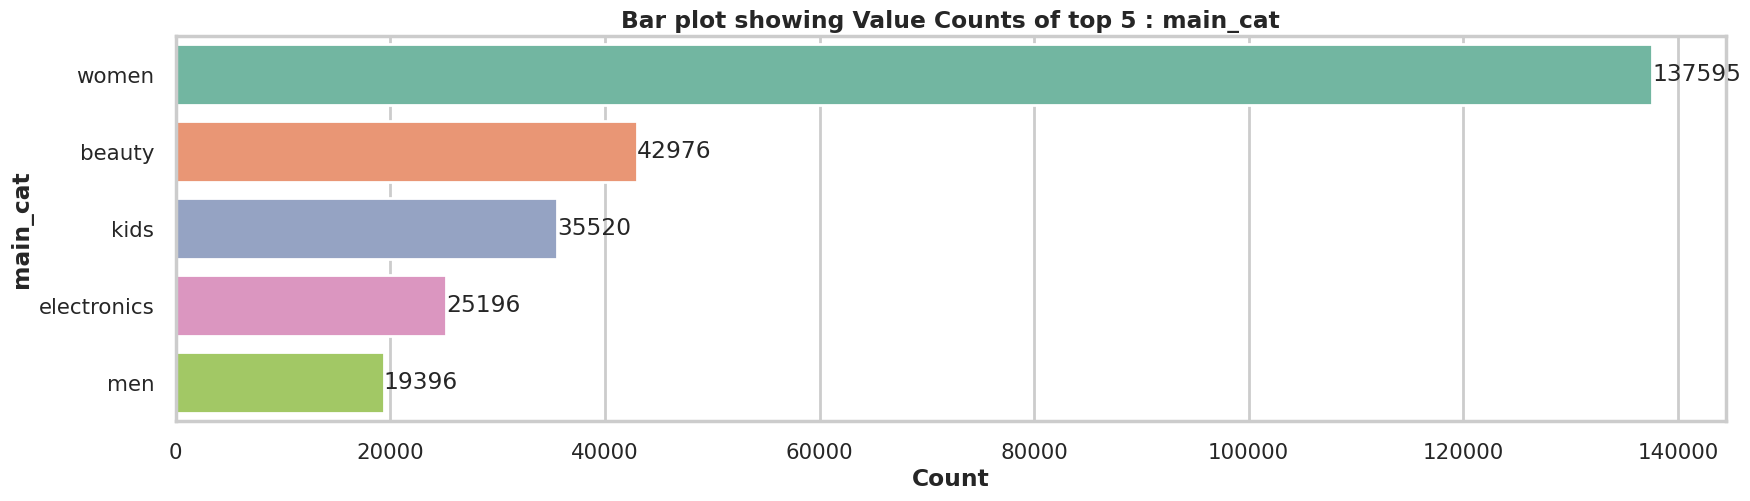

In [45]:
'''
• Draw the bar chart to find out the top 5 most popular main categories (in column main_cat) in the data
(only showing the top 5).
'''

# we call the function that we have defined earlier, code # 17 above


value_count_info(df2,'main_cat')

In [46]:
'''
• Write code (or function) to (print) find out how many unique main categories (in column main_cat),
unique first sub-categories (in column subcat_1) and unique second sub-categories (in column subcat_2) respectively.
'''
split_cols = ['main_cat', 'subcat_1', 'subcat_2']

for i in split_cols:
    print('The number of unique categories in',i,'are :',df2[i].nunique())


The number of unique categories in main_cat are : 11
The number of unique categories in subcat_1 are : 114
The number of unique categories in subcat_2 are : 789


In [47]:
split_cols = ['main_cat', 'subcat_1', 'subcat_2']

unique_categories = pd.DataFrame(columns=['Number of Unique Categories'])  # Create an empty DataFrame

for i in split_cols:
    unique_categories.loc[i] = [df2[i].nunique()]  # Add a new row for each column

display(unique_categories)

Number of Unique Categories
main_cat                           11
subcat_1                          114
subcat_2                          789

1). Why you decide to choose your solution;

- All the questions can be answered with simple soultion along with earlear defined resuable value_count function

2). Are there any other solutions that could solve the question;

- We can define seperate function for wach and every simple function which is already efined in welknown packages and then execute, But we like to use already avaliable/defined functions (code resuability)

3). Whether your solution is the optimal or not? why?

- We use simple inline codes and achieved the solution, there for our solution for this question is optimal.

## Question 1.8

---

**Exploring the price and categories.**

- Write code to (print) find out the median price for all the categories in new column main_cat.

- Draw the bar chart to find out the top 10 most expensive first sub-categories (in column subcat_1) in the data.

- Draw the bar chart to find out the top 10 cheapest second sub-categories (in column subcat_2) in the data.

---

### Answer 1.8

Median Price
main_cat                            
men                             21.0
women                           19.0
category unknown                18.0
home                            18.0
sports & outdoors               16.0
vintage & collectibles          16.0
beauty                          15.0
electronics                     15.0
kids                            14.0
other                           14.0
handmade                        11.0

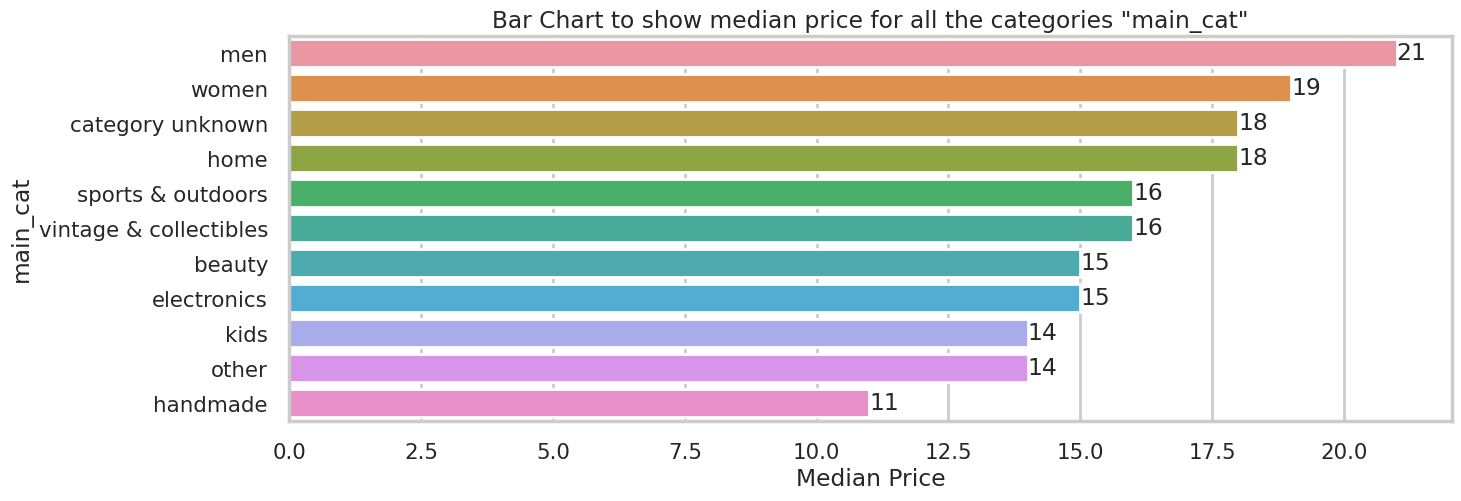

In [48]:
'''
• Write code to (print) find out the median price for all the categories in new column main_cat.
'''
# create a pivot table
a = pd.pivot_table(data   = df2,
                   index  = 'main_cat',
                   values = 'price',
                   aggfunc= 'median').sort_values(by = 'price', ascending = False) # sort the median Price high to low

a = a.rename(columns={'price':'Median Price'})  # rename the price column correctly

display(a)

plt.figure(figsize=(15,5))
g22 = sns.barplot(data = a,
                  y = a.index,
                  x = a['Median Price'],
                  orient='h')
for i in g22.containers: g22.bar_label(i,)
plt.title('Bar Chart to show median price for all the categories "main_cat"')
plt.show(g22)

In [49]:
'''
• Draw the bar chart to find out the top 10 most expensive first sub-categories (in column subcat_1) in the data.
'''
# create a pivot to view the max , mean and median prices of items in subcat_1
a = pd.pivot_table(data   =  df2,
                   index  = 'subcat_1',
                   values = 'price',
                   aggfunc= ['max','mean','median'])

a = a.sort_values(by = ('max','price'),ascending=False)  # sort from high to low the 'max' price

display(a)

max       mean median
                            price      price  price
subcat_1                                           
makeup                     2000.0  18.773449   15.0
cell phones & accessories  1909.0  30.031043   12.0
women's handbags           1850.0  58.775592   31.0
jewelry                    1800.0  27.474203   14.0
computers & tablets        1400.0  82.269926   40.0
...                           ...        ...    ...
books and zines              34.0  15.333333   12.5
holidays                     33.0  16.085714   15.0
ceramics and pottery         28.0  11.333333    9.0
magazines                    28.0  11.071429   10.0
geekery                      24.0  12.928571   10.0

[114 rows x 3 columns]

max
                            price
subcat_1                         
makeup                     2000.0
cell phones & accessories  1909.0
women's handbags           1850.0
jewelry                    1800.0
computers & tablets        1400.0
bags and purses            1250.0
collectibles               1050.0
category unknown           1000.0
men's accessories           850.0
daily & travel items        840.0

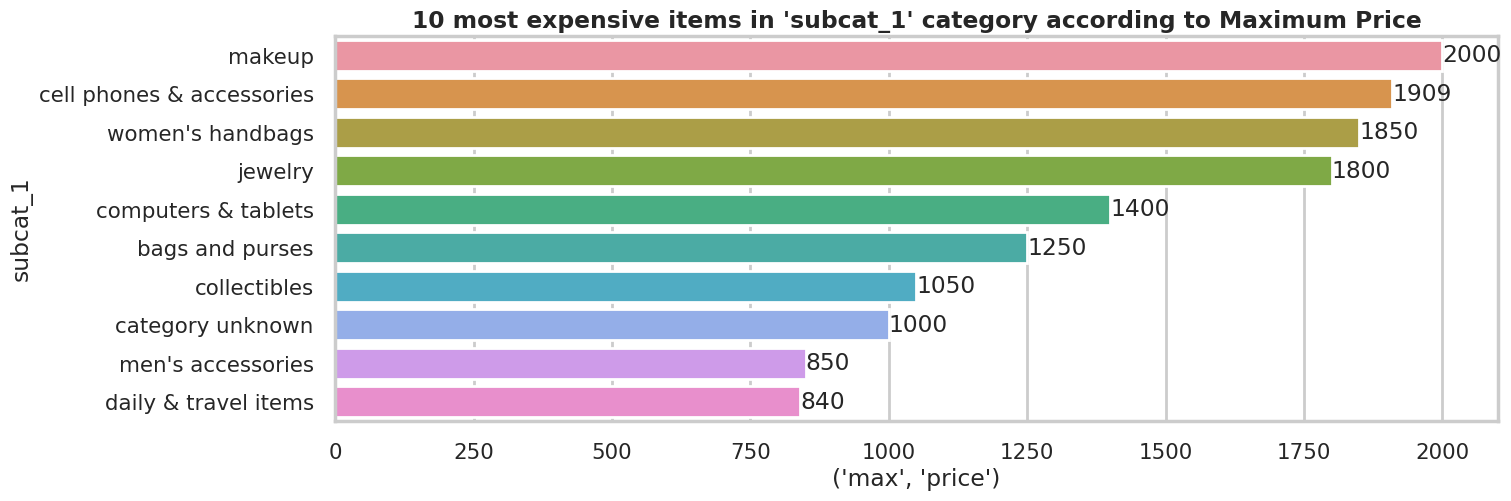

In [50]:
# select the top 10 brands based on Maximun Price

a_top10_max = round(a.head(10),0)  # view the top 10
display(round(a_top10_max[[('max','price')]],1)) # display only the top 10 rows of ('max','price') column

plt.figure(figsize = (15,5))
g =sns.barplot(data = a_top10_max,
            x = a_top10_max[('max','price')],
            y = a_top10_max.index );
for i in g.containers: g.bar_label(i,)
plt.title("10 most expensive items in 'subcat_1' category according to Maximum Price",fontweight = 'bold')
plt.show(g)


mean
                      price
subcat_1                   
computers & tablets    82.3
strollers              81.7
cameras & photography  70.8
women's handbags       58.8
bags and purses        58.1
footwear               47.5
musical instruments    45.4
suits                  43.3
golf                   43.2
shoes                  41.7

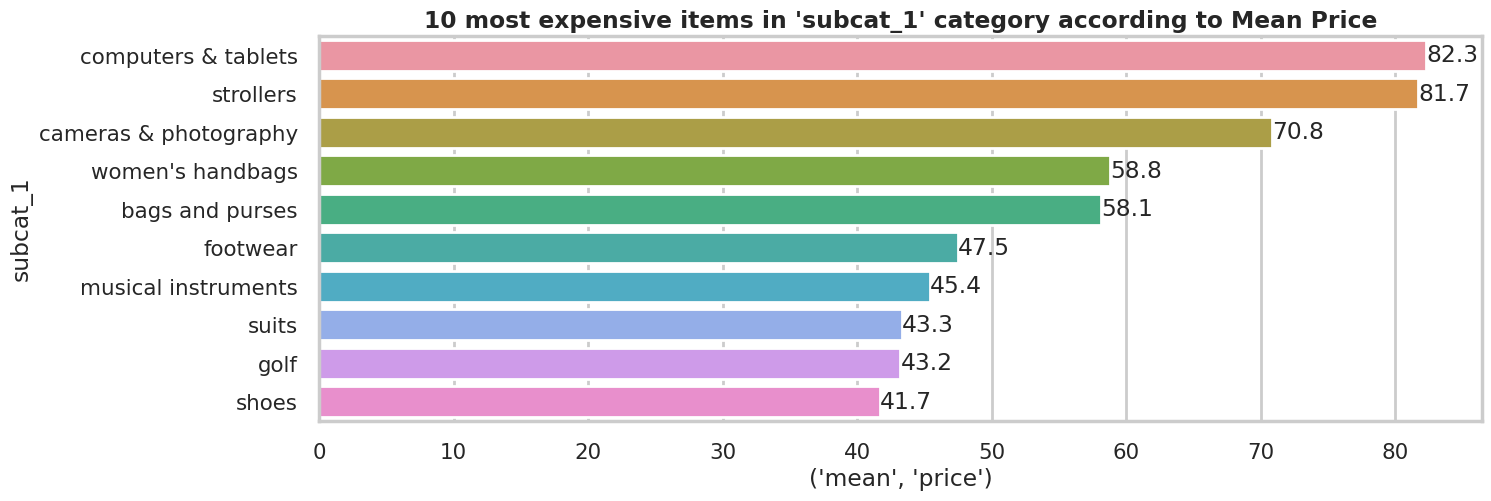

In [51]:
# select the top 10 brands based on Mean Price

a = a.sort_values(by = ('mean','price'),ascending=False)  # sort the pivot on mean price from high to low

a_top10_mean = round(a.head(10),1)

display(round(a_top10_mean[[('mean','price')]],1)) # display only the top 10 rows of ('mean','price') column

plt.figure(figsize = (15,5))
g =sns.barplot(x = a_top10_mean[('mean','price')],
               y = a_top10_mean.index );
for i in g.containers: g.bar_label(i,)
plt.title("10 most expensive items in 'subcat_1' category according to Mean Price",fontweight = 'bold')
plt.show(g)


median
                       price
subcat_1                    
computers & tablets     40.0
cameras & photography   40.0
strollers               39.0
suits                   33.0
blazers & sport coats   32.5
women's handbags        31.0
footwear                31.0
musical instruments     31.0
shoes                   29.0
bags and purses         26.0

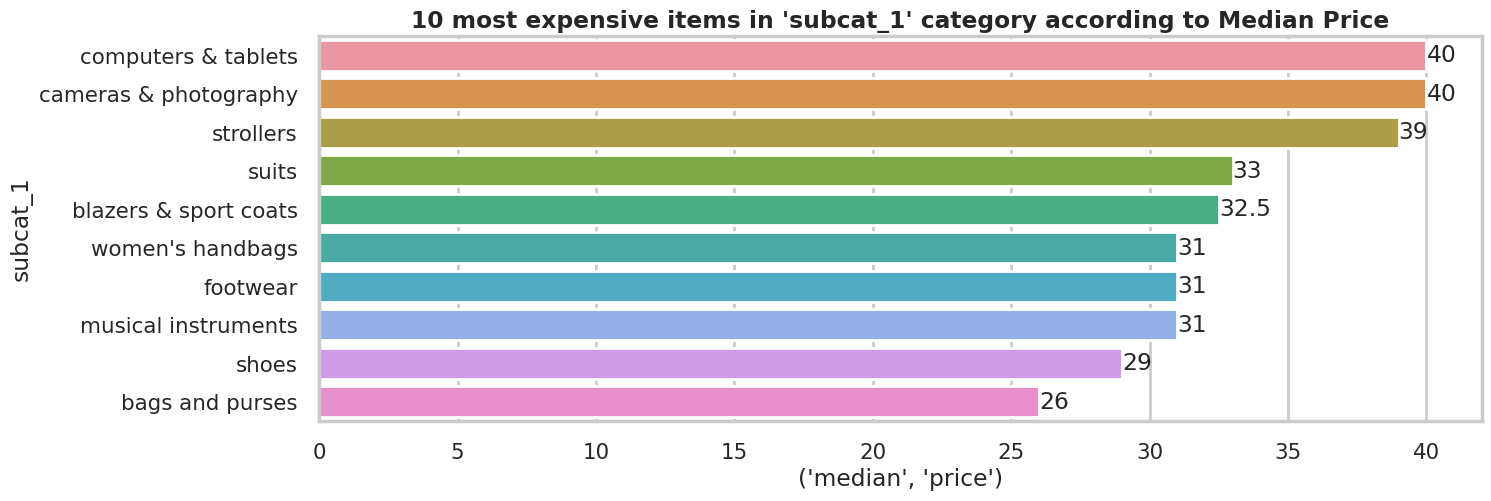

In [52]:
# select the top 10 brands based on Median Price

a = a.sort_values(by = ('median','price'),ascending=False) # sort the pivot on median price , high to low

a_top10_median = round(a.head(10),1)

display(round(a_top10_median[[('median','price')]],1)) # display only the top 10 rows of ('median','price') column

plt.figure(figsize = (15,5))
g =sns.barplot(x = a_top10_median[('median','price')],
               y = a_top10_median.index );
for i in g.containers: g.bar_label(i,)
plt.title("10 most expensive items in 'subcat_1' category according to Median Price",fontweight = 'bold')
plt.show(g)



- If we go by the highest priced items in subcat_1 ,'makeup' is most expensive

- If we go by the median of the prices of items in subcat_1 ,'computers & tablets' is on top

- If we go by the mean of the prices of items in subcat_1 ,''computers & tablets' is again number 1

In [53]:
'''
• Draw the bar chart to find out the top 10 cheapest second sub-categories (in column subcat_2) in the data.
'''
# create a pivot to view the max , mean and median prices of items in subcat_2 , sorted by minimum prices
a = pd.pivot_table(data   =  df2,
                   index  = 'subcat_2',
                   values = 'price',
                   aggfunc= ['min','mean','median'])

a = a.sort_values(by = ('min','price'),ascending=True)  # sort from high to low the 'max' price

display(round(a.head(10),1))

min  mean median
                                 price price  price
subcat_2                                           
100 years or older                 3.0  26.7   22.0
lanyard                            3.0  11.0    9.0
lamps& accessories                 3.0  22.5   16.0
knit top                           3.0  19.9   15.0
knee-length                        3.0  29.7   24.0
kitchen utensils & gadgets         3.0  19.7   14.5
kids' room décor                   3.0  12.9   10.0
kids' furniture, décor & storage   3.0  15.0   11.0
kids                               3.0  13.2   10.0
keychain                           3.0  13.4   10.0

min
                           price
subcat_2                        
100 years or older           3.0
print                        3.0
skateboard                   3.0
shoulder bag                 3.0
shorts                       3.0
shoes                        3.0
shirts & tops                3.0
shipping supplies            3.0
shampoo & conditioner sets   3.0
sets                         3.0

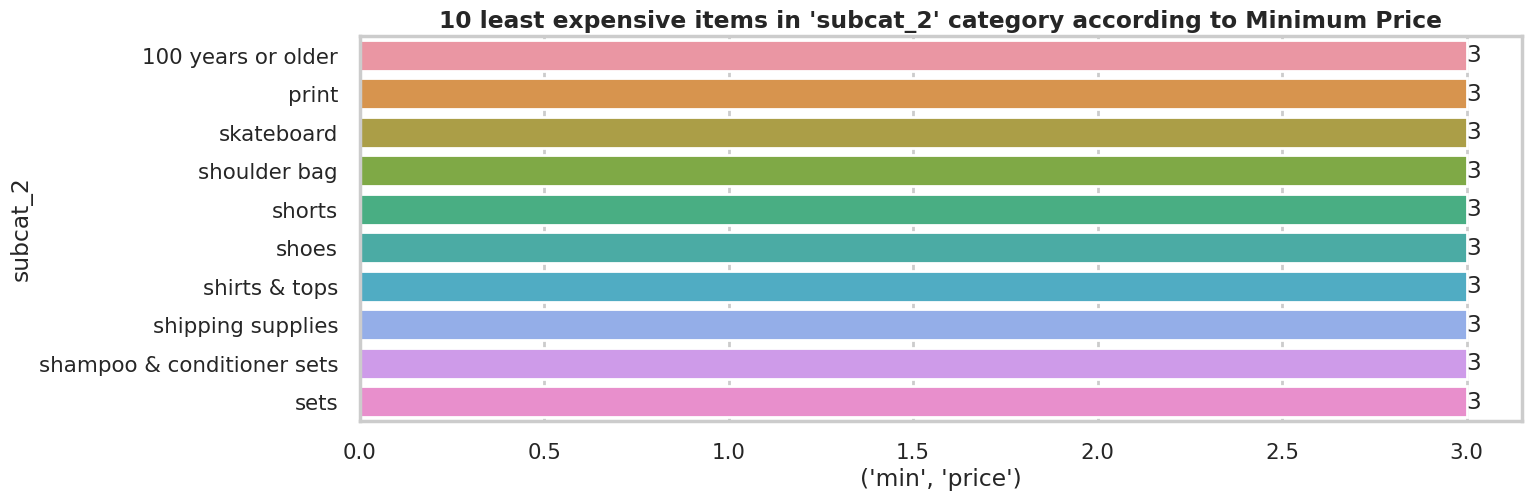

In [54]:
a = a.sort_values(by = ('min','price'),ascending=True)  # sort from high to low the 'max' price

a_bottom10_min = round(a.head(10),0)  # view the top 10
display(round(a_bottom10_min[[('min','price')]],1))

plt.figure(figsize = (15,5))
g =sns.barplot(x = a_bottom10_min[('min','price')],
               y = a_bottom10_min.index );
for i in g.containers: g.bar_label(i,)
plt.title("10 least expensive items in 'subcat_2' category according to Minimum Price",fontweight = 'bold')
plt.show(g)


mean
                     price
subcat_2                  
historical, military   3.0
necktie                3.0
photography            3.0
hair relaxers          5.0
mirror                 5.0
sticker                6.0
patch                  6.0
graphic design         6.0
fixture                6.0
pinback button         7.0

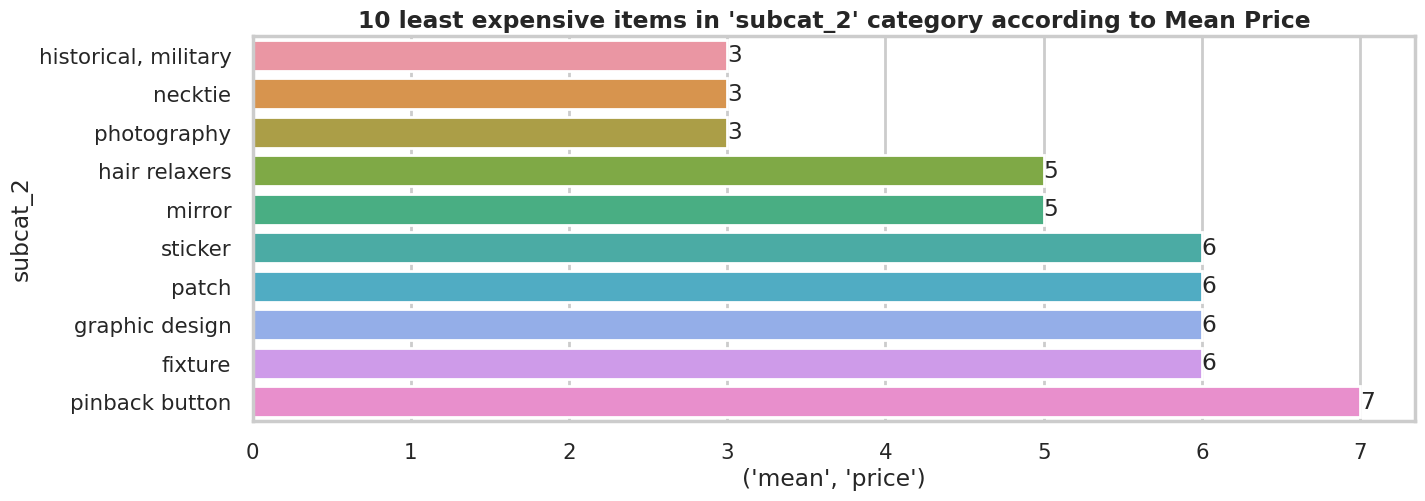

In [55]:
a = a.sort_values(by = ('mean','price'),ascending=True)  # sort from high to low the 'max' price

a_bottom10_mean = round(a.head(10),0)  # view the top 10
display(round(a_bottom10_mean[[('mean','price')]],1))

plt.figure(figsize = (15,5))
g =sns.barplot(x = a_bottom10_mean[('mean','price')],
               y = a_bottom10_mean.index );
for i in g.containers: g.bar_label(i,)
plt.title("10 least expensive items in 'subcat_2' category according to Mean Price",fontweight = 'bold')
plt.show(g)


median
                      price
subcat_2                   
historical, military    3.0
necktie                 3.0
photography             3.0
print                   4.0
sticker                 4.0
patch                   5.0
pinback button          5.0
hair relaxers           5.0
mirror                  5.0
magnet                  6.0

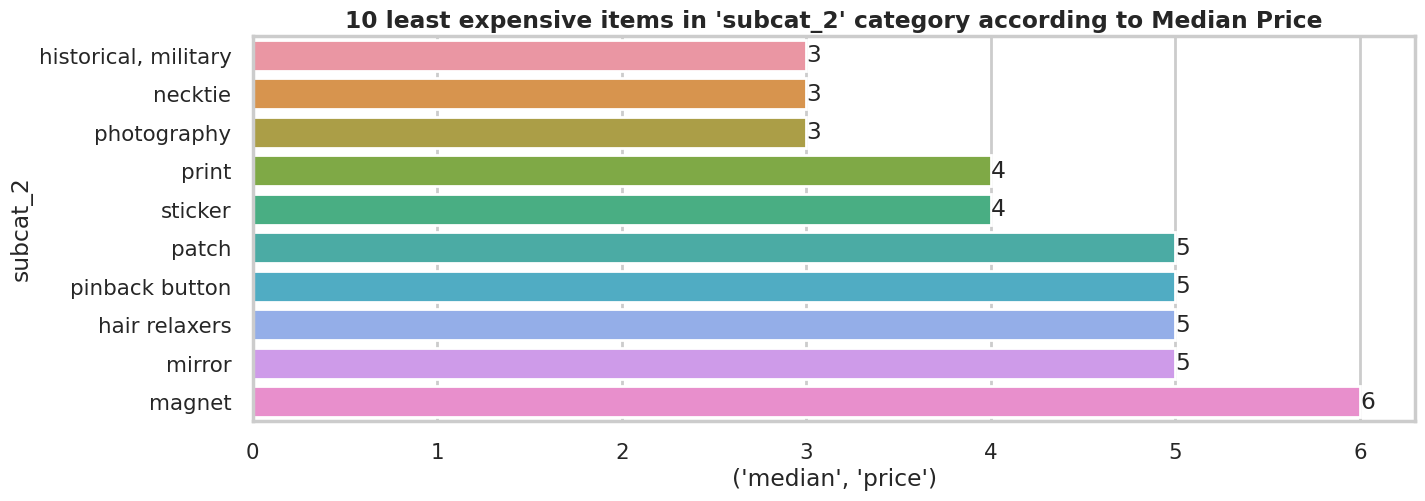

In [56]:
a = a.sort_values(by = ('median','price'),ascending=True)  # sort from high to low the 'max' price

a_bottom10_median = round(a.head(10),0)  # view the top 10
display(round(a_bottom10_median[[('median','price')]],1))

plt.figure(figsize = (15,5))
g =sns.barplot(x = a_bottom10_median[('median','price')],
               y = a_bottom10_median.index );
for i in g.containers: g.bar_label(i,)
plt.title("10 least expensive items in 'subcat_2' category according to Median Price",fontweight = 'bold')
plt.show(g)



1). Why you decide to choose your solution;

- Based on team conversatation, we want to keep the solution and the logic simple with effective results. There for we have chosen the simple but powerfull logice/code to answer this soultion

2). Are there any other solutions that could solve the question;

- Finding Expensive and Cheapest amound verity of items of diffrent brands and category is a very challenging process due to their divergance. We can find expensive on each brand/cagegoey on their transaction/price(mean/median) and so on. We have cosend all product min and max price and proceeded for the solution

3). Whether your solution is the optimal or not? why?

- We believe our code is straight forward, simple and optimal, But there are scoped for further improvement if business want the inter brand/category comparission

## Question 1.9

---

**Exploring the price and brand.**

- Write code to (print) find out the median price for all the brands (fill NaN with ’brand unavailable’).

- Draw the bar chart to find out the top 10 most popular brands in the data.

---

#### Answer 1.9

In [57]:
"""
fill NaN values in the column 'barnd_name' with string 'brand unavailable'
"""
print('Number of transactions where brand name is not mentioned :',df2['brand_name'].isna().sum())

# fill missing values in the feature 'brand_name' with string value 'brand unavailable'
df2['brand_name'] = df2['brand_name'].fillna('brand unavailable')

# check if brand_name missing values have been filled or not
a = df2[df2['brand_name'] == 'brand unavailable'].shape[0]
print("Count of transactions where missing values in 'brand_name' is filled with string 'brand unavailable':", a )


Number of transactions where brand name is not mentioned : 131227
Count of transactions where missing values in 'brand_name' is filled with string 'brand unavailable': 131227


Median Price
brand_name                            
Tiffany Designs                  359.0
Stuart Weitzman                  329.0
Blendtec                         280.0
IBM                              275.0
MICHELE                          254.0
...                                ...
A.B.S. by Allen Schwartz           3.0
Genica                             3.0
Toys R Us Plush                    3.0
Gold Bond                          3.0
Jinx                               3.0

[3046 rows x 1 columns]

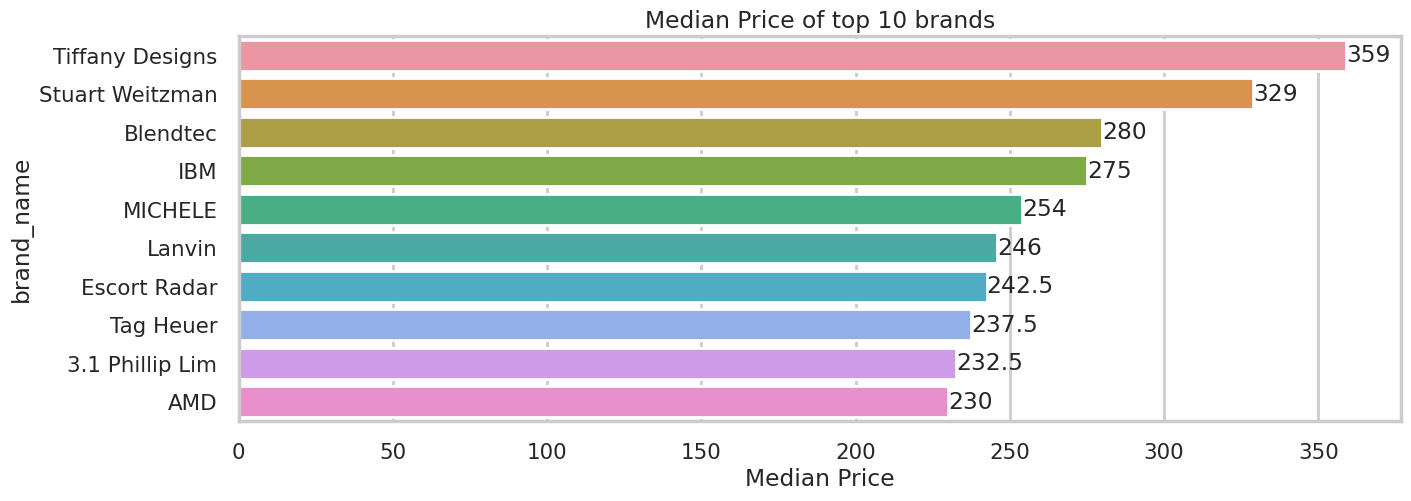

In [58]:
'''
• Write code to (print) find out the median price for all the brands
'''

# find the median price of brands and sort by price high to low
a = df2.groupby('brand_name').median().sort_values(by='price',ascending=False)
a = a.rename(columns = {'price':'Median Price'})  # rename the column from 'price' to 'Median Price'

display(a)


# make the bar plot for brands with highest median price ( top 10 )
plt.figure(figsize = (15,5))
g24 = sns.barplot(data = a.head(10),
                 x='Median Price',
                 y=a.head(10).index,
                 orient='horizontal')
for i in g24.containers: g24.bar_label(i,)

plt.title('Median Price of top 10 brands')
plt.show(g24)

1). Why you decide to choose your solution;

- Based on team conversatation, we want to keep the solution and the logic simple with effective results. There for we have chosen the simple but powerfull logice/code to answer this soultion

2). Are there any other solutions that could solve the question;

- Finding Expensive and Cheapest amound verity of items of diffrent brands and category is a very challenging process due to their divergance. We can find expensive on each brand/category on their transaction/price(mean/median) and so on. We have cosend all product min and max price and proceeded for the solution

3). Whether your solution is the optimal or not? why?

- We believe our code is streight forward, simple and optimal, But there are scoped for further improvement if business want the inter brand/category comparission

## Question 1.10
---

**Item Description Analysis.**

- Could you draw the wordcloud chart by using the column clean_description.

- Divide the data with quantiles of the price (using qcut from pandas to obtain the first/second/third/fourth quantile).

- Draw the wordcloud by using the column clean_description on each quantile of price data.

---

#### Answer 1.10

In [59]:
'''
• Draw the wordcloud chart by using the column clean_description.
'''
# view the contents of the feature 'clean_description'
df2[['clean_description']]

clean_description
0       max cleo black dress paper crane black tank to...
1            sequin pink sign sequins missing gently worn
2       box great condition comes soft pop protector p...
3                      baby black nike roshe runs size 5c
4       2 polo dresses 3 months wore washed dreft pink...
...                                                   ...
355803        beats dre solo white gently used work great
355804  viewing 4 new leap frog leapster learning game...
355805  couple places lace snagged tell fairly good co...
355806                                            size 11
355807                                    description yet

[307067 rows x 1 columns]

In [60]:
# import the necessary libraries tomake the word cloud


import nltk
nltk.download('stopwords')
import string
from wordcloud import WordCloud
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [61]:
# create a list consisting stopwords and punctuaion marks

stopwords = nltk.corpus.stopwords.words('english')
punctuations = list(string.punctuation)

list_stopwords = stopwords + punctuations

In [62]:
'''
Draw the wordcloud chart by using the column clean_description.
'''

# create a function to generate word cloud with 3 input parameters
def word_cloud_image(df,feature_name,df_name):
    words = ' '.join(df[feature_name].astype(str))   # create the word corpus
    wordcloud = WordCloud(stopwords=list_stopwords,
                          background_color='black',
                          width = 1000,
                          height = 700,
                          random_state=seed).generate(words)

    plt.figure(figsize=(10,10))
    plt.imshow(wordcloud)
    plt.title(f'Word Cloud from feature : {feature_name} of data set {df_name}',fontweight = 'bold')
    plt.axis('off')
    plt.show()
    return

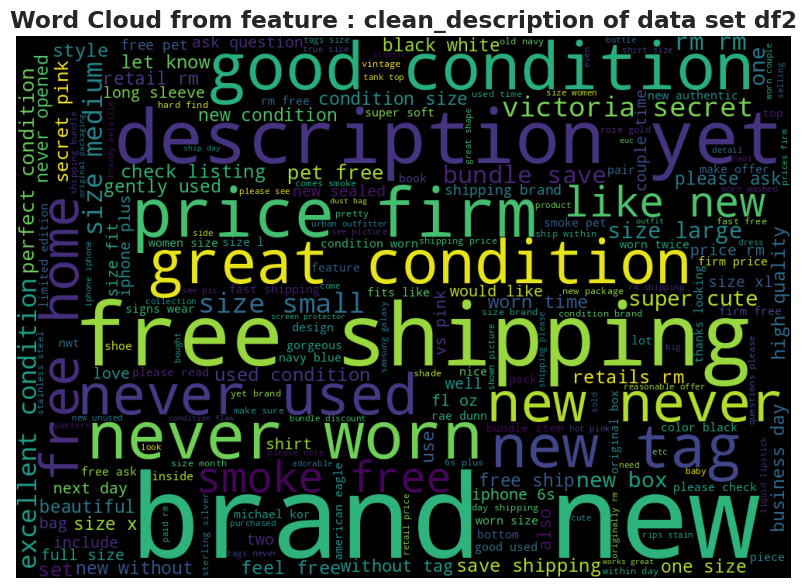

In [63]:
# utilize the function to generate the word cloud
word_cloud_image(df2,'clean_description','df2')

In [64]:
'''
• Divide the data with quantiles of the price (using qcut from pandas to obtain the first/second/third/fourth quantile).
'''
quantiles = pd.qcut(df2['price'],
                    q=4,                               # will slice the dataframe into 4 quantiles
                    labels=['Q1', 'Q2', 'Q3', 'Q4'])   # label the price quantile

df2['quantiles'] = quantiles   # create a new column in the data frame which will display the quamtiles

In [65]:
# slice the dataframe as per the different quantiles

Q1_df = df2[df2['quantiles']=='Q1']
Q2_df = df2[df2['quantiles']=='Q2']
Q3_df = df2[df2['quantiles']=='Q3']
Q4_df = df2[df2['quantiles']=='Q4']


In [66]:
# ascertain the min and max values of the prices for the 4 quantiles

q = [Q1_df,Q2_df,Q3_df,Q4_df]

for i in range(len(q)):
    print('Min and Max values for prices are:',
          q[i].price.describe().loc[['min','max']].to_list(),'for quantile',f'Q{i + 1}')


Min and Max values for prices are: [3.0, 10.0] for quantile Q1
Min and Max values for prices are: [10.5, 17.0] for quantile Q2
Min and Max values for prices are: [18.0, 29.0] for quantile Q3
Min and Max values for prices are: [30.0, 2000.0] for quantile Q4


In [67]:
# ascertain the number of transactions in each quantile
q = [Q1_df,Q2_df,Q3_df,Q4_df]

for i in range(len(q)):
    print('Transaction Count for quantile 'f'Q{i + 1} is :', len(q[i]))

Transaction Count for quantile Q1 is : 77874
Transaction Count for quantile Q2 is : 78814
Transaction Count for quantile Q3 is : 74628
Transaction Count for quantile Q4 is : 75751


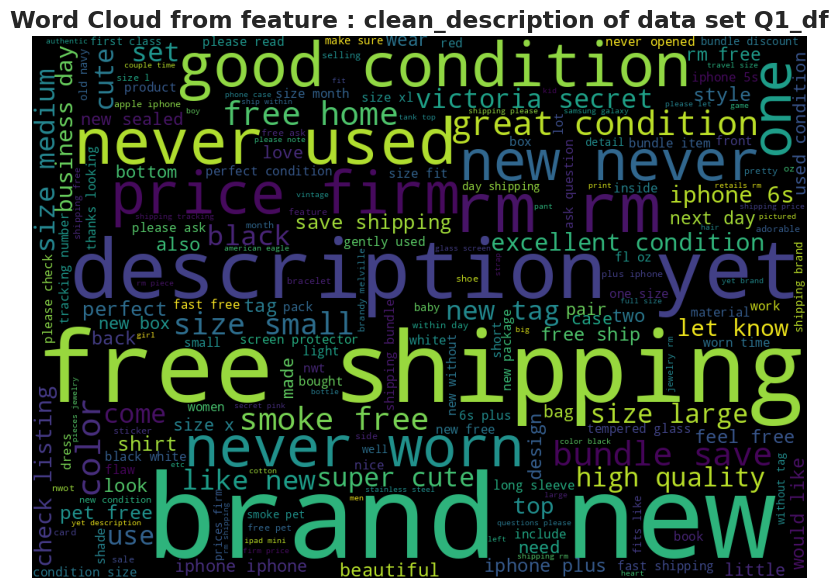

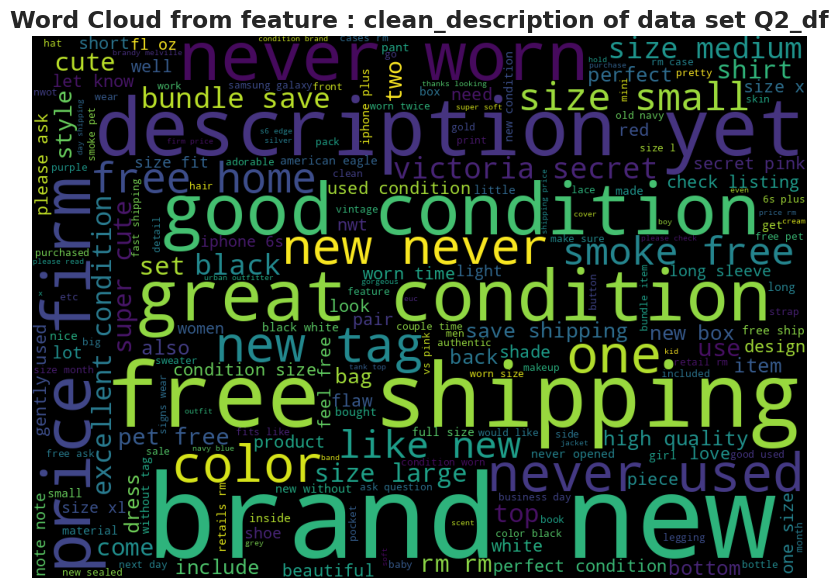

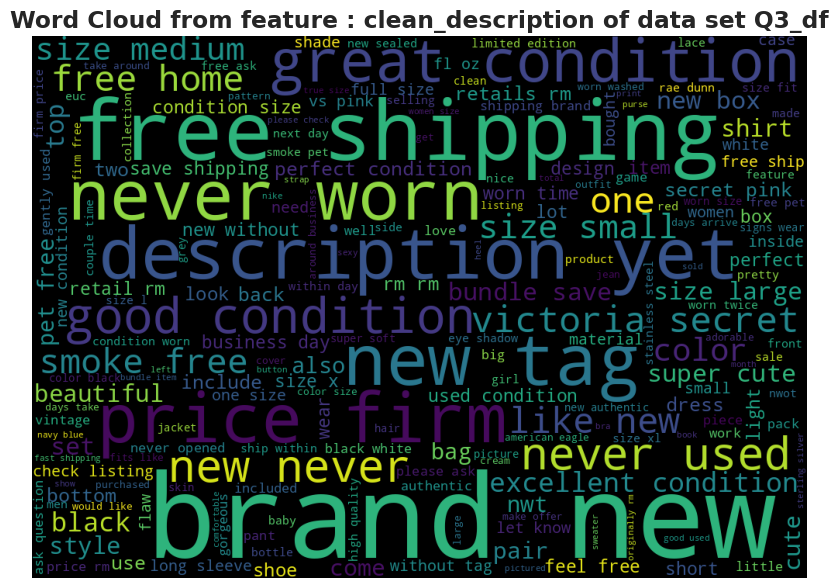

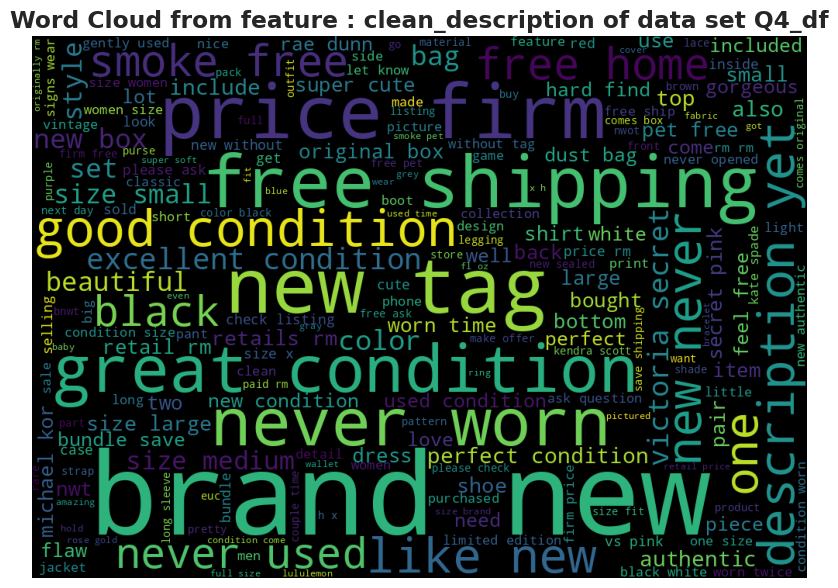

In [68]:
word_cloud_image(Q1_df,'clean_description','Q1_df')
word_cloud_image(Q2_df,'clean_description','Q2_df')
word_cloud_image(Q3_df,'clean_description','Q3_df')
word_cloud_image(Q4_df,'clean_description','Q4_df')

# PART II

## Question 2.1

The dataset used here is the New York City Taxi Demand dataset. The raw data is from the NYC Taxi and Limousine Commission. The data included here consists of aggregating the total number of taxi passengers into 30 minute buckets. In this question, we will simply process the data and explore the time series.

• Create two new dataframes df_day and df_hour by aggregating the demand value on daily and hourly level.

• Plot the demand value in two line charts for both df_day and df_hour dataframes.

• Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day dataframe, also find out the p value from adfuller test. Do you think the df_day is stationary enough (please explain your reasons in comments and report)?


### Answer 2.1

- Read the data and basic EDA

In [69]:
# Download the zip file from the google shared drive to collab
# gdown helps in download a large file from Google Drive.
!gdown --fuzzy "https://drive.google.com/file/d/1gNhse3IFEsJKXCENpQiQLThtOzV0djSJ/view?usp=sharing" -O 'nyc_taxi.csv'

Downloading...
From: https://drive.google.com/uc?id=1gNhse3IFEsJKXCENpQiQLThtOzV0djSJ
To: /content/nyc_taxi.csv
100% 266k/266k [00:00<00:00, 117MB/s]


In [70]:
df=pd.read_csv('nyc_taxi.csv',
              index_col=['timestamp'],    # make the time column as the index column
              parse_dates=['timestamp'],) # make pandas read time column, which is now the index column, in datetime format


print('\n',"\033[1m"'First 5 rows of the data')
display(df.head())                                  # display the first 5 rows of the time series data
print('\n',"\033[1m" 'Last 5 rows of the data')
display(df.tail())                                  # display the last 5 rows of the time series data



 First 5 rows of the data


value
timestamp                 
2014-07-01 00:00:00  10844
2014-07-01 00:30:00   8127
2014-07-01 01:00:00   6210
2014-07-01 01:30:00   4656
2014-07-01 02:00:00   3820


 Last 5 rows of the data


value
timestamp                 
2015-01-31 21:30:00  24670
2015-01-31 22:00:00  25721
2015-01-31 22:30:00  27309
2015-01-31 23:00:00  26591
2015-01-31 23:30:00  26288

In [71]:
a = df.isnull().sum().sum() # find out if there are missing values in the data

print("\033[1m" 'Missing vlaues in the data are:',a)

Missing vlaues in the data are: 0


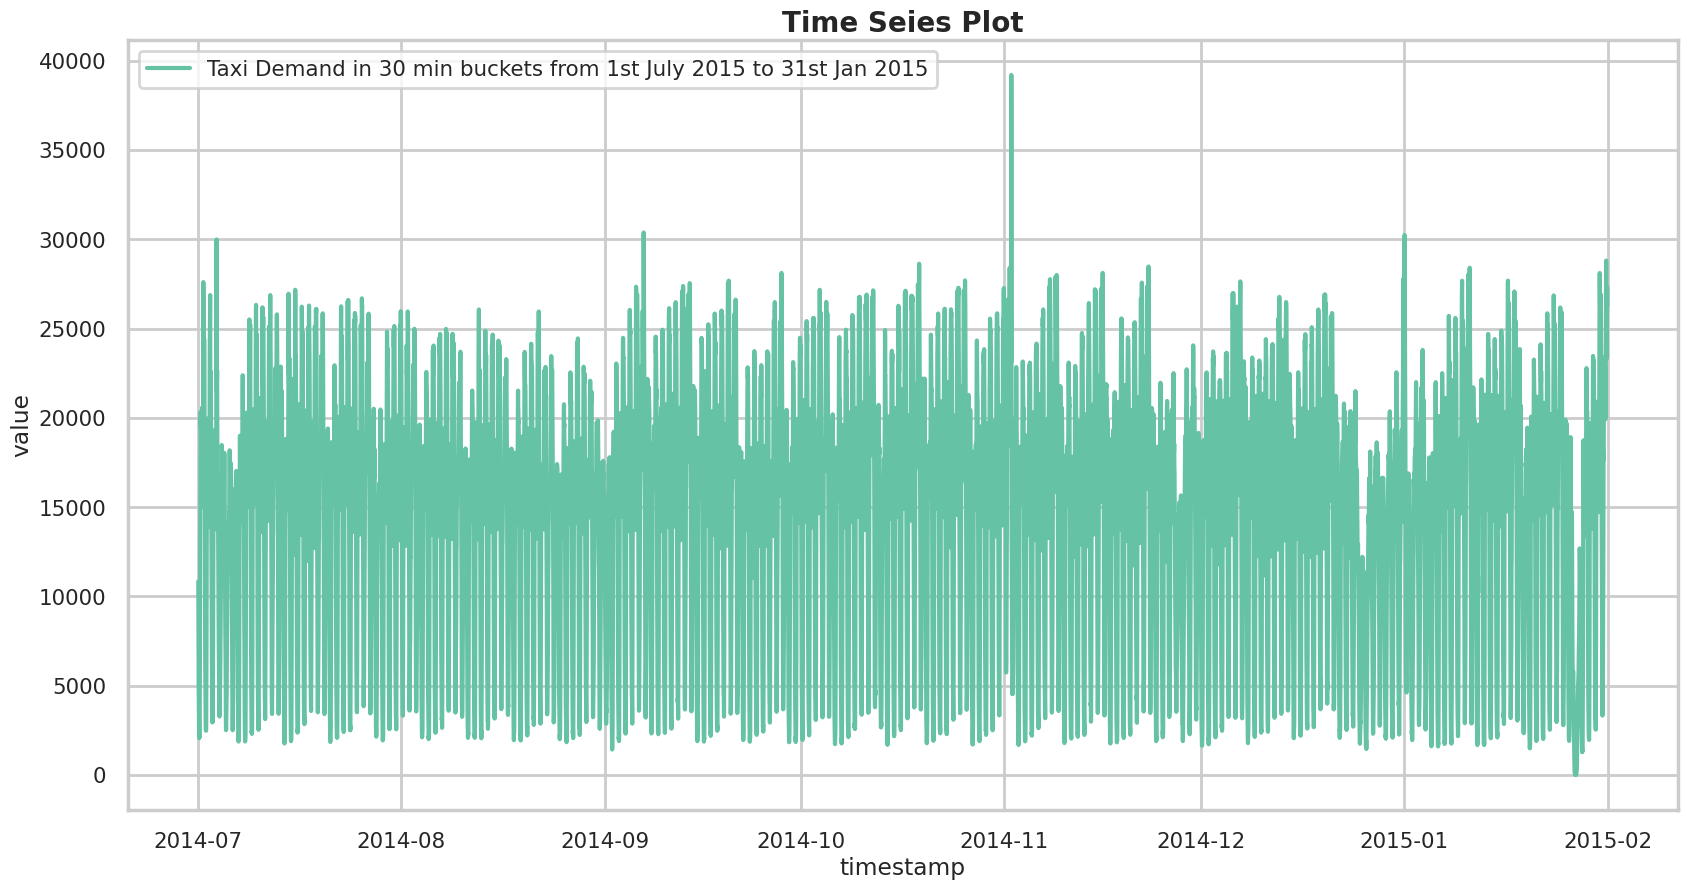

In [72]:
plt.figure(figsize=(20,10))

# plot lineplot
g = sns.lineplot(data = df,   # data is from dataframe 'df'
                 x=df.index,   # plot the time along the x_axis
                 y=df.value,   # plot the taxi demand on the y-axis
                 label='Taxi Demand in 30 min buckets from 1st July 2015 to 31st Jan 2015'); # provide plot label

plt.title('Time Seies Plot',
          fontweight = 'bold',
          fontsize = 20);
plt.legend();
plt.show(g);



- Visualize the average daily 30 min bucket demand on each calendar day of a month

Date                         1      2      3      4      5      6      7   \
Daily Avg 30 min. Demand  15354  15012  15114  14380  14831  15315  15468   

Date                         8      9      10     11     12     13     14  \
Daily Avg 30 min. Demand  15802  15640  15786  15642  15700  15970  15566   

Date                         15  
Daily Avg 30 min. Demand  15564

Date                         16     17     18     19     20     21     22  \
Daily Avg 30 min. Demand  15779  15625  15980  15685  15584  15181  15327   

Date                         23     24     25     26     27     28     29  \
Daily Avg 30 min. Demand  15187  14824  14075  13582  12751  13632  14317   

Date                         30     31  
Daily Avg 30 min. Demand  14868  15935

<Figure size 2000x1000 with 0 Axes>

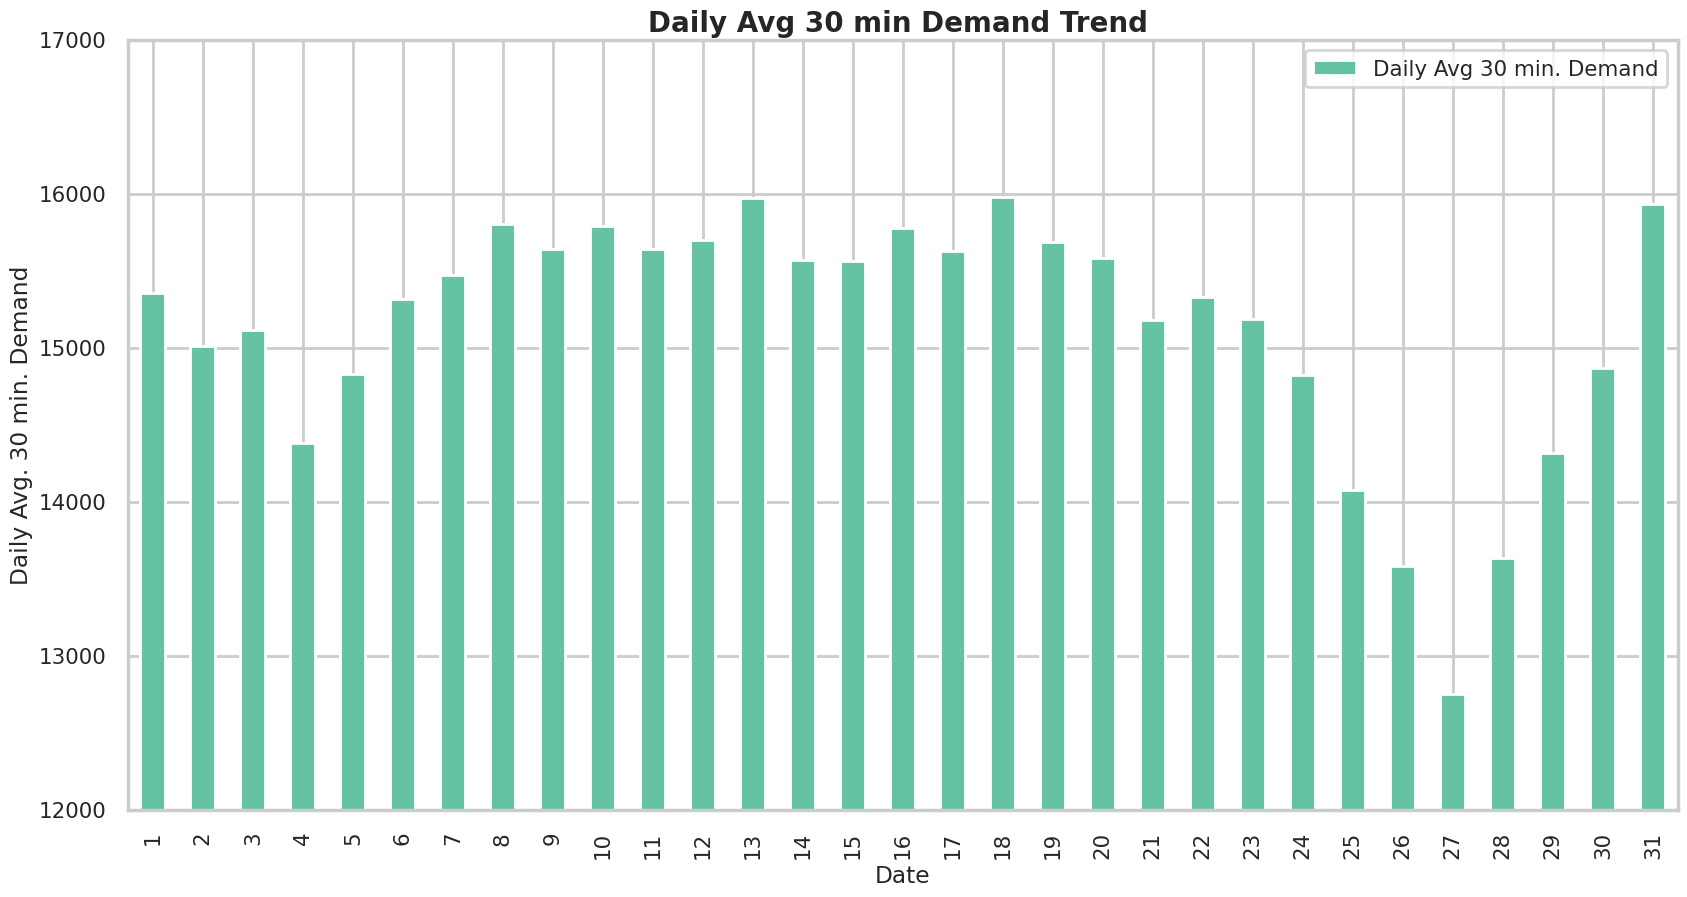

In [73]:
# make a pivot table
plt.figure(figsize=(20,10))
a = pd.pivot_table(data = df,
              index = df.index.day,  # index will be upscaled to day.Recall that the original data is every 30 min bucket
              values = 'value',
              aggfunc='mean')      # mean demand for 30 minute buckets in a day

a = a.astype('int')        # display the demand as whole number.No decimals
a = a.rename(columns={'value':'Daily Avg 30 min. Demand'})  # rename the column
a = a.rename_axis('Date') # rename the axis

display(a.iloc[:15,:].T) # view the demand of first 15 days of a month in a horizontal line
display(a.iloc[15:,:].T) # view the demand of first 15 days of a month in a horizontal line


a.plot(kind='bar',figsize=(20,10))                      # plot bar plot of the pivot on the same axis
plt.ylim(12000,17000)                         # set the min amd max limits for the y-axis
plt.xlabel('Date')                            # label along the x-axis
plt.ylabel('Daily Avg. 30 min. Demand')       # label along the y-axis
plt.title('Daily Avg 30 min Demand Trend ',fontweight = 'bold', fontsize = 20) # title the plot
plt.show()


- Demand starts dipping from the 19th of a month, untill the 27th of the month and then it sharply increases in the last 4 days of the month.

- Visualize the agregate monthly demand from July 2014 to Jan 2015

Total Rides in a month
year month                        
2014 7                    22311198
     8                    21695693
     9                    22497659
     10                   23937235
     11                   22308660
     12                   22042382
2015 1                    21426889

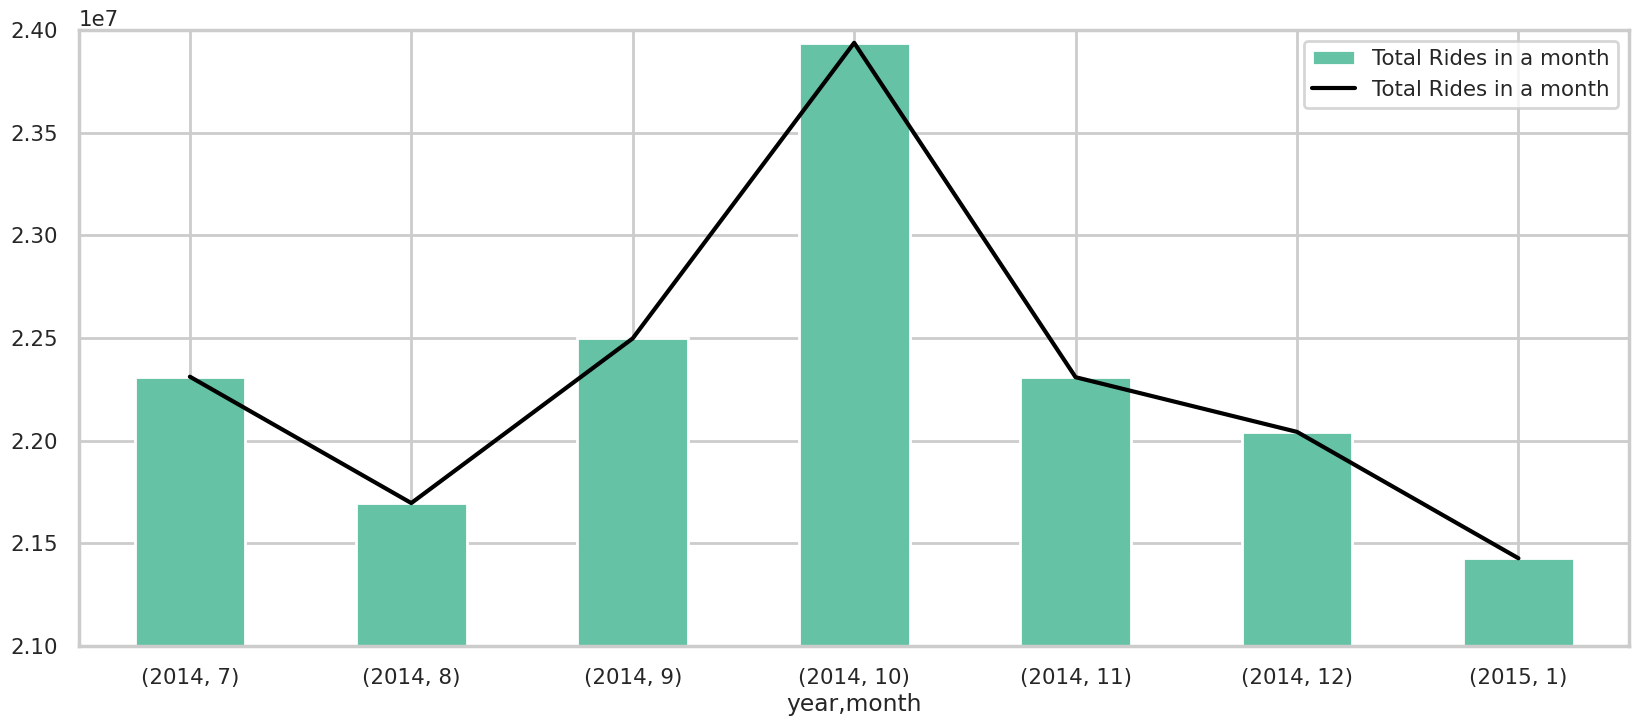

In [74]:
df1= df.copy()       # make a copy of the original dataframe and store it for future use

df1['year'] =df.index.year       # introduce a new column 'year' in the data frame 'df1'
df1['month'] = df.index.month     # introduce a new column 'month' in the data frame 'df1'

# make pivot table with year amd month as index , the demand values are summed up

a = pd.pivot_table(data = df1,
                  index = ['year','month'],
                  values = 'value',
                  aggfunc='sum')

a=a.astype('int')   # show the values as whole numbers
a=a.rename(columns={'value':'Total Rides in a month'})  # rename the column
display(a)

# visualize the aggregate monthly demand

fig,ax = plt.subplots(figsize=(20,8))

g3 = a.plot(kind='bar',ax=ax)
g4 = a.plot(kind='line',ax=ax,c='black')
plt.ylim(21000000,24000000)
plt.show()

- October 2014 had the highest demand of 23.9 M . Demand has been falling since


- Visualize the average hourly demand in a day

Hour of the day     0      1     2     3     4     5     6      7      8   \
Hourly Demand    14642  10858  8010  5802  4264  3583  7294  12390  15337   

Hour of the day     9      10     11  
Hourly Demand    16021  16099  16933

Hour of the day     12     13     14     15     16     17     18     19  \
Hourly Demand    17812  17791  18429  17640  15064  18062  21859  22891   

Hour of the day     20     21     22     23  
Hourly Demand    21575  21476  20893  18564

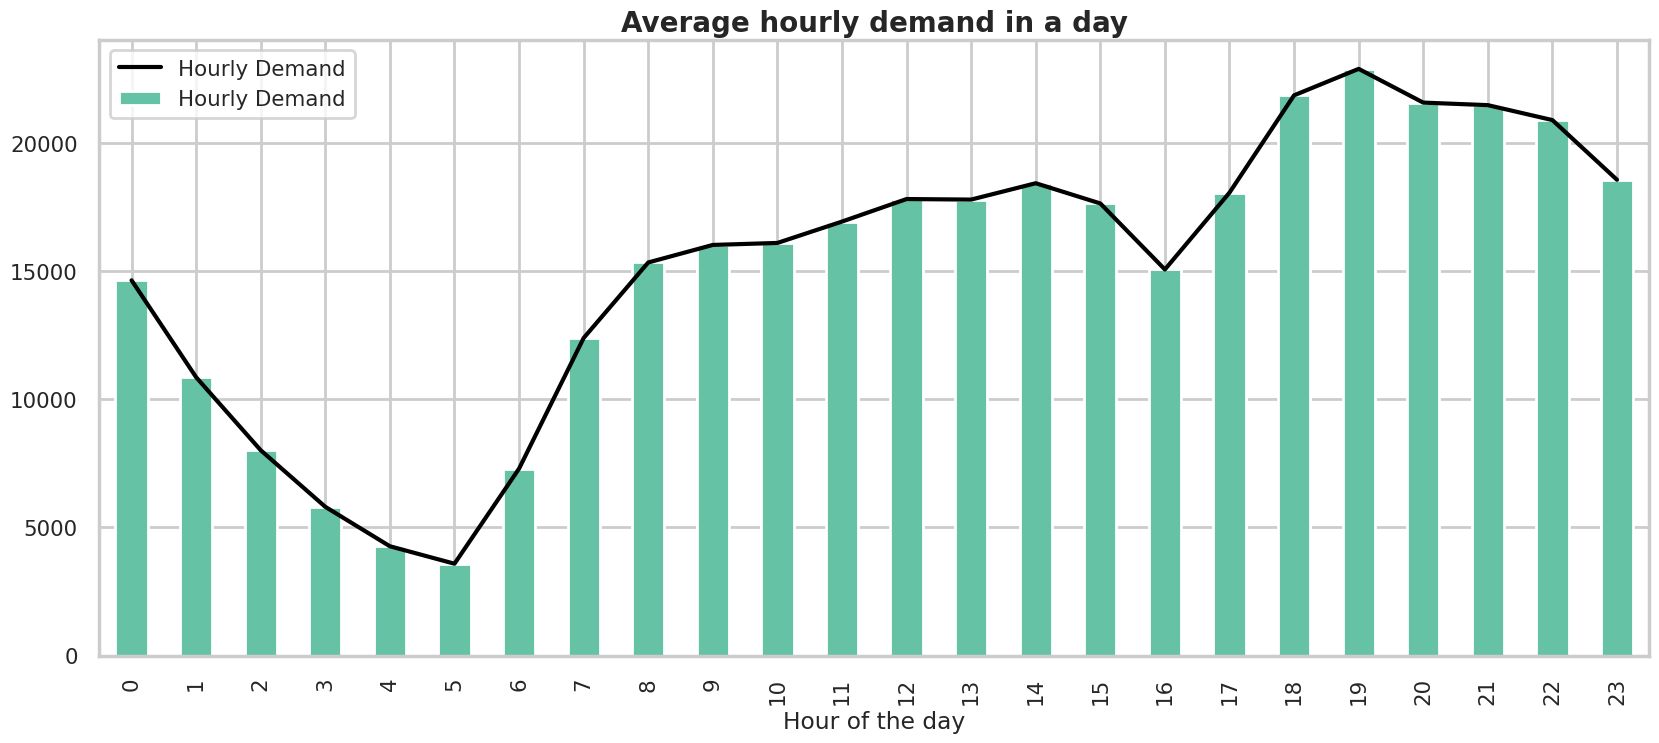

In [75]:
a = pd.pivot_table(data = df,
              index = df.index.hour,
              values = 'value',
              aggfunc='mean')

a = a.astype('int')
a = a.rename(columns={'value':'Hourly Demand'})
a = a.rename_axis('Hour of the day')



display(a.iloc[:12,:].T)
display(a.iloc[12:,:].T)


fig,ax = plt.subplots(figsize=(20,8))

g5 = a.plot(kind='line',figsize=(20,8),ax=ax,color = 'black')
g6 = a.plot(kind='bar',figsize=(20,8),ax=ax)
plt.title('Average hourly demand in a day',fontweight = 'bold',fontsize = 20)
plt.show()

- Demand Dips after midnight until 6 am. Peak Demand is at 8 pm in theeveningm

## Question 2.1

---

**The dataset used here is the New York City Taxi Demand dataset. The raw data is from the NYC Taxi and Limousine Commission. The data included here consists of aggregating the total number of taxi passengers into 30 minute buckets. In this question, we will simply process the data and explore the time series.**

- Create two new dataframes df_day and df_hour by aggregating the demand value on daily and hourly level.

- Plot the demand value in two line charts for both df_day and df_hour dataframes.

- Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day dataframe, also find out the p value from adfuller test. Do you think the df_day is stationary enough (please explain your reasons in comments and report)?

---

In [76]:
'''
Create two new dataframes df_day and df_hour by aggregating the demand value on
daily and hourly level.
'''

df_day = df.resample('D').sum() # data available is every half hour, so we sum up for a day to get daily data
df_hour = df.resample('H').sum() # data available is every half hour, so we sum up two half hour data to get hourly data

print('\n',"\033[1m" 'Number of Data points in the data frame df_day are'"\033[0m",df_day.shape[0])
print('\n','First 5 rows of the data frame df_day')
display(df_day.head(5))
print('\n','Last 5 rows of the data frame df_day')
display(df_day.tail(5))

print('\n',"\033[1m" 'Number of Data points in the data frame df_hour are'"\033[0m",df_hour.shape[0])
print('\n','First 5 rows of the data frame df_hour')
display(df_hour.head(5))
print('\n','Last 5 rows of the data frame df_hour')
display(df_hour.tail(5))



 Number of Data points in the data frame df_day are 215

 First 5 rows of the data frame df_day


value
timestamp         
2014-07-01  745967
2014-07-02  733640
2014-07-03  710142
2014-07-04  552565
2014-07-05  555470


 Last 5 rows of the data frame df_day


value
timestamp         
2015-01-27  232058
2015-01-28  621483
2015-01-29  704935
2015-01-30  800478
2015-01-31  897719


 Number of Data points in the data frame df_hour are 5160

 First 5 rows of the data frame df_hour


value
timestamp                 
2014-07-01 00:00:00  18971
2014-07-01 01:00:00  10866
2014-07-01 02:00:00   6693
2014-07-01 03:00:00   4433
2014-07-01 04:00:00   4379


 Last 5 rows of the data frame df_hour


value
timestamp                 
2015-01-31 19:00:00  56577
2015-01-31 20:00:00  48276
2015-01-31 21:00:00  48389
2015-01-31 22:00:00  53030
2015-01-31 23:00:00  52879

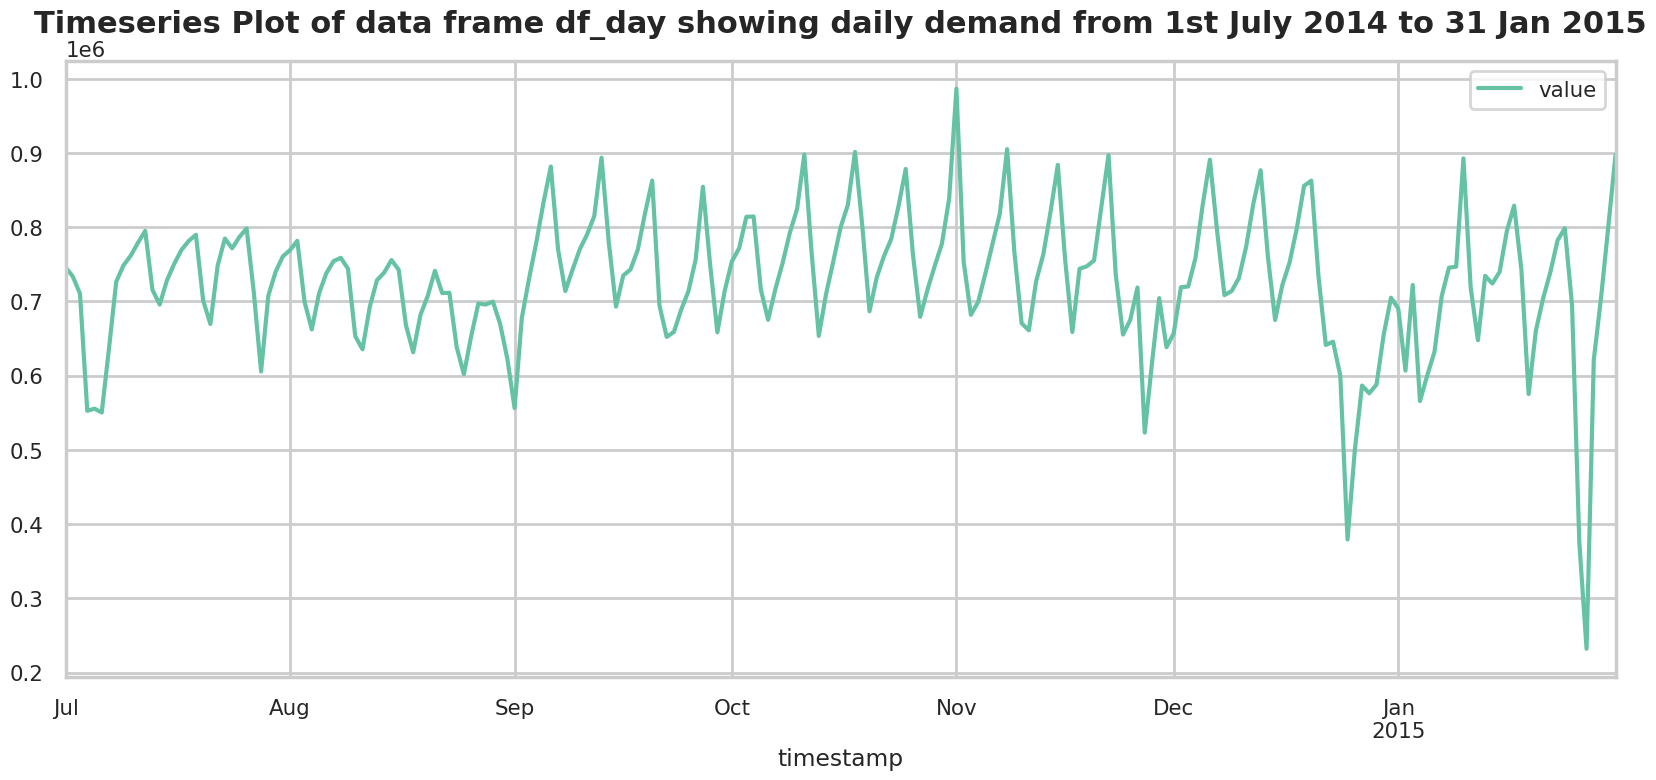

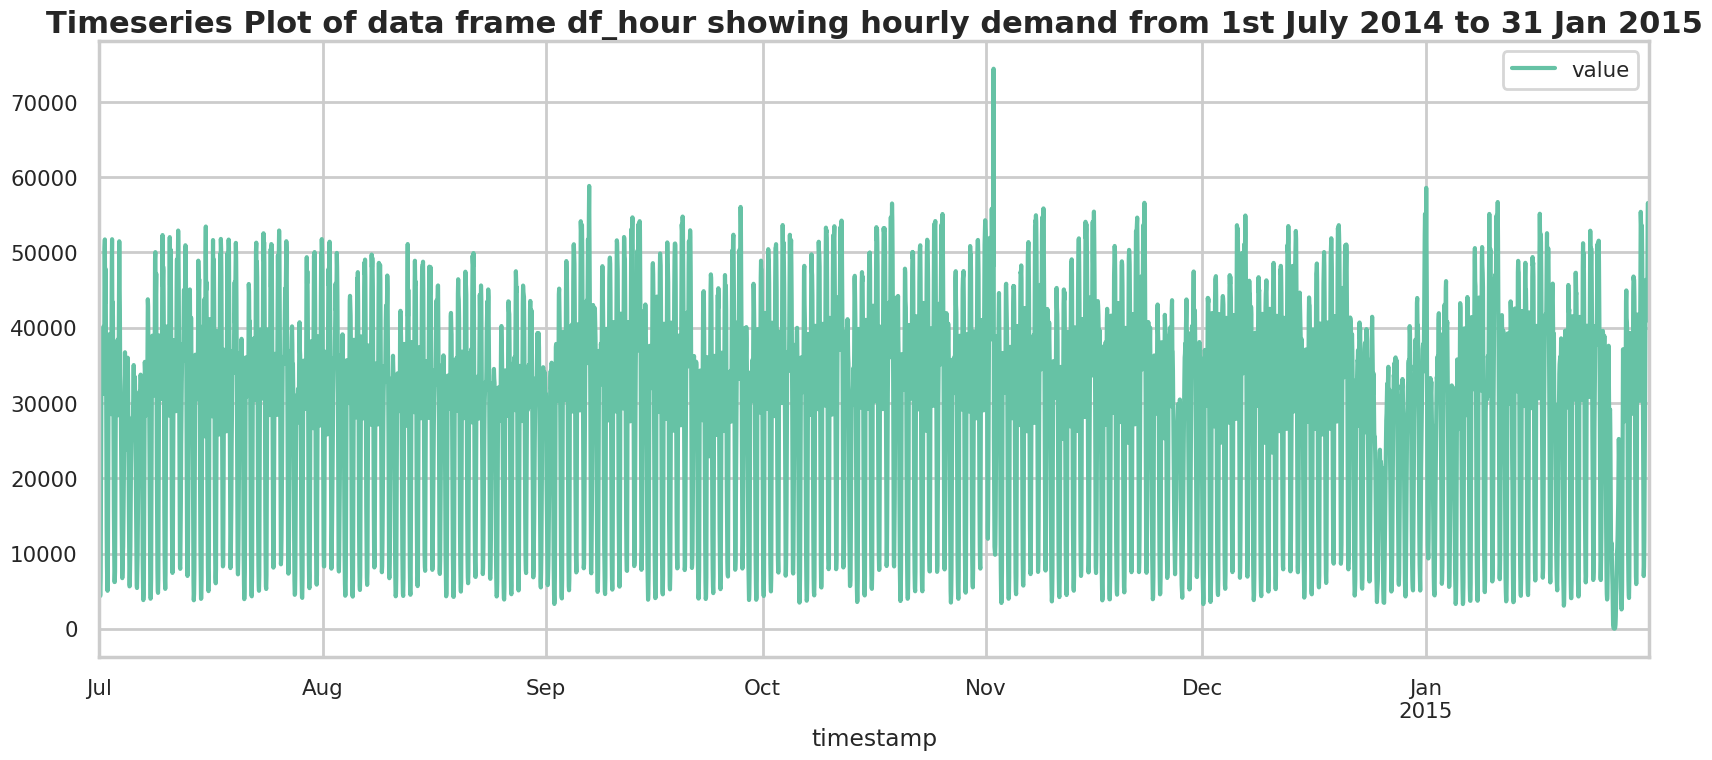

In [77]:
'''
 Plot the demand value in two line charts for both df_day and df_hour dataframes.
'''


g7 = df_day.plot(kind = 'line',                 # plot a line plot for times series 'df_day'
                 figsize=(20,8))                # define the figure size

# plot the title in bold fonts
plt.title('Timeseries Plot of data frame df_day showing daily demand from 1st July 2014 to 31 Jan 2015',
         fontweight = 'bold',
         fontsize = 22)



g8 = df_hour.plot(kind = 'line',            # plot a line plot for times series 'df_hour'
                  figsize=(20,8))            # define the figure size
plt.title('Timeseries Plot of data frame df_hour showing hourly demand from 1st July 2014 to 31 Jan 2015',
         fontweight = 'bold',
         fontsize = 22)

plt.show()


In [78]:
'''
Plot the seasonal decomposition components (Trend, Seasonal, Residual) from df_day
dataframe
'''
# import library for decomposing time series data
from statsmodels.tsa.seasonal import seasonal_decompose

# for fixing the size of the plots
from pylab import rcParams
rcParams['figure.figsize'] = 20,20


- Decompose - Additive Model

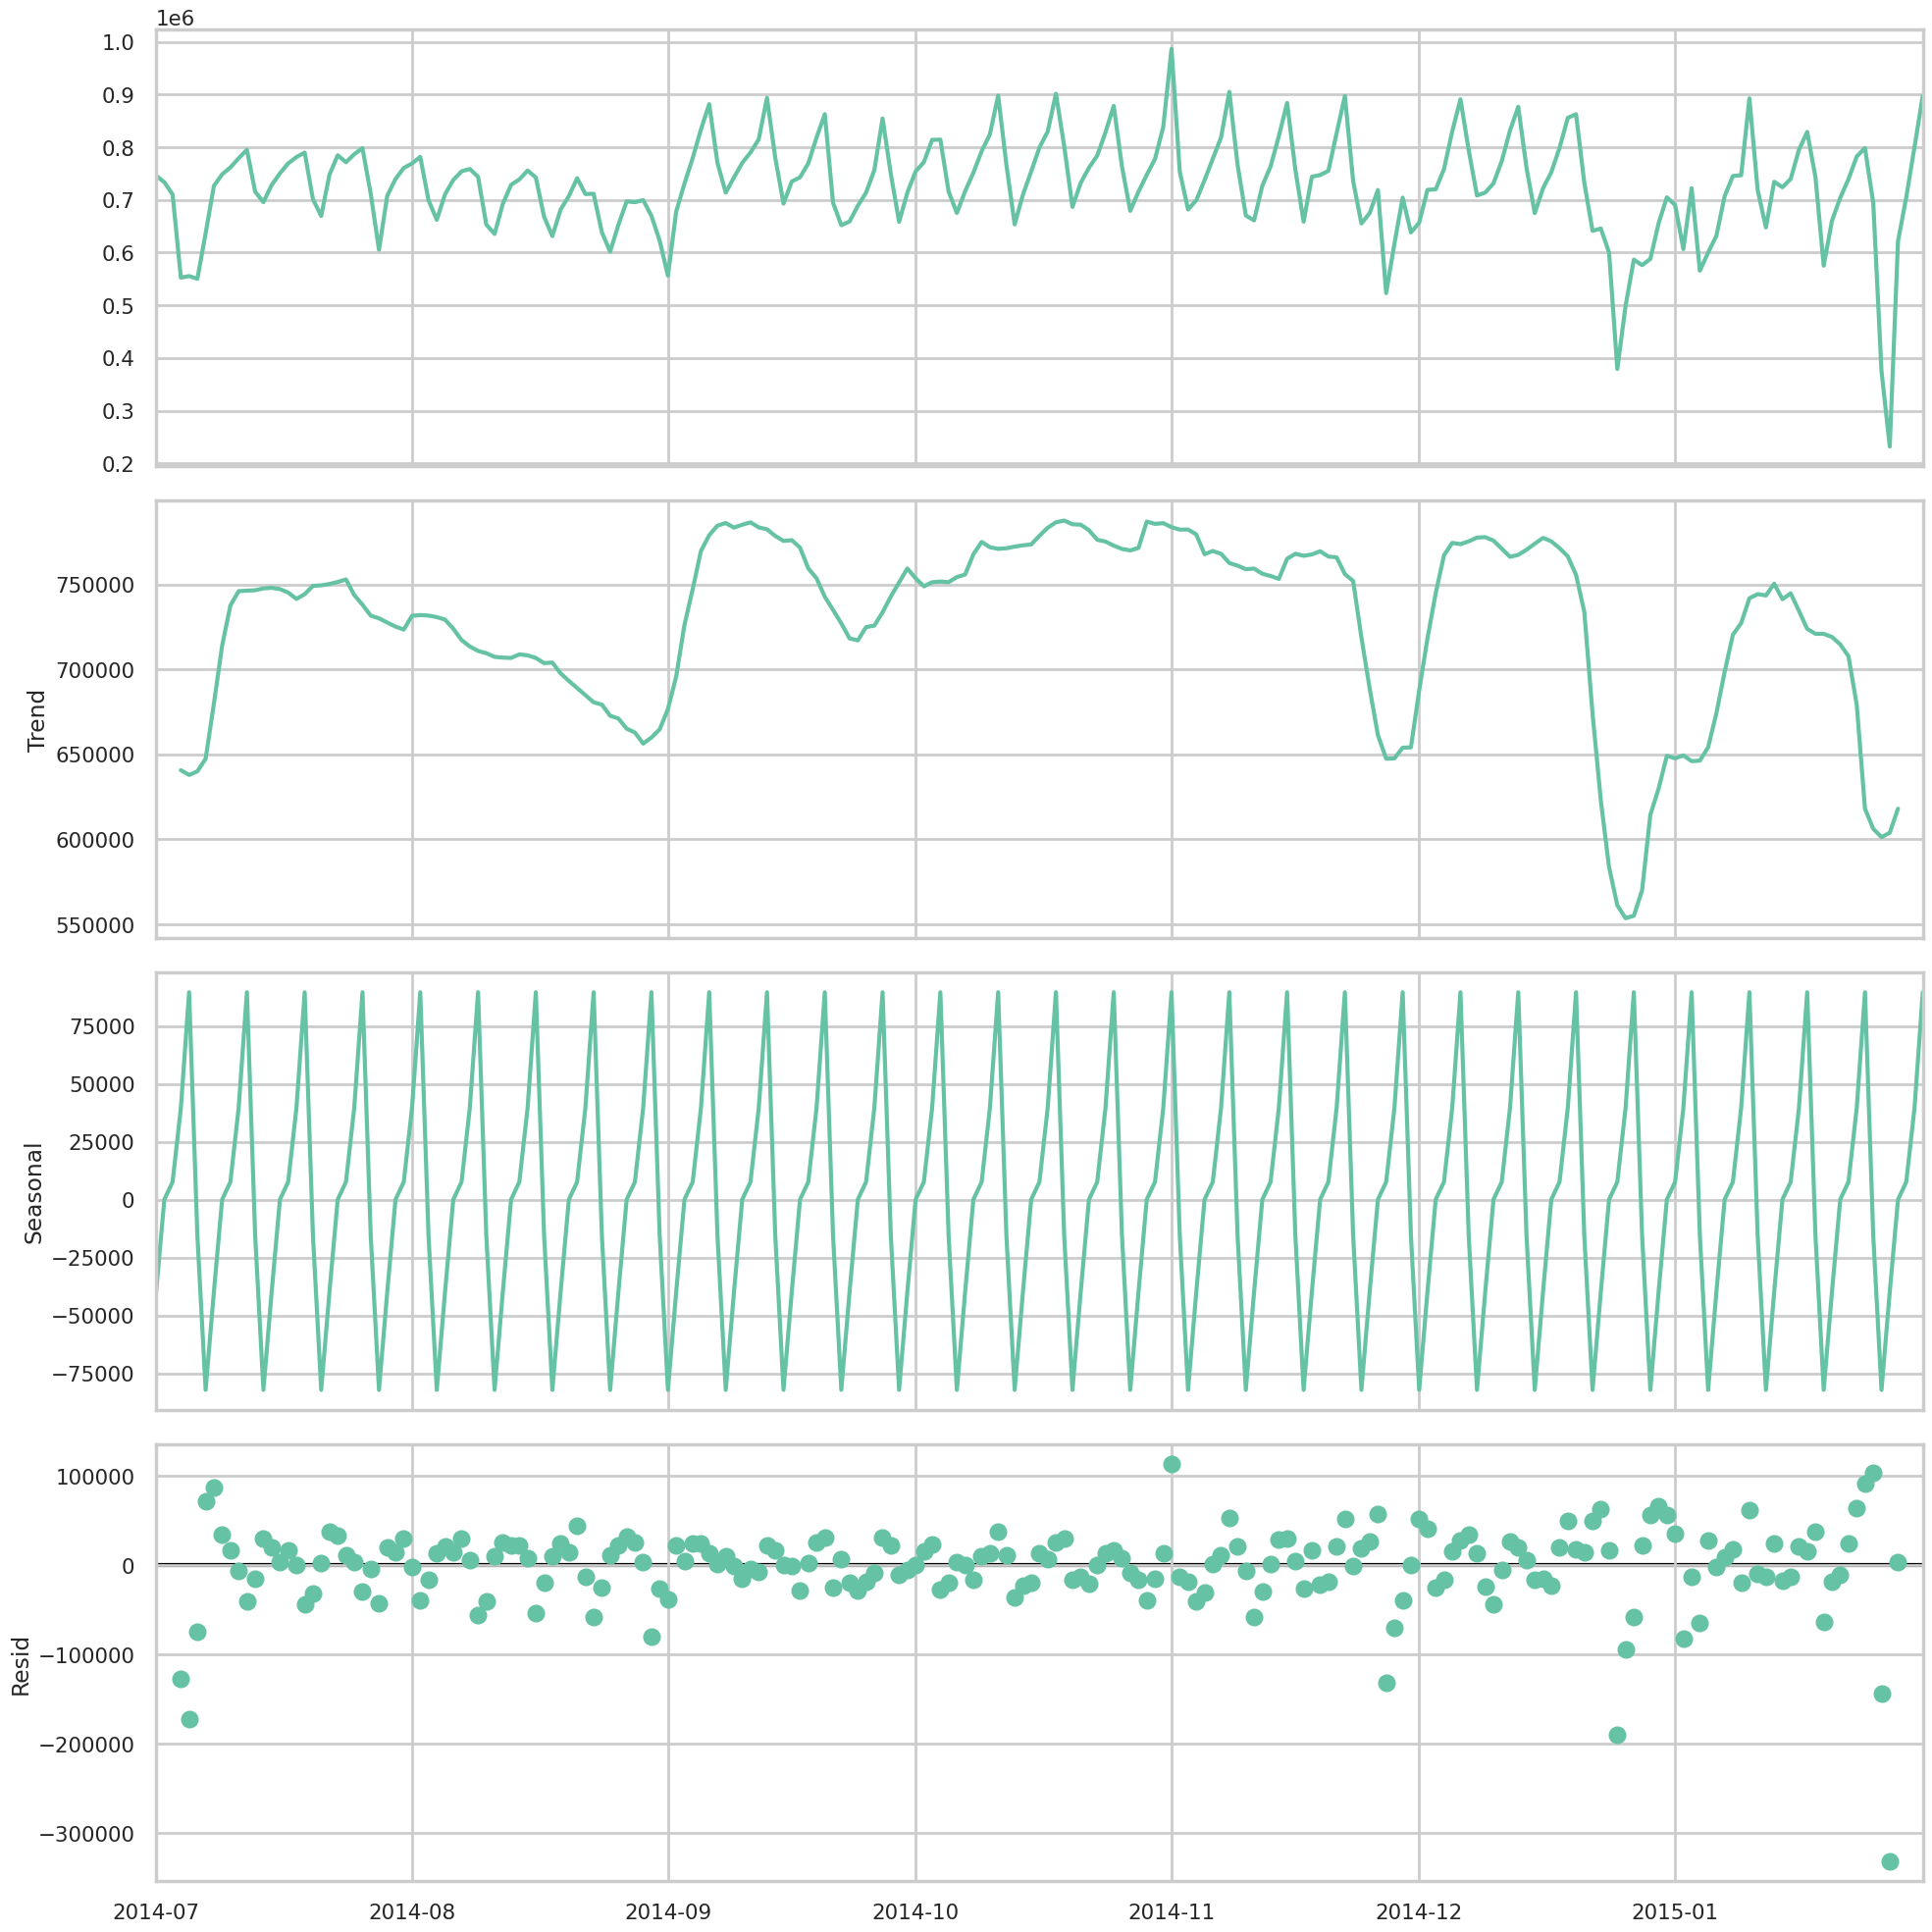

In [79]:
# Decompose df_day - Additive Model

df_day_decompose_additive       = seasonal_decompose(df_day, model = 'additive')

# Decompose df_day - Multipicative Model
df_day_decompose_multiplicative = seasonal_decompose(df_day,  model = 'multiplicative')

# plot the original and decomposition componenets of trend,seasonality and noise such that
# original = trend + seasonality + noise

df_day_decompose_additive.plot();

In [80]:
# Create a DataFrame by combining columns from different sources

add_df =  pd.DataFrame({'Trend':df_day_decompose_additive.trend,
                        'Seasonality':df_day_decompose_additive.seasonal,
                        'Noise':df_day_decompose_additive.resid,
                        'Original Value':df_day.value})

add_df = add_df.dropna(axis=0) # drop the rows which have Nan values

# create a new column summing up Trend, Seasonality and Noise obtained from decomposition of series by the additive model
add_df['T+S+N'] = add_df['Trend'] + add_df['Seasonality'] + add_df['Noise']

add_df.head()   # compare the Original value agaist the sum of T,S and N



Trend   Seasonality          Noise  Original Value  \
timestamp                                                                
2014-07-04  640662.714286  39695.499202 -127793.213488          552565   
2014-07-05  637886.714286  89656.718250 -172073.432536          555470   
2014-07-06  640019.142857 -15467.667464  -74266.475393          550285   
2014-07-07  647369.714286 -82040.638893   71240.924607          636570   
2014-07-08  679720.428571 -39751.443655   86566.015083          726535   

               T+S+N  
timestamp             
2014-07-04  552565.0  
2014-07-05  555470.0  
2014-07-06  550285.0  
2014-07-07  636570.0  
2014-07-08  726535.0

- Decompose Multiplicative Model

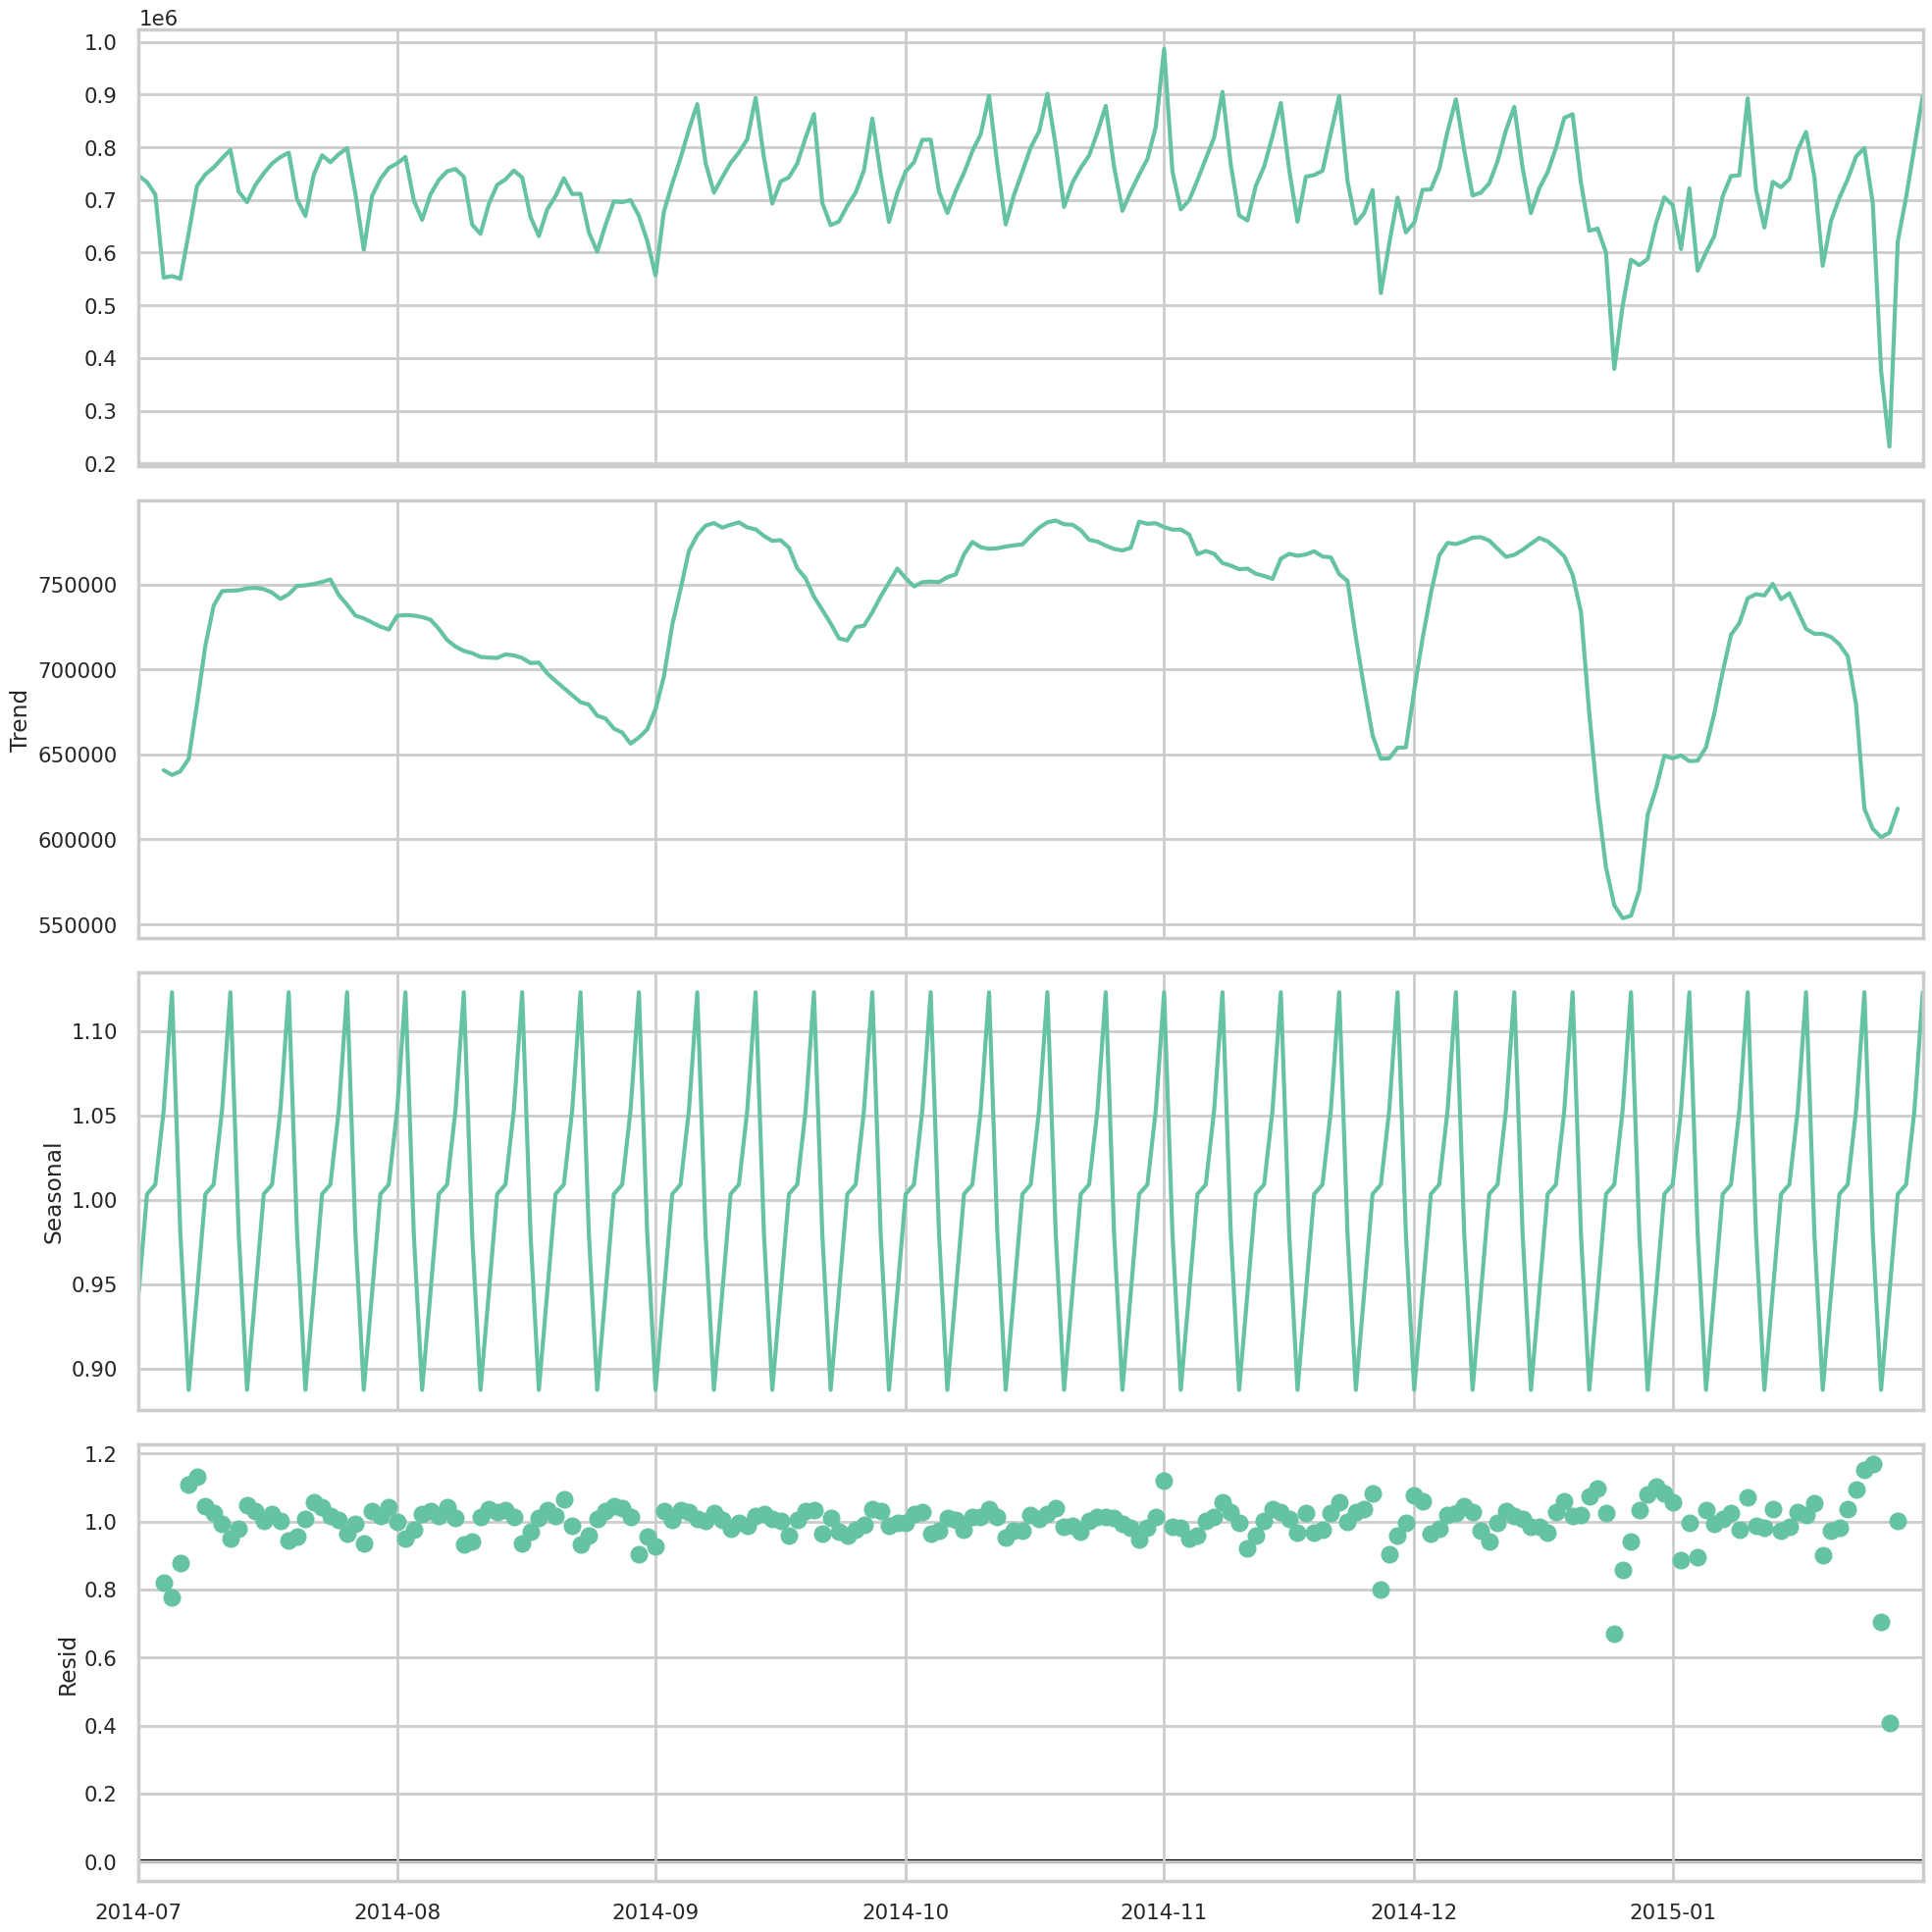

In [81]:
# plot the original and decomposition componenets of trend,seasonality and noise such that
# original = trend x seasonality x noise

df_day_decompose_multiplicative.plot();

In [82]:
mult_df =  pd.DataFrame({'Trend':df_day_decompose_multiplicative.trend,
                        'Seasonality':df_day_decompose_multiplicative.seasonal,
                        'Noise':df_day_decompose_multiplicative.resid,
                        'Original Value':df_day.value})

mult_df


mult_df = mult_df.dropna(axis=0) # drop the rows which have Nan values
mult_df

# create a new column which is the prodct of Trend, Seasonality and Noise
mult_df['T*S*N'] = mult_df['Trend'] * mult_df['Seasonality'] * mult_df['Noise']

display(mult_df.head())  # compare the Original value agaist the product of T,S and N


Trend  Seasonality     Noise  Original Value     T*S*N
timestamp                                                                 
2014-07-04  640662.714286     1.052960  0.819109          552565  552565.0
2014-07-05  637886.714286     1.122916  0.775479          555470  555470.0
2014-07-06  640019.142857     0.979643  0.877662          550285  550285.0
2014-07-07  647369.714286     0.887301  1.108212          636570  636570.0
2014-07-08  679720.428571     0.944841  1.131273          726535  726535.0

- Augmented Dickey-Fuller Unit Root Test

-----

The Augmented Dickey-Fuller test is an unit root test which determines whether there is a unit root and subsequently whether the series is non-stationary.

The hypothesis in a simple form for the ADF test is:
* $H_0$ : The Time Series has a unit root and is thus non-stationary.
* $H_1$ : The Time Series does not have a unit root and is thus stationary.

We would want the series to be stationary for building ARIMA models and thus we would want the p-value of this test to be less than the $\alpha$ value.

-----

In [83]:
'''
Find out the p value from adfuller test. Do you think the df_day is stationary
enough (please explain your reasons in comments and report)?
'''
# import required librarary to ascertain whether the time series data is stationary or not
from statsmodels.tsa.stattools import adfuller

# perform the Augmented Dickey Fuller test on the values of the data set 'df_day'
adfuller_result = adfuller(df_day.values)

display(adfuller_result)

# round of the value to 4 palces of decimals, result at Index 0 is the Test Stastistic value
print("\033[1m"'Test Statistic Value :',round(adfuller_result[0],4))

# round of the value to 4 palces of decimals, result at Index 1 is the p-value
print ('p_value:',round(adfuller_result[1],4))


(-3.448094452075355,
 0.009424599993717633,
 9,
 205,
 {'1%': -3.4626576734812318,
  '5%': -2.8757444215841326,
  '10%': -2.5743412314098753},
 4903.535489749257)

Test Statistic Value : -3.4481
p_value: 0.0094


- The null hypothesis of the Augmented Dickey-Fuller is that there is a unit root,with the alternative that there is no unit root. Since p_value is less than 0.05, we can reject the NulL Hypothesis and conclude that the series is stationary

## Question 2.2

---
**In this question, we will try to use time series model such as ARIMA and others to build the model(s) for forecasting the future.**

- Create the acf and pacf plots for df_day dataframe.

- Find the best model with different parameters on ARIMA model. The parameter range for p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean Abosulate Error from 27 choices based on the time from ”Jul-01-2014” to ”Dec-01-2014”.

- Using the best model in above steps to forecast the time from ”Jan-01-2015” to
”Jan-31-2015”. Plot the predicted value and the true demand value from "Jan-01-2015” to ”Jan-31-2015”.

- Could you think of any other model (not as same as ARIMA) could do the forecasting for demand value from ”Jan-01-2015” to ”Jan-31-2015”? You could choose one model (except ARIMA) and train the model based on the demand value from ”Jul-01-2014” to ”Dec-01-2014” (same training data as the ARIMA). Hint: there are some resources regarding other time series forecasting models such as prophet here and also the exponential smoothing here.


---


In [84]:
# import the necessary libraries
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [85]:
'''
• Create the acf and pacf plots for df_day dataframe.
'''

'\n• Create the acf and pacf plots for df_day dataframe.\n'

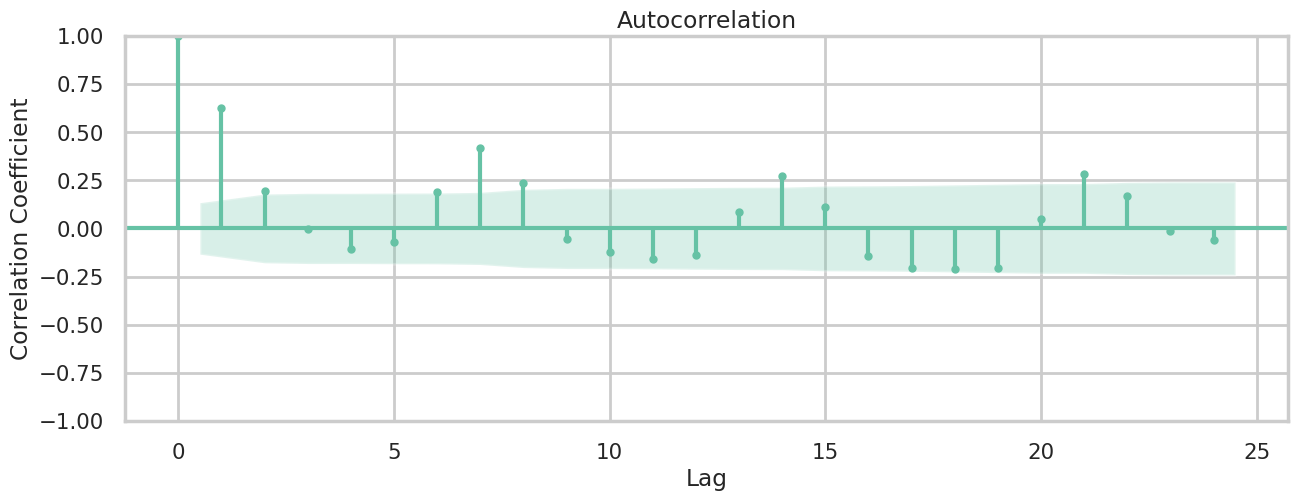

In [86]:
rcParams['figure.figsize'] = 15,5 # fix the plot size

# defines the order of q
plot_acf(df_day,
         alpha=0.05 # define the significane level - here we define it as 5 %
        );
plt.xlabel('Lag');
plt.ylabel('Correlation Coefficient');


1. The Autocorrelation plot shows the correlation a time series has with its own lagged values.

2. The first reading (lag 0) will always have a reading of 1 as any reading will correlate completely with itself.

3. In the above plot Lag 1 and Lag 2 readings are significant as they lie outside the 95 % confidence level band. The Moving Average (MA) order (q) will be 2 in this case.

4. Correlations from lag 3 onwards become insignificant. So this implies that to make predictions fot the future, only the present day and immediate past 2 days readings will have a bearing on the forecast for the future.

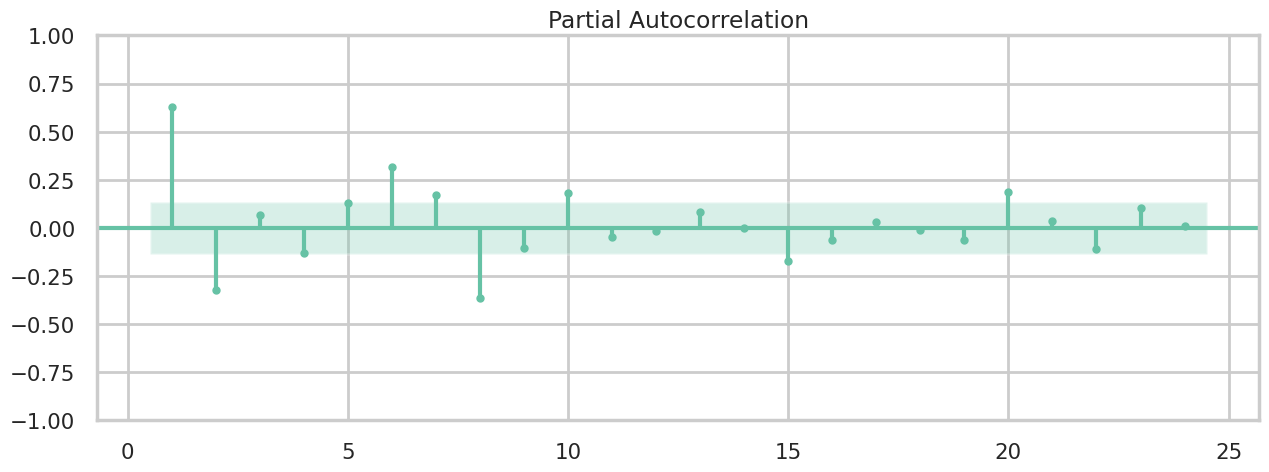

In [87]:
plot_pacf(df_day,zero=False,alpha=0.05,method='ywmle');  # defines the order of p

1. PACF plot displays the correlation at different lags to define the order(p) of the Auto Regression (AR) term without the influence of any intermediary terms.

2. It indicates the presence of a reading in the past on which the series auto regresses.The intermediary readings have no bearing on the current readings

3. In the above plot the cut off is reached after two lags. So the reading for p (order for AR) will be 2

In [88]:
'''
Find the best model with different parameters on ARIMA model. The parameter range for
p,d,q are all from [0, 1, 2]. In total, you need to find out the best model with lowest Mean
Abosulate Error from 27 choices based on the time from ”Jul-01-2014” to ”Dec-01-2014”.
'''
# import libarary for creating all possible combinations amongst a list of numbers.
import itertools
p = d = q = range(0, 3)   # p,d and q can take any value from 0,1 and 2

pdq = list(itertools.product(p, d, q))  # find all possible combinations of p,d and q
for i in range(0,len(pdq)):
    print('Model: {}'.format(pdq[i]))


print("\n")
print('The number of combinations of p,d,and q are :',len(pdq))

Model: (0, 0, 0)
Model: (0, 0, 1)
Model: (0, 0, 2)
Model: (0, 1, 0)
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (0, 2, 0)
Model: (0, 2, 1)
Model: (0, 2, 2)
Model: (1, 0, 0)
Model: (1, 0, 1)
Model: (1, 0, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (1, 2, 0)
Model: (1, 2, 1)
Model: (1, 2, 2)
Model: (2, 0, 0)
Model: (2, 0, 1)
Model: (2, 0, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)
Model: (2, 2, 0)
Model: (2, 2, 1)
Model: (2, 2, 2)


The number of combinations of p,d,and q are : 27


In [89]:
# Split the data into train and test data sets. Train Data starts from Jul-01-2014  to Dec-01-2014.

start_date = '2014-07-01'
end_date ='2014-12-01'
start_date = pd.to_datetime(start_date)  # convert the start date to date time format
end_date = pd.to_datetime(end_date)      # convert the end date to date time format

# slice the data frame . All observations on or before 1st Dec 2014 are designated as train data set

train_df_day = df_day[(df_day.index <= end_date)]
train_df_day

value
timestamp         
2014-07-01  745967
2014-07-02  733640
2014-07-03  710142
2014-07-04  552565
2014-07-05  555470
...            ...
2014-11-27  523184
2014-11-28  616841
2014-11-29  704360
2014-11-30  638317
2014-12-01  656814

[154 rows x 1 columns]

In [90]:
# slice the data frame . All observations after 1st Dec 2014 are designated as train data set

test_df_day = df_day[(df_day.index > end_date)]
test_df_day

value
timestamp         
2014-12-02  719097
2014-12-03  720080
2014-12-04  758203
2014-12-05  829996
2014-12-06  890958
...            ...
2015-01-27  232058
2015-01-28  621483
2015-01-29  704935
2015-01-30  800478
2015-01-31  897719

[61 rows x 1 columns]

In [91]:
# import the libraries

from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_percentage_error,mean_squared_error  # performance metric libraries

In [92]:
# create an empty data frame to store the results of the order and MAPE
ARIMA_MAPE = pd.DataFrame(columns=['param','MAPE'])
ARIMA_MAPE


Empty DataFrame
Columns: [param, MAPE]
Index: []

In [93]:
'''
run the ARIMA for all the 27 combinations of p,d and q created earlier. Calculate Mean Absolute Percentage Error for
each combination and store the results in the empty dataframe created above
'''

for param in pdq:  # pdq is a list with 27 combinations of 0,1 and 2. This code will fit all the combinations in for loop
    # fit the ARIMA model on the train data set
    ARIMA_model = ARIMA(train_df_day.values,
                        order=param).fit() # each combination of 0,1 and 2 will be fitted

    # make the predictions for the period where actual value is known - which is the test data period
    y_predicted = ARIMA_model.forecast(steps=len(test_df_day))

    # actual value as avaiilable in the test data set
    y_true = test_df_day.values

    # calculate the Mean Absolute Percentage Error
    MAPE = round(mean_absolute_percentage_error(y_true, y_predicted)*100,4)

    # Append the result to ARIMA_MAPE data frame created earlier
    ARIMA_MAPE = ARIMA_MAPE.append({'param':param,'MAPE':MAPE},ignore_index=True)

ARIMA_MAPE.sort_values(by='MAPE',inplace=True)  # sort the values of MAPE so that the lowest value is on top.
display(ARIMA_MAPE.reset_index())

best_param = ARIMA_MAPE.iloc[0]['param']  # the best combination with lowest Mape value will be the one having index 0
print('\n',"\033[1m" 'The (p,d,q) combination which provides the lowest MAPE figure is:',best_param)


index      param     MAPE
0      18  (2, 0, 0)  16.5584
1      14  (1, 1, 2)  16.5845
2      19  (2, 0, 1)  16.5864
3       2  (0, 0, 2)  16.5970
4      10  (1, 0, 1)  16.5994
5       1  (0, 0, 1)  16.6045
6       0  (0, 0, 0)  16.6221
7      11  (1, 0, 2)  16.6918
8       9  (1, 0, 0)  16.7092
9      20  (2, 0, 2)  16.7972
10     21  (2, 1, 0)  16.8062
11     22  (2, 1, 1)  16.8817
12      5  (0, 1, 2)  16.9742
13     13  (1, 1, 1)  17.0188
14     25  (2, 2, 1)  17.0383
15      4  (0, 1, 1)  17.0847
16     12  (1, 1, 0)  17.1110
17      3  (0, 1, 0)  17.1382
18      7  (0, 2, 1)  17.2110
19     23  (2, 1, 2)  18.2029
20     16  (1, 2, 1)  19.3619
21      8  (0, 2, 2)  22.3498
22     17  (1, 2, 2)  22.9302
23     15  (1, 2, 0)  30.6080
24     24  (2, 2, 0)  67.0222
25      6  (0, 2, 0)  89.3169
26     26  (2, 2, 2)  98.4495


 The (p,d,q) combination which provides the lowest MAPE figure is: (2, 0, 0)


In [94]:
'''
Using the best model in above steps to forecast the time from ”Jan-01-2015” to
”Jan-31-2015”. Plot the predicted value and the true demand value from ”Jan-01-2015” to
”Jan-31-2015”.
'''
forecast_start_date = '2015-01-01' # date is given in the question asked

forecast_start_date = pd.to_datetime(forecast_start_date) # convert the start date date time format


train_df_day = df_day[(df_day.index < forecast_start_date)] # slice the data set .Before 1st Jan 2015 is train data set.
print('\n',"\033[1m" 'Train Data Set, First and last three observations')
display(train_df_day.head(3))
display(train_df_day.tail(3))
print("\033[1m" 'Number of Observations in Train Data Set are :',train_df_day.shape[0])

test_df_day = df_day[(df_day.index>=forecast_start_date)] # observations on and after 1st Jan 2015 test data set
print("\n")
print('\n','Test Data Set, First and last three observations')
display(test_df_day.head(3))
display(test_df_day.tail(3))
print("\033[1m" 'Number of Observations in Test Data Set are :',test_df_day.shape[0])



 Train Data Set, First and last three observations


value
timestamp         
2014-07-01  745967
2014-07-02  733640
2014-07-03  710142

value
timestamp         
2014-12-29  588023
2014-12-30  655665
2014-12-31  704941

Number of Observations in Train Data Set are : 184



 Test Data Set, First and last three observations


value
timestamp         
2015-01-01  690407
2015-01-02  606716
2015-01-03  722115

value
timestamp         
2015-01-29  704935
2015-01-30  800478
2015-01-31  897719

Number of Observations in Test Data Set are : 31


- Arima Model

In [95]:
# fit the Arima model on the train data set
ARIMA_model = ARIMA(train_df_day, order=best_param).fit() # fit the Arima model on the train data set

# make predictions for the period of the test data set
y_predicted = ARIMA_model.forecast(steps=len(test_df_day))

# make a combined data frame with actual value and the predicted value (in whole number)
predictions_df = pd.concat([test_df_day,y_predicted.astype('int')],axis=1)

# rename the columns
predictions_df = predictions_df.rename(columns={'value':'Actual Demand',
                                                'predicted_mean':'Predictions-ARIMA Model'})
display(predictions_df)

Actual Demand  Predictions-ARIMA Model
2015-01-01         690407                   733675
2015-01-02         606716                   742578
2015-01-03         722115                   740928
2015-01-04         565709                   736575
2015-01-05         600132                   733322
2015-01-06         631877                   731914
2015-01-07         707015                   731752
2015-01-08         745416                   732072
2015-01-09         746839                   732403
2015-01-10         892664                   732588
2015-01-11         718725                   732639
2015-01-12         647742                   732624
2015-01-13         734397                   732594
2015-01-14         724099                   732573
2015-01-15         739819                   732564
2015-01-16         795094                   732564
2015-01-17         828957                   732566
2015-01-18         743123                   732568
2015-01-19         575177                   732569
2015-01-20         660452                   732570
2015-01-21         703946                   732570
2015-01-22         739376                   732569
2015-01-23         782348                   732569
2015-01-24         798498                   732569
2015-01-25         694262                   732569
2015-01-26         375311                   732569
2015-01-27         232058                   732569
2015-01-28         621483                   732569
2015-01-29         704935                   732569
2015-01-30         800478                   732569
2015-01-31         897719                   732569

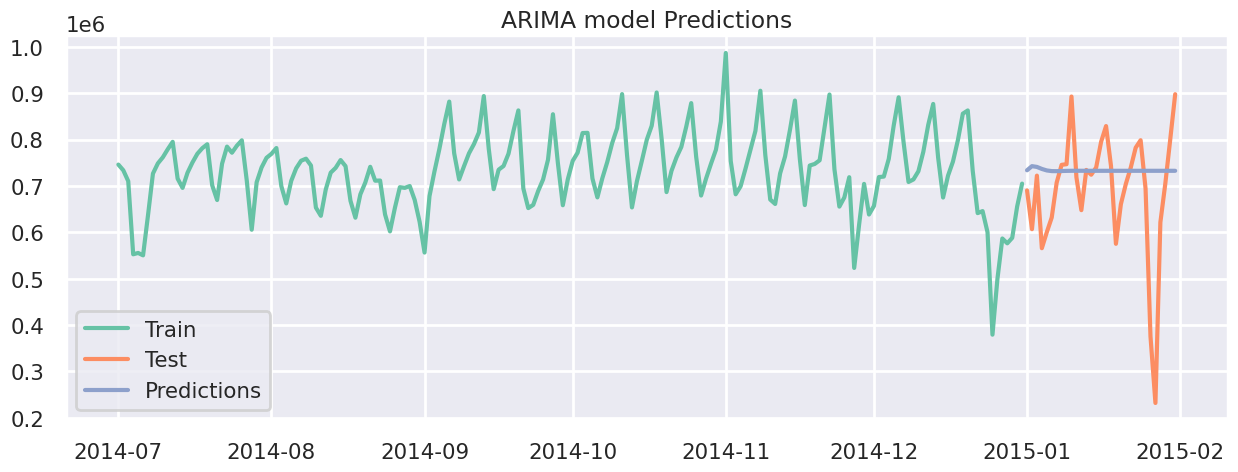

In [96]:
sns.set_theme('poster',font_scale=.7,palette='Set2')
plt.plot(train_df_day,label='Train');  # plot the train data
plt.plot(test_df_day,label='Test');    # plot the test data
plt.title('ARIMA model Predictions');
plt.plot(y_predicted,label = 'Predictions'); # plot the predictions
plt.legend(loc='best');


In [97]:
# code to return only the values in the time series
y_true = test_df_day.values

# calculate the Root Mean Square Error
RMSE = np.sqrt(mean_squared_error(y_true,y_predicted)).astype('int')

# calculate the Mean Absolute Percenatge Error
MAPE = round(mean_absolute_percentage_error(y_true,y_predicted)*100,2)

# create a dataframe to store the results of the model with performance metrics of RMSE and MAPE
result = pd.DataFrame({'RMSE':RMSE,
                             'MAPE':MAPE},
                           index = ['Arima Model'])
result

RMSE  MAPE
Arima Model  137647  18.9

- Holt Winters Exponential Smoothening, Trend: Additive, Seasonal: Multiplicative

In [98]:
# import the libraries
from statsmodels.tsa.api import ExponentialSmoothing

In [99]:
# Initializing the Triple Exponential (level , trend, seasonal) Smoothing Model on the train data set

exp_TES_mul = ExponentialSmoothing(train_df_day,
                                   seasonal='mul',    # seasonal order is assumed as multiplicative
                                   trend= 'add',
                                   initialization_method='estimated')
# fit the model on the model
model_fit_mul = exp_TES_mul.fit()

# make the predictions
y_predicted = model_fit_mul.forecast(steps=len(test_df_day))

print("\033[1m" 'Holt Winters Exponential Smoothening, Trend: Additive, Seasonal: Multiplicative, Estimated Parameters')
display(model_fit_mul.params)


Holt Winters Exponential Smoothening, Trend: Additive, Seasonal: Multiplicative, Estimated Parameters


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.7121428571428572,
 'smoothing_trend': 0.02967261904761905,
 'smoothing_seasonal': 0.2878571428571428,
 'damping_trend': nan,
 'initial_level': 608718.6285714282,
 'initial_trend': 15432.942857142894,
 'initial_seasons': array([1.01144179, 1.03785507, 1.04386587, 1.02236436, 1.02820033,
        0.93953127, 0.91674131]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

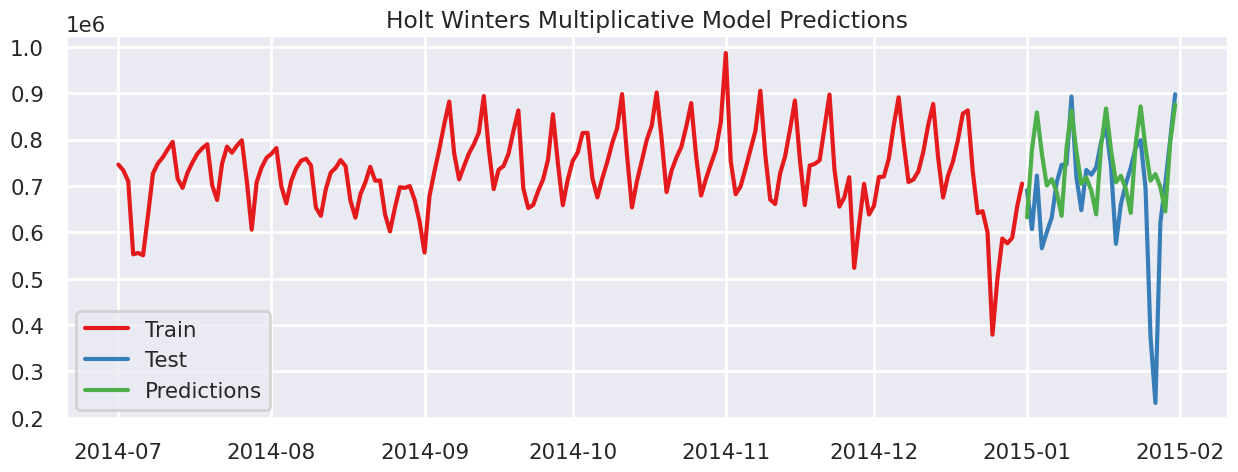

In [100]:
# make a combined data frame with actual value and the predicted value (in whole number)
predictions_df= pd.concat([predictions_df,y_predicted.astype('int')]
                         ,axis=1).rename(columns={0:'Predictions-Holt Winters Multiplicative Model'})
predictions_df

sns.set_theme('poster',font_scale=.7,palette='Set1')
plt.plot(train_df_day,label='Train');
plt.plot(test_df_day,label='Test');
plt.title('Holt Winters Multiplicative Model Predictions');
plt.plot(y_predicted,label = 'Predictions');
plt.legend(loc='best');

In [101]:
RMSE_exp_m = np.sqrt(mean_squared_error(y_true,y_predicted)).astype('int')
MAPE_exp_m = round(mean_absolute_percentage_error(y_true,y_predicted)*100,2)

result.loc["Holt Winters Multiplicative Model"] = [RMSE_exp_m, MAPE_exp_m]
result


RMSE   MAPE
Arima Model                        137647.0  18.90
Holt Winters Multiplicative Model  133899.0  19.05

- Holt Winters Exponential Smoothening, Trend: Additive, Seasonal: Additive

In [102]:
exp_TES_add = ExponentialSmoothing(train_df_day,
                               seasonal='add',
                               trend= 'add',
                               initialization_method='estimated')



model_fit_add = exp_TES_add.fit()


y_predicted = model_fit_add.forecast(steps=len(test_df_day))




print("\033[1m" '==Holt Winters Exponential Smoothening, Trend: Additive, Seasonal: Additive, Estimated Parameters ==')
model_fit_add.params

==Holt Winters Exponential Smoothening, Trend: Additive, Seasonal: Additive, Estimated Parameters ==


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


{'smoothing_level': 0.7121428571428572,
 'smoothing_trend': 0.02967261904761905,
 'smoothing_seasonal': 0.2878571428571428,
 'damping_trend': nan,
 'initial_level': 608718.6285714282,
 'initial_trend': 15432.942857142894,
 'initial_seasons': array([  6158.59285714,  26300.45      ,  30857.41428571,  17944.83571429,
         22896.45      , -42255.12142857, -61902.62142857]),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [103]:
# make a combined data frame with actual value and the predicted value (in whole number)
predictions_df= pd.concat([predictions_df,y_predicted.astype('int')]
                         ,axis=1).rename(columns={0:'Predictions-Holt Winters Additive Model'})
predictions_df

Actual Demand  Predictions-ARIMA Model  \
2015-01-01         690407                   733675   
2015-01-02         606716                   742578   
2015-01-03         722115                   740928   
2015-01-04         565709                   736575   
2015-01-05         600132                   733322   
2015-01-06         631877                   731914   
2015-01-07         707015                   731752   
2015-01-08         745416                   732072   
2015-01-09         746839                   732403   
2015-01-10         892664                   732588   
2015-01-11         718725                   732639   
2015-01-12         647742                   732624   
2015-01-13         734397                   732594   
2015-01-14         724099                   732573   
2015-01-15         739819                   732564   
2015-01-16         795094                   732564   
2015-01-17         828957                   732566   
2015-01-18         743123                   732568   
2015-01-19         575177                   732569   
2015-01-20         660452                   732570   
2015-01-21         703946                   732570   
2015-01-22         739376                   732569   
2015-01-23         782348                   732569   
2015-01-24         798498                   732569   
2015-01-25         694262                   732569   
2015-01-26         375311                   732569   
2015-01-27         232058                   732569   
2015-01-28         621483                   732569   
2015-01-29         704935                   732569   
2015-01-30         800478                   732569   
2015-01-31         897719                   732569   

            Predictions-Holt Winters Multiplicative Model  \
2015-01-01                                         632272   
2015-01-02                                         778798   
2015-01-03                                         858320   
2015-01-04                                         770119   
2015-01-05                                         700846   
2015-01-06                                         714619   
2015-01-07                                         687090   
2015-01-08                                         635454   
2015-01-09                                         782715   
2015-01-10                                         862633   
2015-01-11                                         773987   
2015-01-12                                         704363   
2015-01-13                                         718203   
2015-01-14                                         690533   
2015-01-15                                         638636   
2015-01-16                                         786631   
2015-01-17                                         866947   
2015-01-18                                         777854   
2015-01-19                                         707880   
2015-01-20                                         721786   
2015-01-21                                         693976   
2015-01-22                                         641818   
2015-01-23                                         790548   
2015-01-24                                         871261   
2015-01-25                                         781722   
2015-01-26                                         711397   
2015-01-27                                         725370   
2015-01-28                                         697419   
2015-01-29                                         645000   
2015-01-30                                         794465   
2015-01-31                                         875574   

            Predictions-Holt Winters Additive Model  
2015-01-01                                   642654  
2015-01-02                                   772968  
2015-01-03                                   843652  
2015-01-04                                   768248  
2015-01-05                                   699867  
2015-0

In [104]:
RMSE_exp_a = np.sqrt(mean_squared_error(y_true,y_predicted)).astype('int')
MAPE_exp_a = round(mean_absolute_percentage_error(y_true,y_predicted)*100,2)

result.loc['Holt Winters Additive Model'] = [RMSE_exp_a, MAPE_exp_a]
result

RMSE   MAPE
Arima Model                        137647.0  18.90
Holt Winters Multiplicative Model  133899.0  19.05
Holt Winters Additive Model        131632.0  18.60

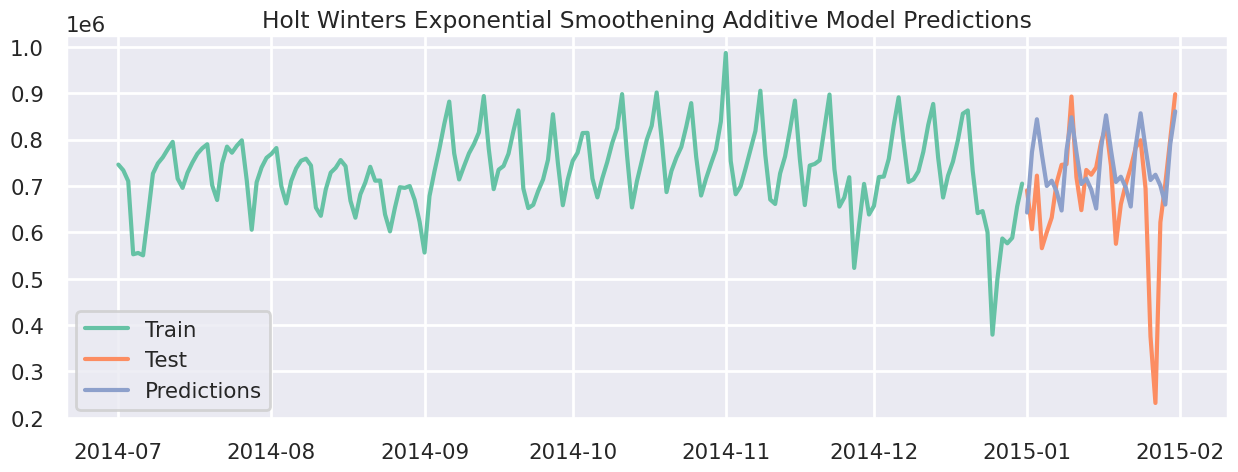

In [105]:
sns.set_theme('poster',font_scale=.7,palette='Set2')
plt.plot(train_df_day,label='Train');
plt.plot(test_df_day,label='Test');
plt.title('Holt Winters Exponential Smoothening Additive Model Predictions');
plt.plot(y_predicted,label = 'Predictions');
plt.legend(loc='best');

## Question 2.3

---

**In this question, we will detect the anomaly within the df_day dataframe.***

- Create the Weekday column according to the timestamp column in df_day dataframe. The value in Weekday column should be from [’Monday’, ’Tuesday’, ’Wednesday’,’Thursday’,’Friday’, ’Saturday’, ’Sunday’].

- Also create the Hour, Day, Month, Year, Month_day (numeric format on day of the month), Lag (yesterday’s demand value ), and Rolling_Mean (rolling 7 days mean demand value, minimized period is 1) 7 new columns in df_day dataframe according to the timestamp column.

- Using Isolation Forest with above crafted features in df_day to find out the date which is identified as ’outlier’.


---

### Answer 2.3



In [106]:
df_day_copy = df_day.copy()  # make a copy

In [107]:
'''
introduce a new column in the data frame df_day by the name 'weekday' which will display numeric week days,
'0' being Monday and '6' being Sunday
'''
df_day['weekday'] = df_day.index.weekday
display(df_day.weekday.value_counts().to_frame().sort_index())
weekday_mapping = {0: 'Monday',
                   1: 'Tuesday',
                   2: 'Wednesday',
                   3: 'Thursday',
                   4: 'Friday',
                   5: 'Saturday',
                   6: 'Sunday'}

# replace numbers by weekday names as mapped above
df_day['weekday'] = df_day['weekday'].replace(weekday_mapping)

display(df_day)


weekday
0       30
1       31
2       31
3       31
4       31
5       31
6       30

value    weekday
timestamp                    
2014-07-01  745967    Tuesday
2014-07-02  733640  Wednesday
2014-07-03  710142   Thursday
2014-07-04  552565     Friday
2014-07-05  555470   Saturday
...            ...        ...
2015-01-27  232058    Tuesday
2015-01-28  621483  Wednesday
2015-01-29  704935   Thursday
2015-01-30  800478     Friday
2015-01-31  897719   Saturday

[215 rows x 2 columns]

In [108]:
custom_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

a=df_day['weekday'].value_counts().reindex(custom_order).to_frame()
a


weekday
Monday          30
Tuesday         31
Wednesday       31
Thursday        31
Friday          31
Saturday        31
Sunday          30

In [109]:
'''
Also create the Hour, Day, Month, Year, Month_day (numeric format on day of the month),
Lag (yesterday’s demand value ), and Rolling_Mean (rolling 7 days mean demand value, minimized period is 1)
7 new columns in df_day dataframe according to the timestamp column.
'''
Month_mapping = {1:'January',
                 2:'February',
                 3:'March',
                 4:'April',
                 5:'May',
                 6:'June',
                 7:'July',
                 8:'August',
                 9:'September',
                10:'October',
                11:'November',
                12:'December'}


df_day['Hour']          = df_day.index.hour  # introduce column 'hour', this column will always display the hr on top - '0'
df_day['Day']           = df_day.index.day   # introduce column 'day' showing calendar dates
df_day['Month']         = df_day.index.month # introduce column 'month', which will show numeric months.1==Jan and 12==Dec
df_day['Month_Name']    = df_day['Month'].replace(Month_mapping)          # replace month numbers with month names
df_day['Year']          = df_day.index.year                               # introduce column "Year"
df_day['Lag']           = df_day['value'].shift(1)         # introduce column 'Lag' which shows the value of one day before
df_day['Rolling_Mean']  = df_day['value'].rolling(7).mean().round(2)           # introduce column 'Rolling Mean' of 7 days.

# run a check if the numeric months have been correctly replaced by month names,by counting the number of days in a month
display(pd.pivot_table(data = df_day,
                       index = ['Year','Month_Name'],
                       values= 'Day',
                       aggfunc='count',
                       sort=False)) # this will ensure that the month names come in their natural order.

display(df_day)

Day
Year Month_Name     
2014 July         31
     August       31
     September    30
     October      31
     November     30
     December     31
2015 January      31

value    weekday  Hour  Day  Month Month_Name  Year       Lag  \
timestamp                                                                    
2014-07-01  745967    Tuesday     0    1      7       July  2014       NaN   
2014-07-02  733640  Wednesday     0    2      7       July  2014  745967.0   
2014-07-03  710142   Thursday     0    3      7       July  2014  733640.0   
2014-07-04  552565     Friday     0    4      7       July  2014  710142.0   
2014-07-05  555470   Saturday     0    5      7       July  2014  552565.0   
...            ...        ...   ...  ...    ...        ...   ...       ...   
2015-01-27  232058    Tuesday     0   27      1    January  2015  375311.0   
2015-01-28  621483  Wednesday     0   28      1    January  2015  232058.0   
2015-01-29  704935   Thursday     0   29      1    January  2015  621483.0   
2015-01-30  800478     Friday     0   30      1    January  2015  704935.0   
2015-01-31  897719   Saturday     0   31      1    January  2015  800478.0   

            Rolling_Mean  
timestamp                 
2014-07-01           NaN  
2014-07-02           NaN  
2014-07-03           NaN  
2014-07-04           NaN  
2014-07-05           NaN  
...                  ...  
2015-01-27     617971.29  
2015-01-28     606190.86  
2015-01-29     601270.71  
2015-01-30     603860.71  
2015-01-31     618035.14  

[215 rows x 9 columns]

In [110]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 215 entries, 2014-07-01 to 2015-01-31
Freq: D
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   value         215 non-null    int64  
 1   weekday       215 non-null    object 
 2   Hour          215 non-null    int64  
 3   Day           215 non-null    int64  
 4   Month         215 non-null    int64  
 5   Month_Name    215 non-null    object 
 6   Year          215 non-null    int64  
 7   Lag           214 non-null    float64
 8   Rolling_Mean  209 non-null    float64
dtypes: float64(2), int64(5), object(2)
memory usage: 16.8+ KB


- Only numeric features will be selected. Top 6 rows which have Nan Values in Rollong Mean / Lag will be dropped



In [111]:
df_day_outlier_test = df_day.select_dtypes(include='number').dropna(axis=0)

In [112]:
'''
Using Isolation Forest with above crafted features in df_day to find out the date which is
identified as ’outlier’.
'''
from sklearn.ensemble import IsolationForest

# Initialize the object Isolation Forest which will identify outliers at a contamination level of 2.5 %.
model = IsolationForest(contamination=0.025,random_state=999)

# fit the model
model.fit(df_day_outlier_test)

# predict the outliers
outliers = model.predict(df_day_outlier_test)

# introduce a column 'outliers' - outliers are represented by '-1' and others as '1'
df_day_outlier_test['outlier'] = outliers

# view the data frame containing only the outliers
df_day_outlier = df_day_outlier_test[(df_day_outlier_test['outlier'] < 0)]
display(df_day_outlier)

# define the dataframe which has all values without ouliers
df_day_normal= df_day_outlier_test[(df_day_outlier_test['outlier'] > 0)]

value  Hour  Day  Month  Year       Lag  Rolling_Mean  outlier
timestamp                                                                  
2014-11-01  986568     0    1     11  2014  838721.0     786929.29       -1
2014-12-26  499102     0   26     12  2014  379302.0     622965.14       -1
2015-01-26  375311     0   26      1  2015  694262.0     679170.43       -1
2015-01-27  232058     0   27      1  2015  375311.0     617971.29       -1
2015-01-28  621483     0   28      1  2015  232058.0     606190.86       -1
2015-01-31  897719     0   31      1  2015  800478.0     618035.14       -1

In [113]:
# count of outliers
df_day_outlier_test['outlier'].value_counts().to_frame()


outlier
 1      203
-1        6

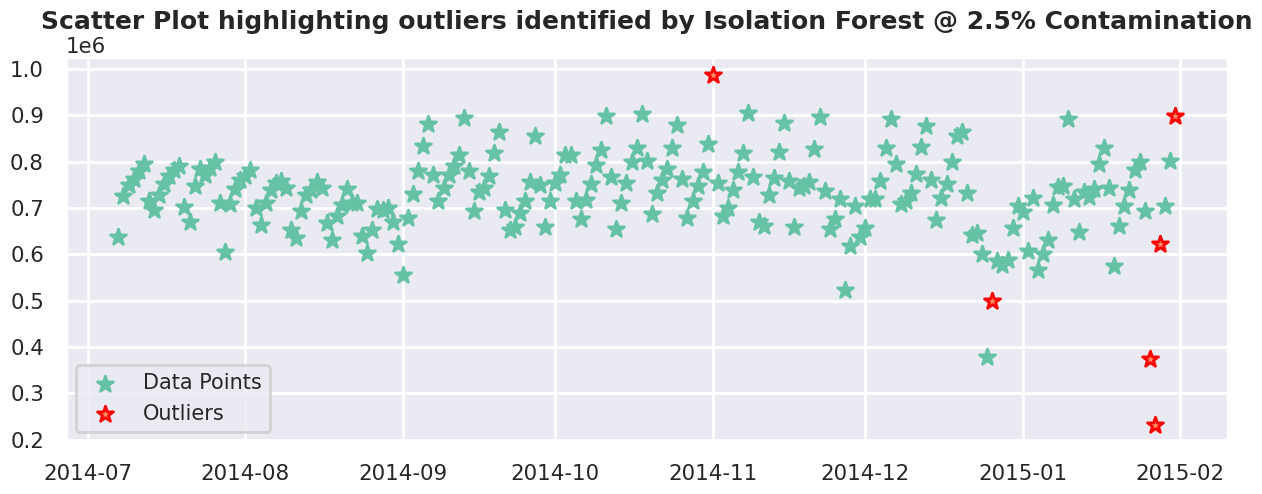

In [114]:
plt.figure(figsize=(15,5))

# scatter plot of value
plt.scatter(df_day_normal.index,
            df_day_normal[['value']],
            label='Data Points',
            marker='*');

# scatter plot of outliers
plt.scatter(df_day_outlier.index,
            df_day_outlier[['value']],
            marker='*',
            edgecolors='red',
            label='Outliers');

plt.legend(loc='lower left',
           fontsize = 15);

plt.title('Scatter Plot highlighting outliers identified by Isolation Forest @ 2.5% Contamination',
          fontweight='bold',
          fontsize=18);

